In [165]:
# data clean

# 数据导入

In [22]:
%%time
%reload_ext autoreload
%autoreload 2
DATASET_PATH="../dataset/"
LOG_PATH="../logs/"
MODEL_PATH="../models/"
RESULT_PATH="../result/"
 
import sys
sys.path.append("../chemprop")
sys.path.append("../qsprpred")
sys.path.append("../")
import pandas as pd
pd.set_option('max_colwidth',1000)
pd.set_option('display.width',1000)
pd.set_option('display.max_columns',500)
import os
import time
# from tdc.single_pred import ADME
import pandas as pd
import numpy as np
import plotly_express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt 
from loguru import logger
from numpy.core.defchararray import upper

from rdkit import Chem, RDLogger
from pathlib import Path
import pickle
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import copy
import glob
import itertools
import shutil


from typing import Tuple, Callable, Optional
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import torch
import warnings
warnings.filterwarnings("ignore")
RDLogger.DisableLog('rdApp.*')
from utils.data_util import *
# from loguru import logger
from sklearn.decomposition import PCA
project_path = Path.cwd().parent
# log_path = Path(project_path, "log")
log_time = time.strftime("%Y_%m_%d")
# from qsprpred.logs.stopwatch import StopWatch

# from qsprpred.logs.utils import commit_hash, enable_file_logger
log_path=os.path.join(os.getcwd(), 'logs')
if os.path.exists(log_path)==False: 
    os.makedirs(log_path)
# logSettings = enable_file_logger(
#     log_path,
#     'pkmodel.log', debug=True, log_name="pk_model",
#     git_hash=None, init_data=None,
#     disable_existing_loggers=False)
# # def enable_file_logger(log_folder, filename, debug=False, log_name=None,
# #                        git_hash=None, init_data=None, disable_existing_loggers=True):
# logger = logSettings

# from qsprpred.models.models import QSPRsklearn
# from qsprpred.models.tasks import ModelTasks
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.preprocessing import MinMaxScaler, StandardScaler



from typing import Tuple, Callable, Optional
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader, ConcatDataset, dataloader
 
from qsprpred.models.hyperparam_optimization import OptunaOptimization

import matplotlib.pyplot as plt 
import seaborn as sns
import time
from typing import Tuple, Callable, Optional
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
#Metrics
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
# from loguru import logger
#RDKIT


#Feature selection
# from mrmr import mrmr_classif
from sklearn.feature_selection import SelectKBest
# from skrebate import ReliefF
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

#Models - Regression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
 
from sklearn.svm import SVR
from xgboost import XGBRegressor

#Models - Classification
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
# Compute regression metrics 
import copy
import glob
import itertools
# import logging
import os
import shutil
from collections.abc import Iterable
from unittest import TestCase

import numpy as np
import pandas as pd
from parameterized import parameterized
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import numpy as np
import optuna
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier, XGBRegressor
 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
 
from qsprpred.data.utils.datafilters import papyrusLowQualityFilter
from qsprpred.data.utils.datasplitters import (
    ManualSplit,
    RandomSplit,
    ScaffoldSplit,
    TemporalSplit,
)
 
from qsprpred.data.utils.descriptorcalculator import (
    CustomDescriptorsCalculator,
    DescriptorsCalculator,
    MoleculeDescriptorsCalculator,
)
from qsprpred.data.utils.descriptorcalculator import MoleculeDescriptorsCalculator
from qsprpred.data.utils.descriptorsets import (
    DataFrameDescriptorSet,
    DescriptorSet,
    DrugExPhyschem,
    FingerprintSet,
    PredictorDesc,
    RDKitDescs,
    TanimotoDistances,
)
from qsprpred.data.utils.featurefilters import (
    BorutaFilter,
    HighCorrelationFilter,
    LowVarianceFilter,
)
# from qsprpred.data.utils.scaffolds import Murcko
# from qsprpred.deep.models.models import QSPRDNN
# from qsprpred.logs.utils import backup_files, commit_hash, enable_file_logger
# from qsprpred.models.models import  QSPRModel, QSPRsklearn
from qsprpred.models.tasks import TargetTasks

 
from qsprpred.data.data import QSPRDataset, TargetProperty
N_CPU = 16
CHUNK_SIZE = 100
TIME_SPLIT_YEAR = 2000
GPUS = [idx for idx in range(torch.cuda.device_count())]
 
import matplotlib
import datetime
now_time = datetime.datetime.now()
data_str = now_time.strftime('%Y_%m_%d_%H')

def addlabels(x,y):
    import matplotlib.pyplot as plt 
    for i in range(len(x)):
        plt.text(i,y[i],'%.2f' %(y[i]), fontweight = 'bold')
def autolabel(rects,y):
    import matplotlib.pyplot as plt 
    for i,rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.08, 1.02*height, '%.2f' %(y[i]), size=12)


def plot_comparison(names, met, c,title='Metrics obtained for each model'):
    # logger.info(met)
    import matplotlib.pyplot as plt 
    sns.set(font_scale = 1)
    # set width of bar
    barWidth = 0.15
    plt=matplotlib.pyplot
    plt.figure(figsize=(15, 6), dpi = 95)

    # set height of bar
    var1 = [i[0] for i in met]
    var2 = [i[1] for i in met]
    var3 = [i[2] for i in met]
    if c == True:
        var4 = [i[3] for i in met]
        var5 = [i[4] for i in met]

    # Set position of bar on X axis
    br1 = np.arange(len(var1))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]
    br5 = [x + barWidth for x in br4]

    # Make the plot
    if c == False:
        cm=plt.bar(br1, var1, color ='r', width = barWidth,
                edgecolor ='grey', label ='R2')
        autolabel(cm,var1)
        cm=plt.bar(br2, var2, color ='g', width = barWidth,
                edgecolor ='grey', label ='MAE')
        autolabel(cm,var2)
        cm=plt.bar(br3, var3, color ='b', width = barWidth,
                edgecolor ='grey', label ='RMSE')
        bar_list=[br1,br2,br3]
        autolabel(cm,var3)
        # for k,var in enumerate([var1,var2,var3]):
        #     for i, v in enumerate(var):
                # autolabel(cm)
                # plt.text(v + 3, i + .25, '%.2f' %v, 
                #         color = 'blue', fontweight = 'bold')

    # Add 2 more bars 
    else :
        plt.bar(br1, var1, color ='r', width = barWidth,
                edgecolor ='grey', label ='MCC')
        plt.bar(br2, var2, color ='g', width = barWidth,
                edgecolor ='grey', label ='AUC')
        plt.bar(br3, var3, color ='b', width = barWidth,
                edgecolor ='grey', label ='ACC')
        plt.bar(br4, var4, color ='yellow', width = barWidth,
            edgecolor ='grey', label ='PRE')
        plt.bar(br5, var5, color ='purple', width = barWidth,
            edgecolor ='grey', label ='REC')
    
    # Adding Xticks
    plt.xlabel('Models', fontweight ='bold', fontsize = 15)
    plt.ylabel('Metrics', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(var1))],
            [name for name in names])
    plt.legend()
    plt.title(title)
    
    plt.show()
def get_metrics(model_name, y_true, y_pred, c, train_times, mode = 0):
    # Compute metrics 
    if c == False:
        var1 = metrics.r2_score(y_true, y_pred)
        var2 = metrics.mean_absolute_error(y_true, y_pred)
        var3 = metrics.mean_squared_error(y_true, y_pred)
        var4 = var3**0.5
        
        print(model_name,'| R2: %0.3f, RMSE: %0.3f,  MAE: %0.3f, MSE: %0.3f | Training time: %0.1f' %(var1, var4,var2, var3, train_times[-1]))
        
        # Mode to 1 displays r-squared plots
        if mode == 1: 
            plt.figure(figsize=(10, 5), dpi = 95)

            plt.scatter(y_true, y_pred, color='salmon', s=5)
            plt.plot(np.unique(y_true), np.poly1d(np.polyfit(y_true, y_pred, 1))(np.unique(y_true)), color='black')

            plt.text(0, 3.5,'R-squared = %0.2f' % var1)
            plt.xlabel('Actual values')
            plt.ylabel('Predicted Values')
            plt.title('Prediction results using {}'.format(model_name))
            plt.show()
        
        return var1, var2, var3,var4
        
    else:
        var1 = metrics.matthews_corrcoef(y_true, y_pred)
        var2 = metrics.roc_auc_score(y_true, y_pred)
        var3 = metrics.precision_score(y_true, y_pred)
        var4 = metrics.recall_score(y_true, y_pred)
        var5 = metrics.accuracy_score(y_true, y_pred)
        
        print(model_name,'| MCC: %0.3f, AUC: %0.3f, Accuracy: %0.3f, Precision: %0.3f, Recall: %0.3f | Training time: %0.1f' 
              %(var1, var2, var3, var4, var5, train_times[-1]))
        
    return var1, var2, var3, var4, var5
def models_comparison(X_train, y_train, X_val, y_val, c, plot = True, fps = False 
                          , X_train_norm = 0, X_val_norm = 0):
    np.random.seed(10)
    n_models = ['LR', 'RFR', 'DTR', 'SVR', 'MLPR', 'XGBR', 'MLPC', 'SVC', 'RFC', 'DTC', 'XGBC']
    models = {'Regression': 
              {'Linear': {'LR': LinearRegression(), 'SVR': SVR(), 
                          'MLPR': MLPRegressor(hidden_layer_sizes=(128,64,32), max_iter=500)},
               'Non-linear':{'RFR': RandomForestRegressor(), 'DTR': DecisionTreeRegressor(), 'SVR':SVR(), 'XGBR': XGBRegressor()}},
                  
              'Classification': 
              {'Linear': {'SVC': SVC(), 
                          'MLPC': MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=500)},
               'Non-linear':{'RFC': RandomForestClassifier(), 'DTC': DecisionTreeClassifier(), 'XGBC': XGBClassifier(eval_metric = 'auc')}}
             }
             

    names, results, train_times = [], [], []

    for name in n_models:
        #REGRESSION
        if name in models['Regression']['Linear'].keys() and c == False:
            # Train the model and measure the time required
            start_time = time.time()
            clf = models['Regression']['Linear'][name].fit(X_train_norm, y_train)
            train_time = time.time() - start_time
            # Predict validation set values
            y_pred = clf.predict(X_val_norm)
            # Store the name of the model, metrics, and time for later visualization
            names.append(name)
            train_times.append(train_time)
            r2,mae, mse,rmse = get_metrics(name, y_val, y_pred, c, train_times)
            results.append([r2, mae, rmse])
            
        elif name in models['Regression']['Non-linear'].keys() and c == False:
            
            start_time = time.time()
            clf = models['Regression']['Non-linear'][name].fit(X_train, y_train)
            train_time = time.time() - start_time
            
            y_pred = clf.predict(X_val)
            
            names.append(name)
            train_times.append(train_time)
            r2,mae, mse,rmse = get_metrics(name, y_val, y_pred, c, train_times)
            results.append([r2, mae,rmse])
            
            
        #CLASSIFICATION
        elif name in models['Classification']['Linear'].keys() and c == True:
            start_time = time.time()
            clf = models['Classification']['Linear'][name].fit(X_train_norm, y_train)
            train_time = time.time() - start_time
            
            y_pred = clf.predict(X_val_norm)
            
            names.append(name)
            train_times.append(train_time)
            mcc, auc, acc, pre, rec = get_metrics(name, y_val, y_pred, c, train_times)
            results.append([mcc, auc, acc, pre, rec])
            
        elif name in models['Classification']['Non-linear'].keys() and c == True :
            start_time = time.time()
            clf = models['Classification']['Non-linear'][name].fit(X_train, y_train)    
            train_time = time.time() - start_time
            
            y_pred = clf.predict(X_val)

            names.append(name)
            train_times.append(train_time)
            mcc, auc, acc, pre, rec = get_metrics(name, y_val, y_pred, c, train_times)
            results.append([mcc, auc, acc, pre, rec])
            
            
        else:
            pass
        
    # We plot the metrics obtained for each model
    if plot == True:
        plot_comparison(names, results, c)
    return names, results

def normalize_data(X_train, X_val, X_test,original_cols=['MW', 'HBA', 'HBD', 'TPSA_NO', 'RotBondCount', 'moka_ionState7.4', 'MoKa.LogP', 'MoKa.LogD7.4']):
    # convert in into DF after standardizing 
    result = [x for x in X_train.columns if x not in original_cols]
    print(" X_train.shape" )
    print( X_train.shape )
    x_preprocessor = ColumnTransformer([
    ("stdscl", StandardScaler(), result),
    ("minmax", MinMaxScaler(), []), 
    ("onehot", OneHotEncoder(
        # categories=[['anionic', 'cationic', 'neutral', 'zwitterionic']], 
        handle_unknown='ignore'
    ), [])
], n_jobs=-1)
    X_train_norm = x_preprocessor.fit_transform(X_train)
    stdscl_cols = [c for c in result]
    minmax_cols = [c for c in []]
    # print(minmax_cols)
    # print(dir(x_preprocessor.named_transformers_['onehot']))
    onehot_cols=[]
    # onehot_cols = list(x_preprocessor.named_transformers_['onehot'].get_feature_names_out(['moka_ionState7.4']))
    # print(onehot_cols)
    # 合并列名
  
    feature_names = stdscl_cols + minmax_cols + onehot_cols
    X_train_norm = pd.DataFrame(X_train_norm, columns = feature_names)
    
    X_val_norm = x_preprocessor.transform(X_val)

    # print(x_preprocessor._columns)
    X_val_norm = pd.DataFrame(X_val_norm, columns =feature_names)
    X_test_norm = x_preprocessor.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, columns = feature_names)
    print('Data is now normalized.')
    return X_train_norm, X_val_norm, X_test_norm


def INPUT_DATA(dataset_name,data_name,smiles_column,target_column,log_y=True,x_cols=[],dataset_dir='/data/project/pbpk/data/'):
    """
    Parkinson's disease dataset that contains data for multiple targets related to the disease.
    It is loaded from a CSV file into pandas `DataFrame`, which is then converted to `QSPRDataset`
    regression data set with 'GABAAalpha' activity as the target property.

    Returns:
        a `QSPRDataset` instance with the loaded data
    """
    SEED = 88
    now_time = datetime.datetime.now()
    data_str = now_time.strftime('%Y_%m_%d_%H')
    raw_file_path = dataset_dir+dataset_name
    if dataset_name.endswith(".csv"):
        raw_df = pd.read_csv(raw_file_path, header=0)
    elif dataset_name.endswith(".xlsx"):
        raw_df = pd.read_excel(raw_file_path, header=8)
    pruned_df = get_clean_df(raw_df,x_cols,drop_invalid_smiles=True,drop_missing_x=True)
    df =pruned_df
    logger.info(df.shape)
    logger.info(df.columns)
    df=df[[smiles_column] + x_cols+[target_column]]
    if log_y==True:
        df["Y"]=get_log_y(target_column,df)
    else:
        df["Y"]=df[target_column]
    target_props=[{
            "name": "Y",
            "task": TargetTasks.REGRESSION
        }]
    store_dir=DATASET_PATH+"train_data/data_%s_%s"%(data_name,data_str)
    

    logger.info("store_dir:%s"%store_dir)
    mkdir(store_dir)
    return QSPRDataset(
        name=data_name,
        df=df.iloc[:,:],
        smiles_col=smiles_column,
        target_props=target_props,
        store_dir=store_dir,
        n_jobs=N_CPU,
        overwrite=True,
        chunk_size=CHUNK_SIZE
    )

CPU times: user 24.4 ms, sys: 25.3 ms, total: 49.7 ms
Wall time: 50.3 ms


# cl data process

In [20]:
dataset_dir= DATASET_PATH
dataset_name='pk_cl_1215_train_2023_v1.csv'
dataset_file=dataset_dir+dataset_name
logger.info(dataset_dir+dataset_name)
smiles_column='SMILES'
target_column= 'human CL (mL/min/kg)_log10'
data_name='pk_cl_1215_train_2023'
dataset=INPUT_DATA(dataset_name,data_name,smiles_column,target_column,log_y=False,x_cols=[],dataset_dir=dataset_dir)


2024-01-07 00:07:19.543 | INFO     | __main__:<module>:4 - ../dataset/pk_cl_1215_train_2023_v1.csv
2024-01-07 00:07:19.551 | INFO     | utils.data_util:get_clean_df:80 - original record nums:1215
2024-01-07 00:07:19.553 | INFO     | utils.data_util:get_clean_df:82 - after drop_duplicated record nums:1215
2024-01-07 00:07:19.968 | INFO     | utils.data_util:get_clean_df:85 - after drop_invalid_smiles record nums:1215
2024-01-07 00:07:19.970 | INFO     | utils.data_util:get_clean_df:89 - after drop_missing_x record nums:1215
2024-01-07 00:07:19.971 | INFO     | __main__:INPUT_DATA:444 - (1215, 18)
2024-01-07 00:07:19.971 | INFO     | __main__:INPUT_DATA:445 - Index(['Unnamed: 0', 'SMILES', 'Name', 'MW', 'HBA', 'HBD', 'TPSA_NO', 'RotBondCount', 'moka_ionState7.4', 'MoKa.LogP', 'MoKa.LogD7.4', 'Y', 'human CL (mL/min/kg)_test', 'SMILES_test', 'human CL (mL/min/kg)', 'human CL (mL/min/kg)_log2', 'human CL (mL/min/kg)_log10', 'SMILES_STANDARD'], dtype='object')
2024-01-07 00:07:19.974 | INFO 

# fup data process

In [23]:
# logging.basicConfig(level=logging.DEBUG)
dataset_dir= DATASET_PATH
dataset_name='fup_data_human_2668.csv'
dataset_file=dataset_dir+dataset_name
logger.info(dataset_dir+dataset_name)
smiles_column='SMILES'
target_column= 'fup_log10'
data_name='fup_log10'
dataset=INPUT_DATA(dataset_name,data_name,smiles_column,target_column,log_y=False,x_cols=[],dataset_dir=dataset_dir)

2024-01-07 00:09:23.620 | INFO     | __main__:<module>:5 - ../dataset/fup_data_human_2668.csv
2024-01-07 00:09:23.647 | INFO     | utils.data_util:get_clean_df:80 - original record nums:2668
2024-01-07 00:09:23.649 | INFO     | utils.data_util:get_clean_df:82 - after drop_duplicated record nums:2292
2024-01-07 00:09:24.618 | INFO     | utils.data_util:get_clean_df:85 - after drop_invalid_smiles record nums:2292
2024-01-07 00:09:24.620 | INFO     | utils.data_util:get_clean_df:89 - after drop_missing_x record nums:2292
2024-01-07 00:09:24.621 | INFO     | __main__:INPUT_DATA:444 - (2292, 41)
2024-01-07 00:09:24.622 | INFO     | __main__:INPUT_DATA:445 - Index(['chembl_id', 'Name', 'Type', 'Max Phase', 'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP', 'Polar Surface Area', 'HBA', 'HBD', '#RO5 Violations', '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa', 'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings', 'Structure Type', 'Inorganic Flag', 'Heavy Atoms', 'HBA

# caco2 data process

In [29]:
# logging.basicConfig(level=logging.DEBUG)
# logging.basicConfig(level=logging.DEBUG)
dataset_dir= DATASET_PATH
dataset_name='caco2_train_set_6083.csv'
dataset_file=dataset_dir+dataset_name
logger.info(dataset_dir+dataset_name)
smiles_column='SMILES'
target_column= 'caco2_log10'
data_name='caco2_log10'
dataset=INPUT_DATA(dataset_name,data_name,smiles_column,target_column,log_y=False,x_cols=[],dataset_dir='/data/project/pbpk/data/')


2023-07-11 22:23:46 | 1746677576.py | MainProcess | MainThread | 1746677576.<cell line: 6>:6 - INFO -/data/project/pbpk/data/caco2_train_set_6083.csv
2023-07-11 22:23:46 | data_util.py | MainProcess | MainThread | data_util.get_clean_df:80 - INFO -original record nums:6083
2023-07-11 22:23:46 | data_util.py | MainProcess | MainThread | data_util.get_clean_df:82 - INFO -after drop_duplicated record nums:6083
2023-07-11 22:23:49 | data_util.py | MainProcess | MainThread | data_util.get_clean_df:85 - INFO -after drop_invalid_smiles record nums:6083
2023-07-11 22:23:49 | data_util.py | MainProcess | MainThread | data_util.get_clean_df:89 - INFO -after drop_missing_x record nums:6083
2023-07-11 22:23:49 | <timed exec> | MainProcess | MainThread | <timed exec>.INPUT_DATA:527 - INFO -(6083, 10)
2023-07-11 22:23:49 | <timed exec> | MainProcess | MainThread | <timed exec>.INPUT_DATA:528 - INFO -Index(['SMILES', 'SMILES_STANDARD', 'NAME', 'TYPE', 'UNIT', 'VALUE', 'LABEL', 'caco2_log10', 'caco2_l

# feature generation

In [25]:
from qsprpred.data.utils.descriptorsets import FingerprintSet
from qsprpred.data.utils.descriptorcalculator import MoleculeDescriptorsCalculator
from sklearn.preprocessing import StandardScaler as Scaler
from qsprpred.data.utils.scaffolds import Murcko
from qsprpred.data.utils.datasplitters import RandomSplit
from qsprpred.extra.data.utils.descriptorsets import (
                    # ExtendedValenceSignature,
                    # Mold2,
                    Mordred,
                    PaDEL,
                )
# dataset = PKDATA()
# dataset=pk_cl_input_data
# dataset.getDF()
# Calculate MorganFP and physicochemical properties
# "Morgan", "RDkit", "Mordred", "Mold2", "PaDEL", "DrugEx", "Signature"
# "MaccsFP", "AvalonFP", "TopologicalFP", "AtomPairFP", "RDKitFP",
# "PatternFP", "LayeredFP"
descriptorsets = [
            RDKitDescs(),
            DrugExPhyschem(),
            # PredictorDesc(
            #     QSPRsklearn.fromFile(
            #         f'{os.path.dirname(__file__)}/test_files/test_predictor/qspr/models/SVC_CLASSIFICATION/SVC_CLASSIFICATION_meta.json')
            # ),
            # TanimotoDistances(list_of_smiles=["C", "CC", "CCC"], fingerprint_type="MorganFP", radius=3, nBits=1000),
            # FingerprintSet(fingerprint_type="MorganFP", radius=3, nBits=2048),
            Mordred(ignore_3D=False),
            # Mold2(),
            # ExtendedValenceSignature(depth=1),
            # FingerprintSet(fingerprint_type="MaccsFP"),
            # FingerprintSet(fingerprint_type="AtomPairFP"),
            # FingerprintSet(fingerprint_type="TopologicalFP"),
            # FingerprintSet(fingerprint_type="AvalonFP"),
            # FingerprintSet(fingerprint_type="RDKitFP"),
            # FingerprintSet(fingerprint_type="PatternFP"),
            # FingerprintSet(fingerprint_type="LayeredFP"),
            # FingerprintSet(fingerprint_type="CDKFP", size=2048, search_depth=7),
            # FingerprintSet(fingerprint_type="CDKExtendedFP"),
            # FingerprintSet(fingerprint_type="CDKEStateFP"),
            # FingerprintSet(fingerprint_type="CDKGraphOnlyFP", size=2048, search_depth=7),
            # FingerprintSet(fingerprint_type="CDKMACCSFP"),
            # FingerprintSet(fingerprint_type="CDKPubchemFP"),
            # FingerprintSet(fingerprint_type="CDKKlekotaRothFP", use_counts=True),
            # FingerprintSet(fingerprint_type="CDKAtomPairs2DFP", use_counts=False),
            # FingerprintSet(fingerprint_type="CDKSubstructureFP", use_counts=True),
            PaDEL(ignore_3D=True)
        ]
 
# feature_calculator = DescriptorsCalculator(descsets = [FingerprintSet(fingerprint_type="MorganFP", radius=3, nBits=2048)])
# feature_calculator = MoleculeDescriptorsCalculator(desc_sets = [FingerprintSet(fingerprint_type="MorganFP", radius=3, nBits=2048)])

# feature_calculator = DescriptorsCalculator(descriptor_sets)
# feature_calculator = MoleculeDescriptorsCalculator(desc_sets = descriptor_sets)

# Do a random split for creating the train (85%) and test set (15%)
rand_split = RandomSplit(0.2)
# split = ScaffoldSplit(dataset=dataset, scaffold=Murcko(), test_fraction=0.2)
# calculate compound features and split dataset into train and test
 
# Split on scaffolds
# split = scaffoldsplit(dataset=dataset, scaffold=Murcko(), test_fraction=0.2)

# Remove features that have a low variance (<0.05) in the trainingset
lv = LowVarianceFilter(0.1)

# Remove features that have a high correlation (>0.9) in the trainingset
hc = HighCorrelationFilter(0.85)
bf=BorutaFilter(estimator=RandomForestRegressor(n_jobs=-1))
print(f"Original data num:%s , feature num:%s"%(dataset.df.shape[0],dataset.df.shape[1]))
stopwatch = StopWatch()
# dataset.df.fillna(0)
# dataset.df = np.nan_to_num（dataset.df.astype(np.float32))


# featurefilters = []
featurefilters=[lv, hc,bf]
# featurefilters=[lv, hc]
            
dataset.prepareDataset(
    smiles_standardizer='chembl',
    split=rand_split,
    # fold=10,
    # feature_calculators=descriptor_sets,
    feature_calculators=[MoleculeDescriptorsCalculator(descriptorsets)],
    feature_standardizer=StandardScaler(),
    feature_filters=featurefilters,
    recalculate_features=True,
    feature_fill_value=0.0
)
dataset.save()
 
stopwatch.stop('prepareDataset took: ')
# smiles_standardizer='chembl',
# datafilters=None,
# split=None,
# fold=None,
# feature_calculator=None,
# feature_filters=None,
# feature_standardizer=None,
# recalculate_features=False,
# fill_value=np.nan
stopwatch.reset() 
# save the data set if you do not want to recalculate descriptors
dataset.save()
stopwatch.stop('data save took: ')
logger.info(f"Number of samples train set: {len(dataset.y)}")
logger.info(f"Number of samples test set: {len(dataset.y_ind)}, {len(dataset.y_ind) / len(dataset.df) * 100}%")
logger.info(f"Final data num:%s , feature num:%s"%(dataset.X.shape[0],dataset.X.shape[1]))
# logger.info("---剩余feature数目:%s---"%len(dataset.featureNames))
# print(dataset.featureNames)
# logger.info(dataset.df.shape)
logger.info(dataset.X.shape)
logger.info(dataset.X_ind.shape)
logger.info("%s特征计算完毕！"%data_name)
model_names=[]
metric_results=[]
train_metric_results=[]
test_metric_results=[]
valid_metric_results=[]
df_metric=pd.DataFrame()
# CPU=8 8M28.9s   (1255, 6333) (1004, 3238)  (251, 3238)

ModuleNotFoundError: No module named 'Mold2_pywrapper'

# 数据导入

In [13]:
# store_dir="exp_data/data_name_pk_cl_1215_train_2023_2023_06_20_14"
# dataset_new = QSPRDataset.fromFile(dataset.storePath)
# exp_data/data_name_fup_log10_2023_06_22_16/fup_log10_meta.json
# data_name_pk_cl_1215_train_2023_2023_06_25_10/pk_cl_1215_train_2023_meta.json
store_dir="/data/project/pbpk/pk-model/data/train_data/data_fup_log10_2023_07_13_16/fup_log10_meta.json"
# /data/project/pbpk/pk-model/data/train_data/data_fup_log10_2023_07_04_17
dataset_new = QSPRDataset.fromFile(store_dir)
dataset = QSPRDataset.fromFile(store_dir)

2023-07-13 22:13:17 | data.py | MainProcess | MainThread | data.__init__:1452 - INFO -Dataset 'fup_log10' created for target targetProperties: '[TargetProperty(name=Y, task=REGRESSION)]'.
2023-07-13 22:13:20 | data.py | MainProcess | MainThread | data.__init__:1452 - INFO -Dataset 'fup_log10' created for target targetProperties: '[TargetProperty(name=Y, task=REGRESSION)]'.


In [4]:
def checkNan(df):
    df_data=df
    logger.info("---检测df中空值情况---")
    logger.info("数据记录数%s"%df_data.shape[0])
    null_count = df_data.isnull().sum()
    null_cols = null_count.loc[null_count > 0].index.tolist()
    logger.info(null_count.loc[null_count > 0])
    logger.info("统计每列空值数量和占比")
    null_counts = df_data.isnull().sum()
    # 计算每列空值占比
    null_ratios = null_counts / len(df_data)
    # logger.info(null_counts)
# 按占比降序排列显示
    null_ratios_sorted = null_ratios.sort_values(ascending=False)
    # logger.info(null_ratios_sorted)
    null_ratios_gt_05 = null_ratios_sorted[null_ratios_sorted > 0.5]
    logger.info("统计每列空值占比大于0.5的列名")
    logger.info(null_ratios_gt_05)
    logger.info("空值占比大于0.5的列数：%s"%len(null_ratios_gt_05))
    # logger.info('有空值的列名和数量：')
    # logger.info(null_cols[0:50])
    # logger.info(len(null_cols))
    # logger.info("空值所在行:")
    # logger.info(df_data[df_data.isnull().T.any()].index)
    logger.info("空值行数量:")
    logger.info(len(df_data[df_data.isnull().T.any()].index))
columns=None
fill_value=0
# dataset.reload()
logger.info(dataset.X.shape)
fill_columns = columns if columns else dataset.getDescriptorNames()
# logger.info(columns)
logger.info(len(fill_columns))
logger.info(dataset.df.shape)
checkNan(dataset.df)
checkNan(dataset.X)
checkNan(dataset.X_ind)
# df_dataset=dataset.df[fill_columns] X_train=dataset.X
# X_val=dataset.X_ind

# dataset.df.loc[:,fill_columns]=dataset.df[fill_columns].fillna(0,inplace=False)
dataset.X.fillna(0,inplace=True)
dataset.X_ind.fillna(0,inplace=True)
logger.info("===========删除空值============")
# checkNan(dataset.df)
checkNan(dataset.X)
checkNan(dataset.X_ind)
logger.info('Missing values filled with %s' % fill_value)
# logger.info(dataset.df.shape)

2023-07-14 15:08:23 | 79439104.py | MainProcess | MainThread | 79439104.<cell line: 30>:30 - INFO -(1833, 12)
2023-07-14 15:08:23 | 79439104.py | MainProcess | MainThread | 79439104.<cell line: 33>:33 - INFO -3497
2023-07-14 15:08:23 | 79439104.py | MainProcess | MainThread | 79439104.<cell line: 34>:34 - INFO -(2292, 5)
2023-07-14 15:08:23 | 79439104.py | MainProcess | MainThread | 79439104.checkNan:3 - INFO ----检测df中空值情况---
2023-07-14 15:08:23 | 79439104.py | MainProcess | MainThread | 79439104.checkNan:4 - INFO -数据记录数2292
2023-07-14 15:08:23 | 79439104.py | MainProcess | MainThread | 79439104.checkNan:7 - INFO -Series([], dtype: int64)
2023-07-14 15:08:23 | 79439104.py | MainProcess | MainThread | 79439104.checkNan:8 - INFO -统计每列空值数量和占比
2023-07-14 15:08:23 | 79439104.py | MainProcess | MainThread | 79439104.checkNan:17 - INFO -统计每列空值占比大于0.5的列名
2023-07-14 15:08:23 | 79439104.py | MainProcess | MainThread | 79439104.checkNan:18 - INFO -Series([], dtype: float64)
2023-07-14 15:08:23 | 

2023-06-14 15:44:27.679 | INFO     | __main__:<cell line: 10>:12 - ----0:X_train dataset size----
2023-06-14 15:44:27.681 | INFO     | __main__:<cell line: 10>:13 - (1004, 222)
2023-06-14 15:44:27.684 | INFO     | __main__:<cell line: 10>:27 - Series([], dtype: int64)
2023-06-14 15:44:27.685 | INFO     | __main__:<cell line: 10>:28 - 统计每列空值数量和占比
2023-06-14 15:44:27.687 | INFO     | __main__:<cell line: 10>:40 - 统计每列空值占比大于0.5的列名
2023-06-14 15:44:27.688 | INFO     | __main__:<cell line: 10>:41 - Series([], dtype: float64)
2023-06-14 15:44:27.689 | INFO     | __main__:<cell line: 10>:42 - 空值占比大于0.5的列数：0


(1255, 6307)
Index(['SMILES', 'human CL (mL/min/kg)', 'Y',
       'Descriptor_RDkit_MaxEStateIndex', 'Descriptor_RDkit_MinEStateIndex',
       'Descriptor_RDkit_MaxAbsEStateIndex',
       'Descriptor_RDkit_MinAbsEStateIndex', 'Descriptor_RDkit_qed',
       'Descriptor_RDkit_MolWt', 'Descriptor_RDkit_HeavyAtomMolWt',
       ...
       'Descriptor_PaDEL_WTPT-1', 'Descriptor_PaDEL_WTPT-2',
       'Descriptor_PaDEL_WTPT-3', 'Descriptor_PaDEL_WTPT-4',
       'Descriptor_PaDEL_WTPT-5', 'Descriptor_PaDEL_WPATH',
       'Descriptor_PaDEL_WPOL', 'Descriptor_PaDEL_XLogP',
       'Descriptor_PaDEL_Zagreb', 'Split_IsTrain'],
      dtype='object', length=6307)
(1004, 222)
Index(['Descriptor_RDkit_qed', 'Descriptor_RDkit_BCUT2D_CHGHI',
       'Descriptor_RDkit_BCUT2D_CHGLO', 'Descriptor_RDkit_BCUT2D_LOGPLOW',
       'Descriptor_RDkit_BCUT2D_MRHI', 'Descriptor_RDkit_BCUT2D_MRLOW',
       'Descriptor_RDkit_FractionCSP3',
       'Descriptor_FingerprintSet_MorganFP_1064', 'Descriptor_Mordred_VE1_A',
   

2023-06-14 15:44:28.118 | INFO     | __main__:<cell line: 10>:44 - 有空值的列名和数量：
2023-06-14 15:44:28.118 | INFO     | __main__:<cell line: 10>:46 - 0
2023-06-14 15:44:28.119 | INFO     | __main__:<cell line: 10>:47 - 空值所在行:
2023-06-14 15:44:28.121 | INFO     | __main__:<cell line: 10>:48 - Int64Index([], dtype='int64')
2023-06-14 15:44:28.121 | INFO     | __main__:<cell line: 10>:49 - 空值行数量:
2023-06-14 15:44:28.123 | INFO     | __main__:<cell line: 10>:50 - 0
2023-06-14 15:44:28.124 | INFO     | __main__:<cell line: 10>:12 - ----1:X_val dataset size----
2023-06-14 15:44:28.125 | INFO     | __main__:<cell line: 10>:13 - (251, 222)
2023-06-14 15:44:28.128 | INFO     | __main__:<cell line: 10>:27 - Series([], dtype: int64)
2023-06-14 15:44:28.129 | INFO     | __main__:<cell line: 10>:28 - 统计每列空值数量和占比
2023-06-14 15:44:28.131 | INFO     | __main__:<cell line: 10>:40 - 统计每列空值占比大于0.5的列名
2023-06-14 15:44:28.132 | INFO     | __main__:<cell line: 10>:41 - Series([], dtype: float64)
2023-06-14 15:44

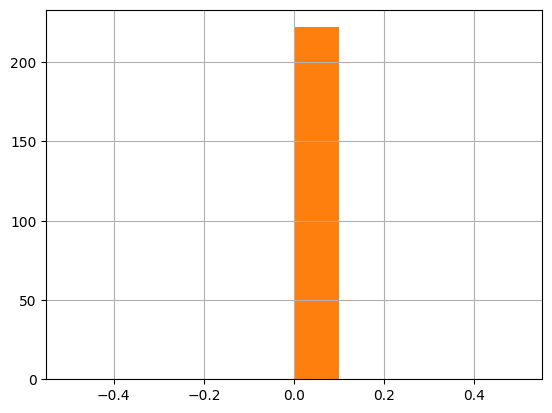

In [13]:
print(dataset.df.shape)
print(dataset.df.columns)
print(dataset.X.shape)
print(dataset.X.columns)
df_data=dataset.df
X_train=dataset.X
X_val=dataset.X_ind
X_test=dataset.df
check_df_list=[X_train, X_val,X_test]
for i,df_data in enumerate(check_df_list[0:-1]):
    var_name = [var for var in globals() if globals()[var] is df_data][-1]
    logger.info("----%s:%s dataset size----"%(i,var_name))
    logger.info(df_data.shape)
    # print(df_data.columns)
 
    null_count = df_data.isnull().sum()

    # 筛选出空值数量大于 0 的列名
    # df[pd.isnull(df[col])]
    # df[df[col].isnull()] 
    # 获取Remark字段为None的行
    # df_isnull_remark = df[df['Remark'].isnull()]
    # # 获取Quantity字段为None的行
    # df_isnull_quantity = df[df['Quantity'].isnull()]
 
    null_cols = null_count.loc[null_count > 0].index.tolist()
    logger.info(null_count.loc[null_count > 0])
    logger.info("统计每列空值数量和占比")
    null_counts = df_data.isnull().sum()

    # 计算每列空值占比
    null_ratios = null_counts / len(df_data)

    # print(null_counts)
   # 按占比降序排列显示
    null_ratios_sorted = null_ratios.sort_values(ascending=False)

    # print(null_ratios_sorted)
    null_ratios_gt_05 = null_ratios_sorted[null_ratios_sorted > 0.5]
    logger.info("统计每列空值占比大于0.5的列名")
    logger.info(null_ratios_gt_05)
    logger.info("空值占比大于0.5的列数：%s"%len(null_ratios_gt_05))
    null_ratios_sorted.hist()
    logger.info('有空值的列名和数量：')
    # print(null_cols)
    logger.info(len(null_cols))
    logger.info("空值所在行:")
    logger.info(df_data[df_data.isnull().T.any()].index)
    logger.info("空值行数量:")
    logger.info(len(df_data[df_data.isnull().T.any()].index))

In [ ]:
dir(dataset)

In [ ]:
# import pandas as pd
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# print(dataset.y)
# print(dataset.y_ind)

In [ ]:
import numpy as np
df_data=dataset.df
X_train=dataset.X
X_val=dataset.X_ind
X_test=dataset.df
# check_df_list=[X_train, X_val,X_test]
# input_df=[X_train, X_val,X_test]
input_df=[X_train, X_val]
def is_df_type(variable):
    if isinstance(variable, pd.DataFrame):
        print("Shape of DataFrame:", variable.shape)
        return True
    elif isinstance(variable, np.ndarray):
        print("Shape of numpy array:", variable.shape)
    else:
        print("Unknown type")
    return False
for i,data in enumerate(input_df) :
  
  if is_df_type(data)==True:
    var_name = [var for var in globals() if globals()[var] is data][0]
    print("----%s:%s----"%(i,var_name))
    # data = data.astype('float32')
    float64_cols = list(data.select_dtypes(include='float64'))

# The same code again calling the columns
    data[float64_cols] = data[float64_cols].astype('float32')
    data.replace([np.inf, -np.inf], -1, inplace=True)
    print(data.shape)
    # print(data.describe())
    if np.any(np.isinf(data)):
       print("Data contains infinity values")
       inf_positions = np.where(np.isinf(data))
       print("Infinity values found at positions:", inf_positions)
       inf_locations = np.where(np.isinf(data))
       print('无穷大的位置：')
       print('行：', inf_locations[0])
       print('列：', inf_locations[1])
       print('列名：', data.columns[inf_locations[1]])
    if np.any(data > np.finfo(np.float32).max):
       print("Data contains values too large for float32")
 
       inf_locations = np.where(data > np.finfo(np.float32).max)
       print("Values too large for float32 found at positions:", inf_locations)  
       print('values too large for float32的位置：')
       print('行：', inf_locations[0])
       print('列：', inf_locations[1])
       print('列名：', data.columns[inf_locations[1]])
    if np.any(np.isnan(data)):
       print("Data contains nan value")
       nan_positions = np.where(np.isnan(data))
       print("NaN values found at positions:", nan_positions)
    # 找出值为nan的位置
       nan_locations = np.where(pd.isnull(data))
       print('nan的位置：')
       print('行：', nan_locations[0])
       print('列：', nan_locations[1])
       print('列名：', data.columns[nan_locations[1]])
# df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

# 模型训练

## PLSRegression

2023-07-13 22:14:17 | interfaces.py | MainProcess | MainThread | interfaces.readParams:80 - INFO -loading model parameters from file: ./models/PLS_REG/PLS_REG_params.json
[I 2023-07-13 22:14:17,047] A new study created in memory with name: no-name-d233216d-f893-48fc-8896-9be138028b43
2023-07-13 22:14:17 | models.py | MainProcess | MainThread | models.__init__:78 - INFO -parameters: None
2023-07-13 22:14:17 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.__init__:71 - WARNING -At the moment n_jobs>1 not available for bayes optimization, n_jobs set to 1.
2023-07-13 22:14:17 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.optimize:90 - INFO -Bayesian optimization can take a while for some hyperparameter combinations
2023-07-13 22:14:17 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.optimize:96 - INFO -Bayesian optimization started: 2023-07-13 22:14:17
2023-07-13 22:14:17 | models.py | Ma

  ModelName        R2      RMSE       MAE  Set
0   PLS_REG  0.408353  0.549897  0.444172   cv
1   PLS_REG  0.416320  0.538059  0.435728  ind
['PLS_REG']
[[0.4163199161641651, 0.5380587024194454, 0.43572789516320265]]
[[0.40835306247049663, 0.5498965284511725, 0.44417225528061527]]
  ModelName        R2      RMSE       MAE  Set
0   PLS_REG  0.408353  0.549897  0.444172   cv
1   PLS_REG  0.416320  0.538059  0.435728  ind


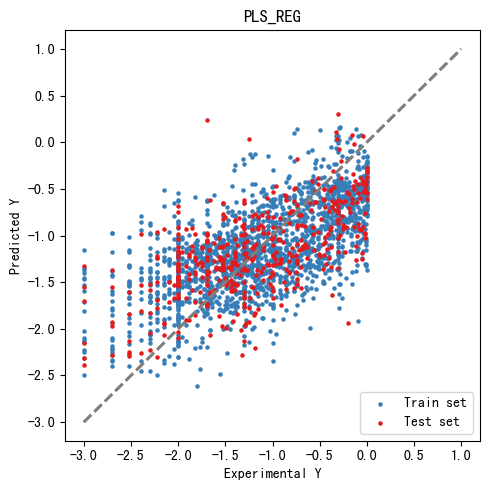

In [16]:
from qsprpred.models.models import QSPRsklearn
from sklearn.cross_decomposition import PLSRegression
 
import numbers
import os
import shutil
from os.path import exists
 
import numpy as np
import pandas as pd
import torch
from parameterized import parameterized
from qsprpred.models.interfaces import QSPRModel
from qsprpred.models.models import QSPRsklearn
from sklearn.cross_decomposition import PLSRegression
from qsprpred.models.hyperparam_optimization import OptunaOptimization

from qsprpred.models.tasks import ModelTasks
from sklearn.cross_decomposition import PLSRegression

from torch.utils.data import DataLoader, TensorDataset
from xgboost import XGBClassifier, XGBRegressor
# from lightgbm import LGBMRegressor
# This is an SKlearn model, so we will initialize it with the QSPRsklearn class
model = QSPRsklearn(base_dir = '.', data=dataset, alg = PLSRegression, name='PLS_REG')

# return ['explained_variance', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error',
#             'neg_root_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error',
#             'r2', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'neg_mean_absolute_percentage_error',
#             'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_scor']

# We will first optimize the hyperparameters (n_components and scale) through bayes optimization
# the best hyperparameter combination will be saved in PLS_REG_GABAAalpha_params.json
search_space_bs = {"n_components": ["int", 1, 15], "scale": ["categorical", [True, False]]}
bayesoptimizer = OptunaOptimization(scoring = model.scoreFunc, param_grid=search_space_bs,
                                    n_trials=20, n_jobs=4)

best_params = bayesoptimizer.optimize(model)

#Then we will evaluate the performance of the best model using the independent test set
_ = model.evaluate()
# Finally, we need to fit the model on the complete dataset if we want to use it further
# model is saved under qsprmodels/PLS_REG_GABAAalpha.pkg
model.fit()
from qsprpred.plotting.regression import CorrelationPlot

plt = CorrelationPlot([model])
axes, summary = plt.make(save=False)
axes[0]
print(summary)
if(df_metric.shape[0]==0):
    df_metric=summary
else:
    df_metric=df_metric.append(summary)
model_names.append(summary.iloc[0,0])
print(model_names)
test_metric_results.append(summary.iloc[1,1:4].to_list())
valid_metric_results.append(summary.iloc[0,1:4].to_list())
print(test_metric_results)
print(valid_metric_results)
print(df_metric.head(10))

In [ ]:
#  

In [ ]:
# def Train(data, modelcount, censhu, yanzhgdata):
#     model = lgbm.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
#                                 learning_rate=0.17, n_estimators=modelcount, max_depth=censhu,
#                                 metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

#     model.fit(data[:, :-1], data[:, -1])
#     # 给出训练数据的预测值
#     train_out = model.predict(data[:, :-1])
#     # 计算MSE
#     train_mse = mse(data[:, -1], train_out)

#     # 给出验证数据的预测值
#     add_yan = model.predict(yanzhgdata[:, :-1])
#     # 计算MSE
#     add_mse = mse(yanzhgdata[:, -1], add_yan)
#     print(train_mse, add_mse)
#     return train_mse, add_mse
# def get_feature_importances(data, shuffle, cats=[], seed=None):
#     # Gather real features
#     train_features = [f for f in data if f not in [target] + cols2ignore]

#     # Shuffle target if required
#     y = data[target].copy()
#     if shuffle:
#         y = data[target].copy().sample(frac=1.0, random_state=seed + 4)
#     from h2oaicore.lightgbm_dynamic import got_cpu_lgb, got_gpu_lgb
#     import lightgbm as lgbm
#     if is_regression:
#         model = lgbm.LGBMRegressor(random_state=seed, importance_type=importance, **lgbm_params)
#     else:
#         model = lgbm.LGBMClassifier(random_state=seed, importance_type=importance, **lgbm_params)
#         y = LabelEncoder().fit_transform(y)
#     # Fit LightGBM in RF mode, yes it's quicker than sklearn RandomForest
#     model.fit(data[train_features], y, categorical_feature=cats)
#     # Get feature importances
#     imp_df = pd.DataFrame()
#     imp_df["feature"] = list(train_features)
#     imp_df["importance"] = model.feature_importances_

#     return imp_df 
#   def test_regressor(output, client, listen_port):  # noqa
#     X, y, w, dX, dy, dw = _create_data('regression', output=output)

#     a = dlgbm.LGBMRegressor(time_out=5, local_listen_port=listen_port, seed=42)
#     a = a.fit(dX, dy, client=client, sample_weight=dw)
#     p1 = a.predict(dX, client=client)
#     if output != 'dataframe':
#         s1 = r2_score(dy, p1)
#     p1 = p1.compute()

#     b = lightgbm.LGBMRegressor(seed=42)
#     b.fit(X, y, sample_weight=w)
#     s2 = b.score(X, y)
#     p2 = b.predict(X)

#     # Scores should be the same
#     if output != 'dataframe':
#         assert_eq(s1, s2, atol=.01)

#     # Predictions should be roughly the same
#     assert_eq(y, p1, rtol=1., atol=50.)
#     assert_eq(y, p2, rtol=1., atol=50.) 

## SVR

2023-07-14 15:08:44 | interfaces.py | MainProcess | MainThread | interfaces.readParams:80 - INFO -loading model parameters from file: ./models/SVM/SVM_params.json
[I 2023-07-14 15:08:44,401] A new study created in memory with name: no-name-1bc12df5-47cc-49af-ac2e-9a3685e8aa54
2023-07-14 15:08:44 | models.py | MainProcess | MainThread | models.__init__:66 - WARNING -parameter max_iter set to 10000 to avoid training getting stuck.                             Manually set this parameter if this is not desired.
2023-07-14 15:08:44 | models.py | MainProcess | MainThread | models.__init__:78 - INFO -parameters: {'max_iter': 10000}
2023-07-14 15:08:44 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.__init__:71 - WARNING -At the moment n_jobs>1 not available for bayes optimization, n_jobs set to 1.
2023-07-14 15:08:44 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.optimize:90 - INFO -Bayesian optimization can take a while for

  ModelName        R2      RMSE       MAE  Set
0       SVM  0.328839  0.582611  0.457597   cv
1       SVM  0.288595  0.604755  0.470251  ind
['SVM']
[[0.2885951050908141, 0.6047547493075813, 0.4702508568725863]]
[[0.32883853354175185, 0.5826105167180472, 0.45759731771968915]]
  ModelName        R2      RMSE       MAE  Set
0       SVM  0.328839  0.582611  0.457597   cv
1       SVM  0.288595  0.604755  0.470251  ind


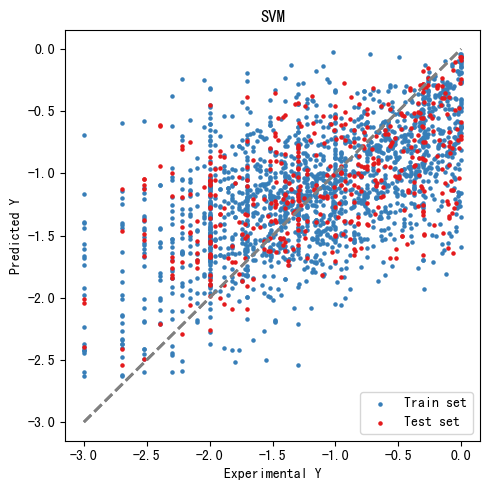

In [5]:
model_names=[]
metric_results=[]
train_metric_results=[]
test_metric_results=[]
valid_metric_results=[]
df_metric=pd.DataFrame()
from qsprpred.models.models import QSPRsklearn
from sklearn.cross_decomposition import PLSRegression
from qsprpred.models.hyperparam_optimization import OptunaOptimization

import numbers
import os
import shutil
from os.path import exists


import numpy as np
import pandas as pd
import torch
from parameterized import parameterized

from qsprpred.models.interfaces import QSPRModel
from qsprpred.models.models import  QSPRsklearn
 
from qsprpred.models.tasks import ModelTasks
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
 
# fname = f'{os.getcwd()}/test_files/search_space.json'
# mname = themodel.name.split("_")[0]
# grid_params = themodel.__class__.loadParamsGrid(fname, "bayes", mname)
# search_space_bs = grid_params[grid_params[:, 0] == mname, 1][0]
model = QSPRsklearn(base_dir = '.', data=dataset, alg = SVR, name='SVM')
search_space_bs ={"kernel": ["rbf", "sigmoid","poly"], "C": [0.001,1000]}
bayesoptimizer = OptunaOptimization(scoring = model.scoreFunc, param_grid=search_space_bs,
                                    n_trials=20, n_jobs=4)
best_params = bayesoptimizer.optimize(model)
_ = model.evaluate()

# Finally, we need to fit the model on the complete dataset if we want to use it further
# model is saved under qsprmodels/PLS_REG_GABAAalpha.pkg
model.fit()

from qsprpred.plotting.regression import CorrelationPlot

plt = CorrelationPlot([model])
axes, summary = plt.make(save=False)
axes[0]
print(summary)
if(df_metric.shape[0]==0):
    df_metric=summary
else:
    df_metric=df_metric.append(summary)
model_names.append(summary.iloc[0,0])
print(model_names)
test_metric_results.append(summary.iloc[1,1:4].to_list())
valid_metric_results.append(summary.iloc[0,1:4].to_list())
print(test_metric_results)
print(valid_metric_results)
print(df_metric.head(10))
svr_model=model


  ModelName        R2      RMSE       MAE  Set
0       SVM  0.269064  0.553848  0.403743   cv
1       SVM  0.195385  0.539120  0.403169  ind
2       SVM  0.269064  0.553848  0.403743   cv
3       SVM  0.195385  0.539120  0.403169  ind
4       SVM  0.269064  0.553848  0.403743   cv
5       SVM  0.195385  0.539120  0.403169  ind
6       SVM  0.269064  0.553848  0.403743   cv
7       SVM  0.195385  0.539120  0.403169  ind
['SVM', 'SVM']


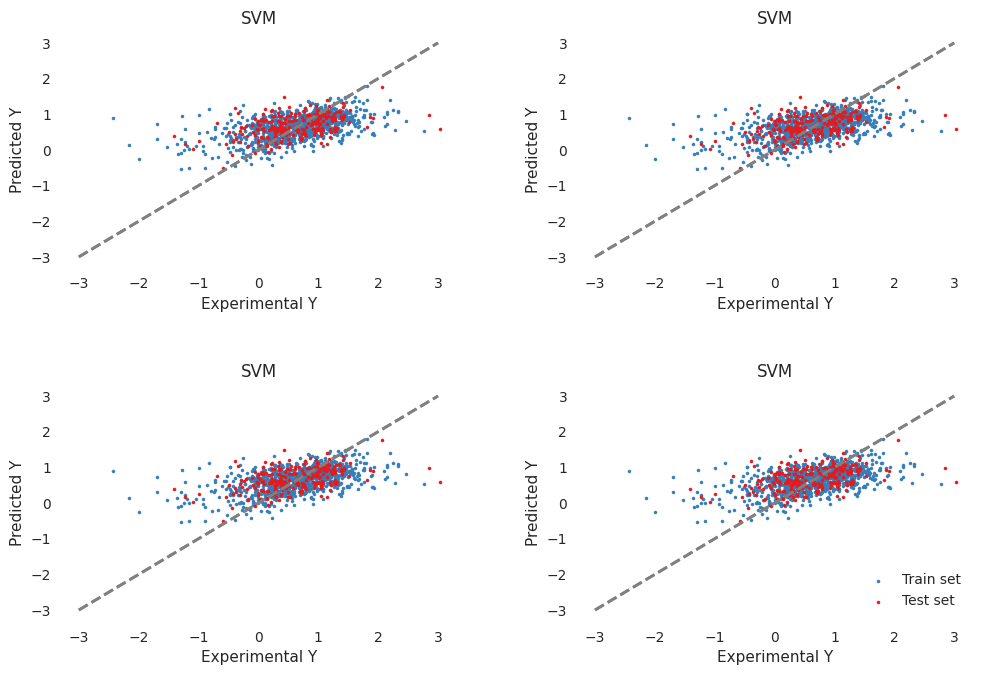

In [215]:
from qsprpred.plotting.regression import CorrelationPlot
svr_model=model
plt = CorrelationPlot([model,model,model,model])
axes, summary = plt.make(save=False)
axes[0]
print(summary)
if(df_metric.shape[0]==0):
    df_metric=summary
else:
    df_metric=df_metric.append(summary)
model_names.append(summary.iloc[0,0])
print(model_names)
test_metric_results.append(summary.iloc[1,1:4].to_list())
valid_metric_results.append(summary.iloc[0,1:4].to_list())
# print(test_metric_results)
# print(valid_metric_results)
# print(df_metric.head(10))

  ModelName        R2      RMSE       MAE  Set
0       SVM  0.269064  0.553848  0.403743   cv
1       SVM  0.195385  0.539120  0.403169  ind
['SVM', 'SVM', 'SVM', 'SVM', 'SVM']


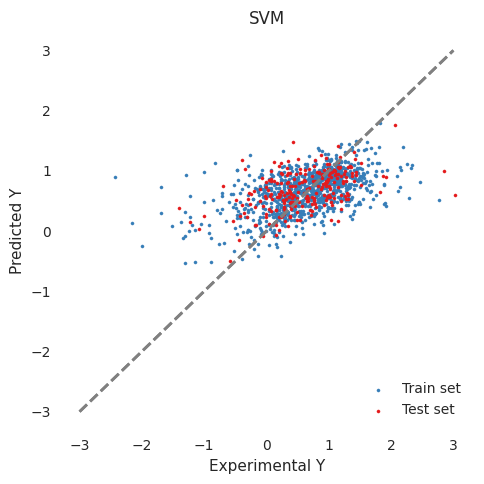

In [208]:
from qsprpred.plotting.regression import CorrelationPlot
svr_model=model
plt = CorrelationPlot([model])
axes, summary = plt.make(save=False)
axes[0]
print(summary)
if(df_metric.shape[0]==0):
    df_metric=summary
else:
    df_metric=df_metric.append(summary)
model_names.append(summary.iloc[0,0])
print(model_names)
test_metric_results.append(summary.iloc[1,1:4].to_list())
valid_metric_results.append(summary.iloc[0,1:4].to_list())
# print(test_metric_results)
# print(valid_metric_results)
# print(df_metric.head(10))

In [ ]:
#   ModelName        R2      RMSE  Set
# 0       SVR  0.215130  0.319413   cv
# 1       SVR  0.272439  0.330059  ind

## RandomForestRegressor

2023-07-14 11:28:27 | interfaces.py | MainProcess | MainThread | interfaces.readParams:80 - INFO -loading model parameters from file: ./models/RF/RF_params.json
[I 2023-07-14 11:28:28,335] A new study created in memory with name: no-name-13dd85a3-99cf-4d83-b5e3-21dbc00942af
2023-07-14 11:28:28 | models.py | MainProcess | MainThread | models.__init__:78 - INFO -parameters: None
2023-07-14 11:28:28 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.__init__:71 - WARNING -At the moment n_jobs>1 not available for bayes optimization, n_jobs set to 1.
2023-07-14 11:28:28 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.optimize:90 - INFO -Bayesian optimization can take a while for some hyperparameter combinations
2023-07-14 11:28:28 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.optimize:96 - INFO -Bayesian optimization started: 2023-07-14 11:28:28
2023-07-14 11:28:28 | models.py | MainProcess 

  ModelName        R2      RMSE       MAE  Set
0        RF  0.620559  0.434248  0.338293   cv
1        RF  0.651869  0.438628  0.342981  ind
['RF']
[[0.651868769569778, 0.43862802656863986, 0.34298085821493013]]
[[0.6205585565694207, 0.4342476990125283, 0.33829348948219556]]
  ModelName        R2      RMSE       MAE  Set
0        RF  0.620559  0.434248  0.338293   cv
1        RF  0.651869  0.438628  0.342981  ind


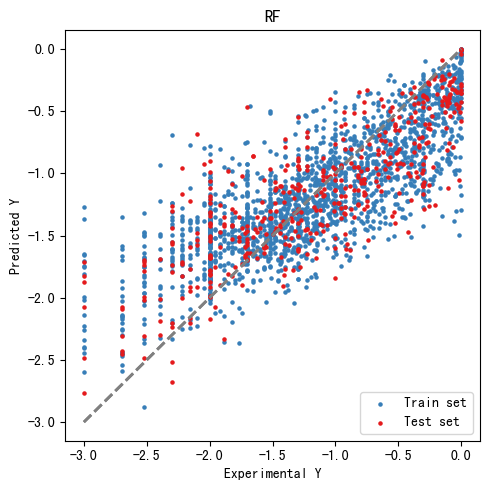

In [21]:
from qsprpred.models.models import QSPRsklearn
from sklearn.cross_decomposition import PLSRegression
 
import numbers
import os
import shutil
from os.path import exists


import numpy as np
import pandas as pd
import torch
from parameterized import parameterized

from qsprpred.models.interfaces import QSPRModel
from qsprpred.models.models import QSPRsklearn

from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from torch.utils.data import DataLoader, TensorDataset
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMRegressor
# fname = f'{os.getcwd()}/test_files/search_space.json'
# mname = themodel.name.split("_")[0]
# grid_params = themodel.__class__.loadParamsGrid(fname, "bayes", mname)
# search_space_bs = grid_params[grid_params[:, 0] == mname, 1][0]
model = QSPRsklearn(base_dir = '.', data=dataset, alg = RandomForestRegressor, name='RF')

search_space_bs = {"n_estimators": ["int", 10, 300],
        "max_depth": ["int", 2, 6],
        "min_samples_leaf": ["int", 1, 8],
        "max_features": ["int", 1, 100], 
        "min_samples_split": ["int", 2, 12] }
bayesoptimizer = OptunaOptimization(scoring = model.scoreFunc, param_grid=search_space_bs,
                                    n_trials=20, n_jobs=4)
best_params = bayesoptimizer.optimize(model)
_ = model.evaluate()

# Finally, we need to fit the model on the complete dataset if we want to use it further
# model is saved under qsprmodels/PLS_REG_GABAAalpha.pkg
model.fit()
from qsprpred.plotting.regression import CorrelationPlot

plt = CorrelationPlot([model])
axes, summary = plt.make(save=False)
axes[0]
 
print(summary)
if(df_metric.shape[0]==0):
    df_metric=summary
else:
    df_metric=df_metric.append(summary)
model_names.append(summary.iloc[0,0])
print(model_names)
test_metric_results.append(summary.iloc[1,1:4].to_list())
valid_metric_results.append(summary.iloc[0,1:4].to_list())
print(test_metric_results)
print(valid_metric_results)
print(df_metric.head(10))
rfr_model=model

In [ ]:
#   ModelName        R2      RMSE  Set
# 0       RFR  0.247914  0.312671   cv
# 1       RFR  0.275686  0.329322  ind

## XGBRegressor

2023-07-14 15:20:53 | interfaces.py | MainProcess | MainThread | interfaces.readParams:80 - INFO -loading model parameters from file: ./models/XGB/XGB_params.json
[I 2023-07-14 15:20:53,249] A new study created in memory with name: no-name-b77eabb6-7bb6-4337-a2f5-a1c1f8fe381f
2023-07-14 15:20:53 | models.py | MainProcess | MainThread | models.__init__:78 - INFO -parameters: None
2023-07-14 15:20:53 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.__init__:71 - WARNING -At the moment n_jobs>1 not available for bayes optimization, n_jobs set to 1.
2023-07-14 15:20:53 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.optimize:90 - INFO -Bayesian optimization can take a while for some hyperparameter combinations
2023-07-14 15:20:53 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.optimize:96 - INFO -Bayesian optimization started: 2023-07-14 15:20:53
2023-07-14 15:20:53 | models.py | MainProces

  ModelName        R2      RMSE       MAE  Set
0       XGB  0.418658  0.542226  0.420035   cv
1       XGB  0.419992  0.546057  0.428767  ind
['SVM', 'XGB']
[[0.2885951050908141, 0.6047547493075813, 0.4702508568725863], [0.41999157810217524, 0.5460570430253283, 0.428767373708061]]
[[0.32883853354175185, 0.5826105167180472, 0.45759731771968915], [0.4186578114852908, 0.5422264930658972, 0.4200347934633298]]
  ModelName        R2      RMSE       MAE  Set
0       SVM  0.328839  0.582611  0.457597   cv
1       SVM  0.288595  0.604755  0.470251  ind
0       XGB  0.418658  0.542226  0.420035   cv
1       XGB  0.419992  0.546057  0.428767  ind


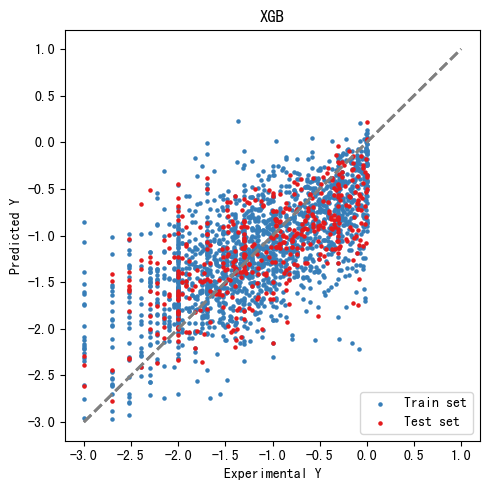

In [6]:
model = QSPRsklearn(base_dir = '.', data=dataset, alg = XGBRegressor, name='XGB')

# return ['explained_variance', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error',
#             'neg_root_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error',
#             'r2', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'neg_mean_absolute_percentage_error',
#             'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_scor']

# We will first optimize the hyperparameters (n_components and scale) through bayes optimization
# the best hyperparameter combination will be saved in PLS_REG_GABAAalpha_params.json
search_space_bs = {"n_estimators": ["int", 10, 300],
        "max_depth": ["int",3, 10],
        "learning_rate": ["uniform", 0.01, 0.1],
                   "min_child_weight":["int",1, 5],
                      "reg_alpha":["int",0, 5],
                      "gamma":["int",0, 5],
                      "reg_lambda":["int",0, 5]
                  }
bayesoptimizer = OptunaOptimization(scoring = model.scoreFunc, param_grid=search_space_bs,
                                    n_trials=20, n_jobs=4)
best_params = bayesoptimizer.optimize(model)
          # "n_estimators" : Trial.suggest_int("n_estimators", 0, 1000),
          #   'max_depth':Trial.suggest_int('max_depth', 2, 25),
          #   'reg_alpha':Trial.suggest_int('reg_alpha', 0, 5),
          #   'reg_lambda':Trial.suggest_int('reg_lambda', 0, 5),
          #   'min_child_weight':Trial.suggest_int('min_child_weight', 0, 5),
          #   'gamma':Trial.suggest_int('gamma', 0, 5),
          #   'learning_rate':Trial.suggest_loguniform('learning_rate',0.005,0.5),
          #   'colsample_bytree':Trial.suggest_discrete_uniform('colsample_bytree',0.1,1,0.01),
          #   'nthread' : -1
#Then we will evaluate the performance of the best model using the independent test set
_ = model.evaluate()

# Finally, we need to fit the model on the complete dataset if we want to use it further
# model is saved under qsprmodels/PLS_REG_GABAAalpha.pkg
model.fit()
from qsprpred.plotting.regression import CorrelationPlot

plt = CorrelationPlot([model])
axes, summary = plt.make(save=False)
axes[0]
 
print(summary)
if(df_metric.shape[0]==0):
    df_metric=summary
else:
    df_metric=df_metric.append(summary)
model_names.append(summary.iloc[0,0])
print(model_names)
test_metric_results.append(summary.iloc[1,1:4].to_list())
valid_metric_results.append(summary.iloc[0,1:4].to_list())
print(test_metric_results)
print(valid_metric_results)
print(df_metric.head(10))
xgbr_model=model

  ModelName        R2      RMSE       MAE  Set
0       XGB  0.595766  0.452321  0.346750   cv
1       XGB  0.634642  0.433559  0.329263  ind
['SVM', 'XGB', 'XGB']
[[0.6882529609494172, 0.4004888929926945, 0.30013774263244364], [0.6346423968093687, 0.43355917595292753, 0.3292630046165578], [0.6346423968093687, 0.43355917595292753, 0.3292630046165578]]
[[0.6557518401744408, 0.41741313129252644, 0.32641858398382984], [0.5957657916173671, 0.45232107684912176, 0.34674999493475306], [0.5957657916173671, 0.45232107684912176, 0.34674999493475306]]


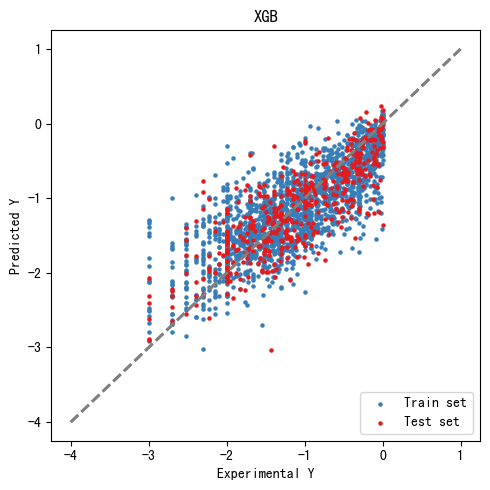

In [9]:


from qsprpred.plotting.regression import CorrelationPlot

plt = CorrelationPlot([model])
axes, summary = plt.make(save=False)
axes[0]
 
print(summary)
if(df_metric.shape[0]==0):
    df_metric=summary
else:
    df_metric=df_metric.append(summary)
model_names.append(summary.iloc[0,0])
print(model_names)
test_metric_results.append(summary.iloc[1,1:4].to_list())
valid_metric_results.append(summary.iloc[0,1:4].to_list())
print(test_metric_results)
print(valid_metric_results)
# print(df_metric.head(10))
# xgbr_model=model

In [19]:
print(model)

XGBR (XGBRegressor)


In [22]:
# print(model.model.feature_importances_)
# print(model.parameters)

[0.00428992 0.00750599 0.00298878 0.00443031 0.00290508 0.00642245
 0.         0.         0.02098837 0.00133786 0.00188528 0.00342244
 0.00232776 0.00534216 0.0036293  0.00274695 0.0045719  0.00416797
 0.00195635 0.00606907 0.00201375 0.00179964 0.00340528 0.00508064
 0.00387526 0.00565584 0.00568774 0.00358154 0.00368044 0.00256588
 0.00825174 0.00761706 0.00359694 0.00267069 0.002903   0.00496762
 0.00790278 0.00414849 0.00443143 0.00551294 0.00382853 0.00525864
 0.00739572 0.00505385 0.01035781 0.00607893 0.00425641 0.00507114
 0.00453449 0.00286992 0.00395031 0.00308691 0.00612287 0.00354628
 0.00309452 0.00689977 0.0043376  0.00995392 0.01119891 0.00418034
 0.01810649 0.01064985 0.00446061 0.00295554 0.00185179 0.02404041
 0.00631289 0.00339862 0.00853699 0.00082538 0.00582918 0.00242134
 0.00791761 0.00362188 0.00320596 0.00096042 0.00355024 0.00092612
 0.00933356 0.02283831 0.01913535 0.00209217 0.         0.01041003
 0.00766517 0.0087848  0.0035469  0.00565766 0.         0.0401

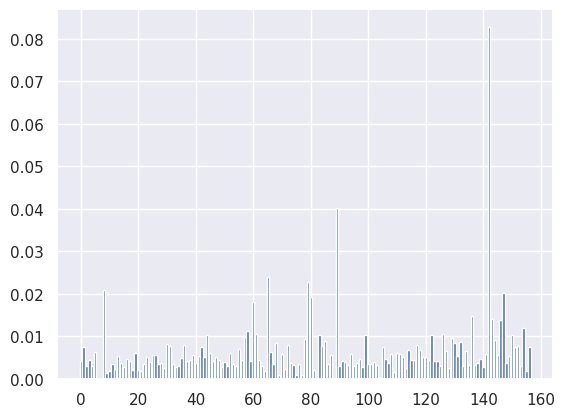

(972, 157)


In [25]:
# from xgboost import XGBClassifier
# from matplotlib import pyplot
# pyplot.bar(range(len(model.model.feature_importances_)), model.model.feature_importances_)
# pyplot.show()
# print(dataset.X.shape)


In [26]:
# print(dataset.getDescriptorNames())
print(len(dataset.getDescriptorNames()))
print(dataset.getProperties())
print(len(dataset.featureNames))
print((dataset.featureNames))

2034
Index(['SMILES', 'fup_log10', 'Y', 'QSPRID', 'Split_IsTrain'], dtype='object')
15
['Descriptor_Mordred_BCUTs-1l', 'Descriptor_Mordred_MAXsCH3', 'Descriptor_Mordred_MAXsNH2', 'Descriptor_Mordred_MAXssNH', 'Descriptor_Mordred_MAXdsN', 'Descriptor_Mordred_MAXaaN', 'Descriptor_Mordred_MAXsssN', 'Descriptor_Mordred_MAXaasN', 'Descriptor_Mordred_MAXsOH', 'Descriptor_Mordred_MAXdO', 'Descriptor_Mordred_MAXssO', 'Descriptor_Mordred_MAXsF', 'Descriptor_Mordred_MAXddssS', 'Descriptor_Mordred_MAXsCl', 'Descriptor_Mordred_Lipinski']


In [46]:
# # model.model.get_fscore(fmap='')
# model.model.get_score(fmap='', importance_type='weight') #cover gain

In [44]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 'alg',
 'baseDir',
 'checkForData',
 'classPath',
 'cleanFiles',
 'createPredictionDatasetFromMols',
 'data',
 'estimator',
 'evaluate',
 'featureCalculators',
 'featureStandardizer',
 'fit',
 'fromFile',
 'getDefaultParamsGrid',
 'getScoringFunction',
 'handleInvalidsInPredictions',
 'isMultiTask',
 'loadEstimator',
 'loadEstimatorFromFile',
 'loadParamsGrid',
 'metaFile',
 'metaInfo',
 'nTargets',
 'name',
 'outDir',
 'outPrefix',
 'parameters',
 'predict',
 'predictDataset',
 'predictMols',
 'predictProba',
 'readDescriptorCalculators',
 'readMetadata',
 'readParams',

In [33]:
model=xgbr_model

#### XGBR  特征重要性

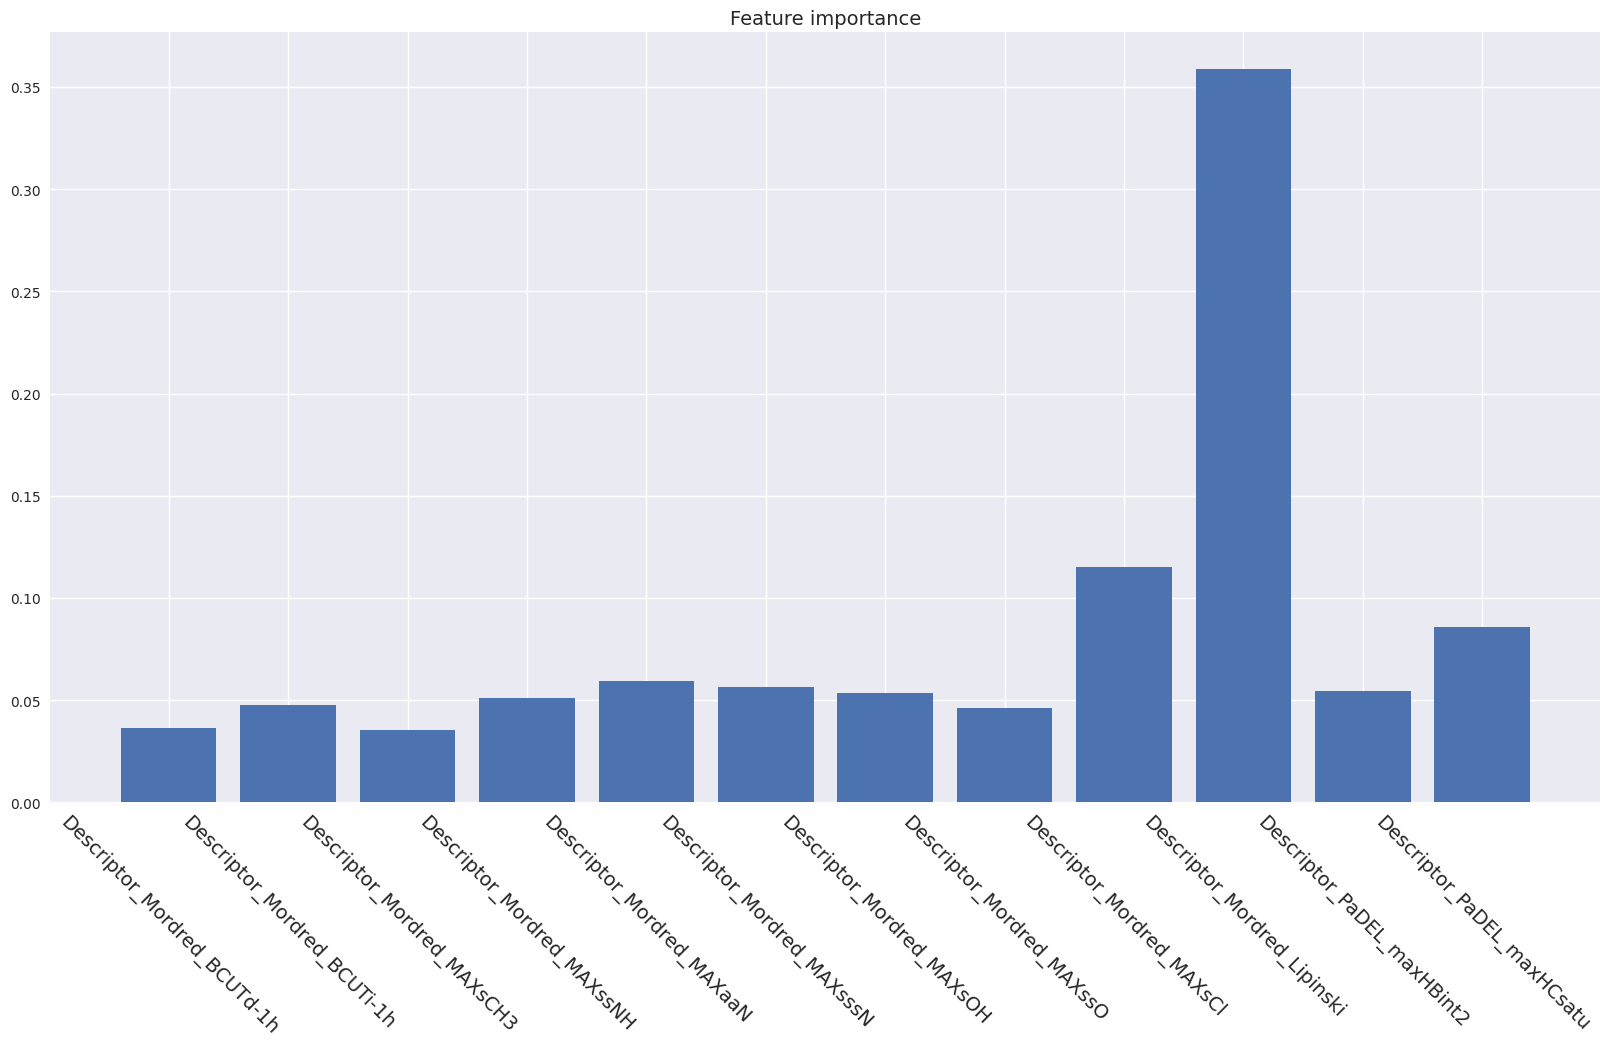

                   feature_name  importance
9   Descriptor_Mordred_Lipinski    0.358792
8     Descriptor_Mordred_MAXsCl    0.115076
11   Descriptor_PaDEL_maxHCsatu    0.085867
4     Descriptor_Mordred_MAXaaN    0.059493
5    Descriptor_Mordred_MAXsssN    0.056577
10   Descriptor_PaDEL_maxHBint2    0.054303
6     Descriptor_Mordred_MAXsOH    0.053365
3    Descriptor_Mordred_MAXssNH    0.051312
1   Descriptor_Mordred_BCUTi-1h    0.047449
7     Descriptor_Mordred_MAXssO    0.046216
0   Descriptor_Mordred_BCUTd-1h    0.036266
2    Descriptor_Mordred_MAXsCH3    0.035286
                   feature_name  importance feature_source feature_short_name feature_full_name
9   Descriptor_Mordred_Lipinski    0.358792        Mordred           Lipinski  Mordred_Lipinski
8     Descriptor_Mordred_MAXsCl    0.115076        Mordred             MAXsCl    Mordred_MAXsCl
11   Descriptor_PaDEL_maxHCsatu    0.085867          PaDEL          maxHCsatu   PaDEL_maxHCsatu
4     Descriptor_Mordred_MAXaaN    0.059493 

In [17]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('seaborn')
cols=dataset.featureNames
plt.figure(figsize=(20, 10))
plt.bar(range(len(cols)), model.estimator.feature_importances_)
plt.xticks(range(len(cols)), cols, rotation=-45, fontsize=14)
plt.title('Feature importance', fontsize=14)
plt.show()
df_feature = pd.DataFrame({'feature_name': dataset.X.columns, 'importance': model.estimator.feature_importances_})
df_feature = df_feature.sort_values('importance', ascending=False)

now_time = datetime.datetime.now()
data_str = now_time.strftime('%Y_%m_%d_%H')
feature_list=dataset.X.columns
# feature_list=["Descriptor_PaDEL_WTPT","Descriptor_PaDEL_WPATH"	,"Descriptor_RDkit_MaxAbsEStateIndex","Descriptor_Mordred_Mor01v"]
 
print(df_feature)
def split_descriptor(x,index=0):
    if "Descriptor" in x:
        if index<=1:
            return x.split("_")[index]
        elif index==2:
            return "_".join(x.split("_")[2:])
    else:
        return None
df_feature["feature_source"]=df_feature['feature_name'].apply(lambda x: split_descriptor(x,1))

df_feature["feature_short_name"]=df_feature['feature_name'].apply(lambda x: split_descriptor(x,2))
df_feature["feature_full_name"]=df_feature['feature_name'].apply(lambda x: x.replace('Descriptor_', ''))

df_feature.to_csv("data/feature_importance_%s.csv"%data_str)
print(df_feature.head(10))
df_ft_count=df_feature["feature_source"].value_counts().reset_index().sort_values(by='feature_source', ascending=False)
print(df_ft_count.columns)
df_ft_count=df_ft_count.rename(columns={'index':"feature_source", 'feature_source':"feature_cnt"})
print(df_ft_count.head(10))
df_ft_count.to_csv("data/feature_source_count_%s.csv"%data_str)

print(df_feature.head(10))

In [45]:
xgbr_model.estimator.feature_importances_

array([0.01905303, 0.01651874, 0.04411753, 0.03568565, 0.05116892,
       0.03513826, 0.03968503, 0.03900184, 0.03434956, 0.03399719,
       0.02819708, 0.04206008, 0.09416856, 0.09485107, 0.39200756],
      dtype=float32)

In [20]:
df_feature.head(10)

,feature_name,importance,feature_source,feature_short_name,feature_full_name,feature_desc,feature_desc_cn
9,Descriptor_Mordred_Lipinski,0.358792,Mordred,Lipinski,Mordred_Lipinski,--,--
8,Descriptor_Mordred_MAXsCl,0.115076,Mordred,MAXsCl,Mordred_MAXsCl,--,--
11,Descriptor_PaDEL_maxHCsatu,0.085867,PaDEL,maxHCsatu,PaDEL_maxHCsatu,Maximum atom-type H E-State: H on C sp3 bonded to unsaturated C,maxHCsatu
4,Descriptor_Mordred_MAXaaN,0.059493,Mordred,MAXaaN,Mordred_MAXaaN,--,--
5,Descriptor_Mordred_MAXsssN,0.056577,Mordred,MAXsssN,Mordred_MAXsssN,--,--
10,Descriptor_PaDEL_maxHBint2,0.054303,PaDEL,maxHBint2,PaDEL_maxHBint2,Maximum E-State descriptors of strength for potential Hydrogen Bonds of path length 2,最大氢键相互作用能
6,Descriptor_Mordred_MAXsOH,0.053365,Mordred,MAXsOH,Mordred_MAXsOH,--,--
3,Descriptor_Mordred_MAXssNH,0.051312,Mordred,MAXssNH,Mordred_MAXssNH,--,--
1,Descriptor_Mordred_BCUTi-1h,0.047449,Mordred,BCUTi-1h,Mordred_BCUTi-1h,The BCUT descriptor for information shadow 1 of height 1,高度为1的信息阴影1的BCUT描述符
7,Descriptor_Mordred_MAXssO,0.046216,Mordred,MAXssO,Mordred_MAXssO,The maximum atomic surface area of the oxygen atom,氧原子的最大原子表面积


In [18]:
model=xgbr_model

In [34]:
df_feature.columns

Index(['feature_name', 'importance', 'feature_source', 'feature_short_name', 'feature_full_name', 'feature_desc', 'feature_desc_cn'], dtype='object')

In [35]:

# feature_name feature_source feature_short_name   feature_full_name
# 0           Descriptor_RDkit_qed          RDkit                qed           RDkit_qed
# 1  Descriptor_RDkit_FractionCSP3          RDkit       FractionCSP3  RDkit_FractionCSP3
# 2     Descriptor_Mordred_MAXsCH3        Mordred            MAXsCH3     Mordred_MAXsCH3
# 3     Descriptor_Mordred_MAXaaCH        Mordred            MAXaaCH     Mordred_MAXaaCH
# 4     Descriptor_Mordred_MAXssNH        Mordred            MAXssNH     Mordred_MAXssNH
# 5      Descriptor_Mordred_MAXsOH        Mordred             MAXsOH      Mordred_MAXsOH
# 6       Descriptor_Mordred_MAXdO        Mordred              MAXdO       Mordred_MAXdO
# 7      Descriptor_Mordred_MAXssO        Mordred             MAXssO      Mordred_MAXssO
df_feature_3d_mark['is_3d'].value_counts()

Index(['feature_name', 'value', 'is_3d'], dtype='object')
(1826, 3)
                  feature_name  importance feature_source feature_short_name feature_full_name                                                                           feature_desc     feature_desc_cn is_3d
0  Descriptor_Mordred_Lipinski    0.358792        Mordred           Lipinski  Mordred_Lipinski                                                                                     --                  --    2D
1    Descriptor_Mordred_MAXsCl    0.115076        Mordred             MAXsCl    Mordred_MAXsCl                                                                                     --                  --    2D
2   Descriptor_PaDEL_maxHCsatu    0.085867          PaDEL          maxHCsatu   PaDEL_maxHCsatu                        Maximum atom-type H E-State: H on C sp3 bonded to unsaturated C           maxHCsatu   NaN
3    Descriptor_Mordred_MAXaaN    0.059493        Mordred             MAXaaN    Mordred_MAXaaN      

2D    10
Name: is_3d, dtype: int64

Index(['feature_name', 'importance', 'feature_source', 'feature_short_name', 'feature_full_name', 'feature_desc', 'feature_desc_cn', 'is_3d_x', 'Descriptor Java Class', 'padel_description', 'is_3d_y'], dtype='object')
2D    10
Name: is_3d_x, dtype: int64


Index(['Descriptor Java Class', 'Descriptor', 'Description', 'Class'], dtype='object')


type: 'is_3d'

Summary
Detailed
Fingerprints
EStateFingerprinter
SubstructureFingerprinter
KlekotaRothFingerprinter
AtomPairs2DFingerprinter
2D    1444
3D     431
Name: Class, dtype: int64
Index(['feature_name', 'value', 'is_3d'], dtype='object')
(1826, 3)


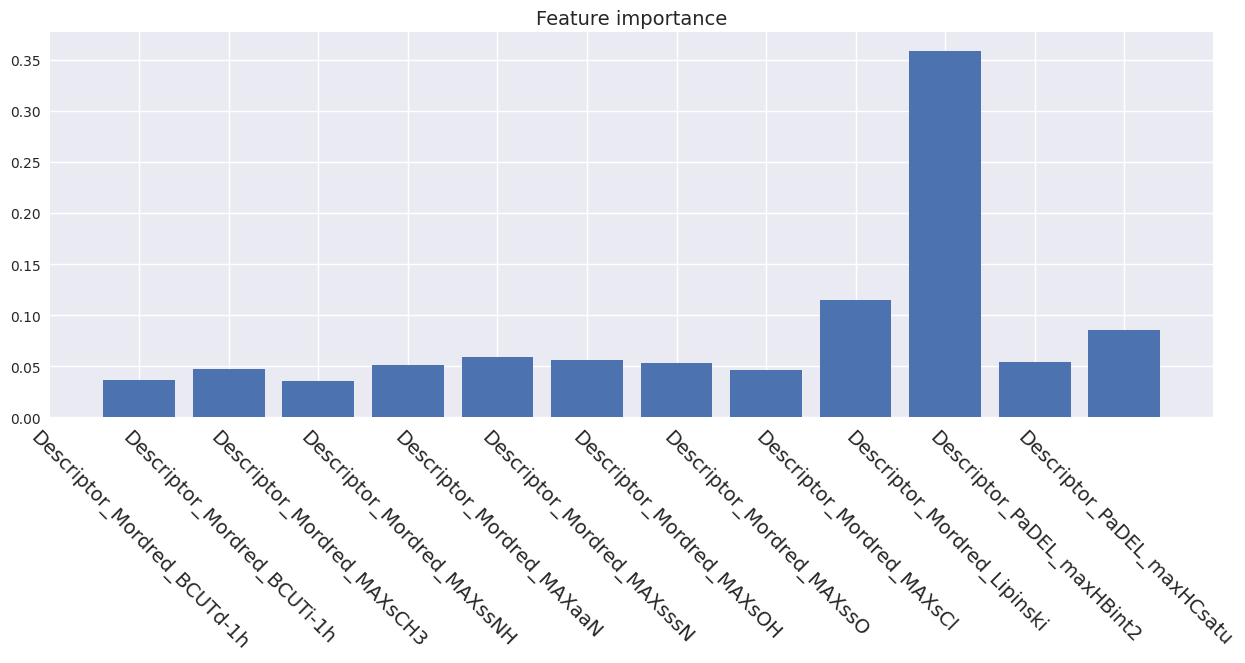

2023-07-14 17:57:39 | 2219381977.py | MainProcess | MainThread | 2219381977.<cell line: 666>:666 - INFO -Index(['feature_name', 'importance', 'feature_source', 'feature_short_name', 'feature_full_name', 'feature_desc', 'feature_desc_cn'], dtype='object')


Empty DataFrame
Columns: [feature_source, feature_cnt]
Index: []
                   feature_name  importance
9   Descriptor_Mordred_Lipinski    0.358792
8     Descriptor_Mordred_MAXsCl    0.115076
11   Descriptor_PaDEL_maxHCsatu    0.085867
4     Descriptor_Mordred_MAXaaN    0.059493
5    Descriptor_Mordred_MAXsssN    0.056577
10   Descriptor_PaDEL_maxHBint2    0.054303
6     Descriptor_Mordred_MAXsOH    0.053365
3    Descriptor_Mordred_MAXssNH    0.051312
1   Descriptor_Mordred_BCUTi-1h    0.047449
7     Descriptor_Mordred_MAXssO    0.046216
0   Descriptor_Mordred_BCUTd-1h    0.036266
2    Descriptor_Mordred_MAXsCH3    0.035286
                   feature_name  importance feature_source feature_short_name feature_full_name                                                                           feature_desc     feature_desc_cn
9   Descriptor_Mordred_Lipinski    0.358792        Mordred           Lipinski  Mordred_Lipinski                                                                 

2023-07-14 17:57:40 | 2219381977.py | MainProcess | MainThread | 2219381977.<cell line: 690>:690 - INFO -save at :data/feature_importance_cl_2023_07_14_17.xlsx


In [46]:
import xgboost as xgb
import pandas as pd
import numpy as np
#特征解释
padel_param_desc_cn={
    "maxHBint2": "最大氢键相互作用能",
    "AATS5s": "平均相对成环原子类型5的局部自由度比值",
    "AATS2v": "平均相对成环原子类型2的绝对电荷",
    "ETA_dEpsilon_B": "电子极化能的平均值与标准差之比",
    "AATS3v": "平均相对成环原子类型3的绝对电荷",
    "nsssCH": "非等效单质子芳香碳原子的数目",
    "maxHsOH": "最大氢键供体原子数目",
    "MAXDN2": "最大氮原子的质子受体数目",
    "MDEO-11": "平均距离等价性数目",
    "SpMin1_Bhe": "最小边界分子表面电荷的一阶矩",
    "AATS1p": "平均相对成环原子类型1的偏极性",
    "ATSC0s": "相对成环原子的零阶Schiultz电荷",
    "nBase": "碱性中心原子的数目",
    "ETA_dBeta": "电荷-电荷相互作用能的平均值与标准差之比",
    "SpMin1_Bhi": "最小边界分子表面电荷的一阶矩",
    "AATS1v": "平均相对成环原子类型1的绝对电荷",
    "maxssO": "最大的单质子硫代氧原子数目",
    "AATS0i": "平均相对成环原子类型0的一阶矩",
    "SpMin7_Bhs": "最小边界分子表面电荷的七阶矩",
    "SpMax2_Bhs": "最大边界分子表面电荷的二阶矩",
    "VE2_Dzv": "二阶电子亲和势的绝对值",
    "ETA_EtaP": "极化率的平均值与标准差之比",
    "AATS2p": "平均相对成环原子类型2的偏极性",
    "AATSC5s": "平均相对成环原子类型5的Schiultz电荷",
    "ETA_dBetaP": "电荷-偏极性相互作用能的平均值与标准差之比",
    "XLogP": "分子的LogP值",
    "VE3_Dzv": "三阶电子亲和势的绝对值",
    "GATS2e": "二阶Geary自相关描述符的平均值",
    "SpMin2_Bhe": "最小边界分子表面电荷的二阶矩",
    "Mi": "分子的相对分子质量",
    "GATS3c": "三阶Geary自相关描述符的平均值",
    "GATS5c": "五阶Geary自相关描述符的平均值",
    "maxHBd": "最大氢键受体原子数目",
    "ATSC1e": "相对成环原子的一阶Schiultz电荷",
    "MATS5e": "五阶Moran自相关描述符的平均值",
    "AATS2i": "平均相对成环原子类型2的一阶矩",
    "MAXDN": "最大氮原子的质子供体数目",
    "ETA_BetaP_ns": "非同构分子的电荷-偏极性相互作用能的平均值与标准差之比",
    "SpMin1_Bhs": "最小边界分子表面电荷的一阶矩",
    "VE2_Dzi": "二阶电子亲和势的平均值",
    "VE1_Dzp": "一阶电子亲和势的正值",
    "GATS7c": "七阶Geary自相关描述符的平均值",
    "MATS3c": "三阶Moran自相关描述符的平均值",
    "minHBa": "最小氢键受体原子数目",
    "ATSC7e": "相对成环原子的七阶Schiultz电荷",
    "VE1_Dzv": "一阶电子亲和势的绝对值",
    "VE3_Dzs": "三阶电子亲和势的正值",
    "GATS2i": "二阶Geary自相关描述符的一阶矩",
    "ATSC6c": "相对成环原子的六阶Schiultz电荷",
    "BCUTc-1l": "Burden聚合度描述符的最后一项",
    "SpMax1_Bhv": "最大边界分子表面电荷的一阶矩",
    "ATSC7c": "相对成环原子的七阶Schiultz电荷",
    "AATSC4c": "平均相对成环原子类型4的Schiultz电荷",
    "ETA_BetaP": "电荷-偏极性相互作用能的平均值与标准差之比",
    "MATS4c": "四阶Moran自相关描述符的平均值",
    "ATSC6e": "相对成环原子的六阶Schiultz电荷",
    "SHBint6": "最小氢键供体原子数目与最大氢键受体原子数目之和的一阶矩",
    "ATSC5s": "相对成环原子的五阶Schiultz电荷",
    "ALogP": "分子的ALogP值",
    "AATS1i": "平均相对成环原子类型1的一阶矩",
    "ATSC6s": "相对成环原子的六阶Schiultz电荷",
    "ATSC4v": "相对成环原子的四阶Schiultz电荷",
    "CrippenLogP": "分子的Crippen LogP值",
    "SHBint2": "最小氢键供体原子数目与最大氢键受体原子数目之和的一阶矩",
    "AATSC1i": "平均相对成环原子类型1的Schiultz电荷",
    "Mv": "分子的相对体积",
    "ATSC3c": "相对成环原子的三阶Schiultz电荷",
    "CIC2": "分子的一级离心矩",
    "SpMax1_Bhe": "最大边界分子表面电荷的一阶矩",
    "ATSC5e": "相对成环原子的五阶Schiultz电荷",
    "minHBint2": "最小氢键供体原子数目与最大氢键受体原子数目之和的一阶矩",
    "ATSC1i": "相对成环原子的一阶Schiultz电荷",
    "GATS1e": "一阶Geary自相关描述符的平均值",
    "SpMax1_Bhi": "最大边界分子表面电荷的一阶矩",
    "AATS4v": "平均相对成环原子类型4的绝对电荷",
    "piPC4": "分子的piPC4值",
    "MATS1i": "一阶Moran自相关描述符的平均值",
    "AATS0v": "平均相对成环原子类型0的绝对电荷",
    "AATSC2s": "平均相对成环原子类型2的Schiultz电荷",
    "AATS4s": "平均相对成环原子类型4的局部自由度比值",
    "AATS5v": "平均相对成环原子类型5的绝对电荷",
    "maxHCsatu":"maxHCsatu"
}
import pandas as pd  

# 读取Excel文件中的所有sheet  
file_path = '/data/anaconda3/envs/pkmodel/lib/python3.10/site-packages/PaDEL_pywrapper/PaDEL-Descriptor/Descriptors.xls' 
sheets_dict = pd.read_excel(file_path, sheet_name=None)  
sheet_list=[]
# 输出所有sheet的名称  
for sheet_name in sheets_dict.keys():  
    print(sheet_name)  
    sheet_list.append(sheet_name)
# 读取特定的sheet  

sheet_name = sheet_list[1]
df_padel_name = pd.read_excel(file_path, sheet_name=sheet_name)  
  
# print(df_padel_name.shape)
# print(df_padel_name.columns)
# print(df_padel_name.head(100))
print(df_padel_name['Class'].value_counts())
padel_desc_dic = df_padel_name.set_index('Descriptor')['Description'].to_dict()  
padel_desc_class = df_padel_name.set_index('Descriptor')['Class'].to_dict()  
# print(df_padel_name)  
# print(padel_desc_dic)  
# print(padel_desc_class)  

padel_param_desc=padel_desc_dic
# {
#   "maxHBint2": "最大氢键相互作用2",
#   "AATS5s": "原子类型平均距离5s",
#   "AATS2v": "原子类型平均距离2v",
#   "ETA_dEpsilon_B": "电子态密度属性",
#   "AATS3v": "原子类型平均距离3v",
#   "nsssCH": "三重键上的sp^3杂化碳原子数量",
#   "maxHsOH": "最大质子化羟基数量",
#   "MAXDN2": "最大二级氮原子数量",
#   "MDEO-11": "11级分子距离边缘",
#   "SpMin1_Bhe": "最小分子距离1_Bhe",
#   "AATS1p": "原子类型平均距离1p",
#   "ATSC0s": "原子类型距离和0s",
#   "nBase": "碱性氮原子数量",
#   "ETA_dBeta": "贝塔距离属性",
#   "SpMin1_Bhi": "最小分子距离1_Bhi",
#   "AATS1v": "原子类型平均距离1v",
#   "maxssO": "最大双键氧原子数量",
#   "AATS0i": "原子类型平均距离0i",
#   "SpMin7_Bhs": "最小分子距离7_Bhs",
#   "SpMax2_Bhs": "最大分子距离2_Bhs",
#   "VE2_Dzv": "二阶距离电荷指数2_Dzv",
#   "ETA_EtaP": "整体分子极性",
#   "AATS2p": "原子类型平均距离2p",
#   "AATSC5s": "原子类型距离和5s",
#   "ETA_dBetaP": "贝塔距离属性P",
#   "XLogP": "XLogP描述符",
#   "VE3_Dzv": "三阶距离电荷指数3_Dzv",
#   "GATS2e": "几何平均距离2e",
#   "SpMin2_Bhe": "最小分子距离2_Bhe",
#   "Mi": "分子信息",
#   "GATS3c": "几何平均距离3c",
#   "GATS5c": "几何平均距离5c",
#   "maxHBd": "最大氢键供体",
#   "ATSC1e": "原子类型距离和1e",
#   "MATS5e": "平均距离5e",
#   "AATS2i": "原子类型平均距离2i",
#   "MAXDN": "最大氮原子数量",
#   "ETA_BetaP_ns": "非极性贝塔距离属性",
#   "SpMin1_Bhs": "最小分子距离1_Bhs",
#   "VE2_Dzi": "二阶距离电荷指数2_Dzi",
#   "VE1_Dzp": "一阶距离电荷指数1_Dzp",
#   "GATS7c": "几何平均距离7c",
#   "MATS3c": "平均距离3c",
#   "minHBa": "最小氢键受体",
#   "ATSC7e": "原子类型距离和7e",
#   "VE1_Dzv": "一阶距离电荷指数1_Dzv",
#   "VE3_Dzs": "三阶距离电荷指数3_Dzs",
#   "GATS2i": "几何平均距离2i",
#   "ATSC6c": "原子类型距离和6c",
#   "BCUTc-1l": "BCUT描述符-1l",
#   "SpMax1_Bhv": "最大分子距离1_Bhv",
#   "ATSC7c": "原子类型距离和7c",
#   "AATSC4c": "原子类型距离和4c",
#   "ETA_BetaP": "贝塔距离属性",
#   "MATS4c": "平均距离4c",
#   "ATSC6e": "原子类型距离和6e",
#   "SHBint6": "氢键相互作用6",
#   "ATSC5s": "原子类型距离和5s",
#   "ALogP": "ALogP描述符",
#   "AATS1i": "原子类型平均距离1i",
#   "ATSC6s": "原子类型距离和6s",
#   "ATSC4v": "原子类型距离和4v",
#   "CrippenLogP": "CrippenLogP描述符",
#   "SHBint2": "氢键相互作用2",
#   "AATSC1i": "原子类型距离和1i",
#   "Mv": "分子体积",
#   "ATSC3c": "原子类型距离和3c",
#   "CIC2": "连续信息指数2",
#   "SpMax1_Bhe": "最大分子距离1_Bhe",
#   "ATSC5e": "原子类型距离和5e",
#   "minHBint2": "最小氢键相互作用2",
#   "ATSC1i": "原子类型距离和1i",
#   "GATS1e": "几何平均距离1e",
#   "SpMax1_Bhi": "最大分子距离1_Bhi",
#   "AATS4v": "原子类型平均距离4v",
#   "piPC4": "pi电子偏极化4",
#   "MATS1i": "平均距离1i"
# }
# {
#     'AtomCount': '原子数',
#     'BalabanJ': 'Balaban J指数',
#     'BertzCT': 'Bertz CT指数',
#     'Chi0': 'Chi0',
#     'Chi0n': 'Chi0n',
#     'Chi0v': 'Chi0v',
#     'Chi1': 'Chi1',
#     'Chi1n': 'Chi1n',
#     'Chi1v': 'Chi1v',
#     'Chi2n': 'Chi2n',
#     'Chi2v': 'Chi2v',
#     'Chi3n': 'Chi3n',
#     'Chi3v': 'Chi3v',
#     'Chi4n': 'Chi4n',
#     'Chi4v': 'Chi4v',
#     'EState_VSA1': 'EState_VSA1',
#     'EState_VSA10': 'EState_VSA10',
#     'EState_VSA11': 'EState_VSA11',
#     'EState_VSA2': 'EState_VSA2',
#     'EState_VSA3': 'EState_VSA3',
#     'EState_VSA4': 'EState_VSA4',
#     'EState_VSA5': 'EState_VSA5',
#     'EState_VSA6': 'EState_VSA6',
#     'EState_VSA7': 'EState_VSA7',
#     'EState_VSA8': 'EState_VSA8',
#     'EState_VSA9': 'EState_VSA9',
#     'ExactMolWt': '分子量',
#     'FpDensityMorgan1': 'FpDensityMorgan1',
#     'FpDensityMorgan2': 'FpDensityMorgan2',
#     'FpDensityMorgan3': 'FpDensityMorgan3',
#     'HeavyAtomCount': '重原子数',
#     'Ipc': 'Ipc',
#     'Kappa1': 'Kappa1',
#     'Kappa2': 'Kappa2',
#     'Kappa3': 'Kappa3',
#     'LabuteASA': 'LabuteASA',
#     'MaxAbsEStateIndex': 'MaxAbsEStateIndex',
#     'MaxEStateIndex': 'MaxEStateIndex',
#     'MinAbsEStateIndex': 'MinAbsEStateIndex',
#     'MinEStateIndex': 'MinEStateIndex',
#     'MolLogP': 'MolLogP',
#     'MolMR': 'MolMR',
#     'MolSurfaceArea': 'MolSurfaceArea',
#     'NumAliphaticCarbocycles': 'AliphaticCarbocycles数',
#     'NumAliphaticHeterocycles': 'AliphaticHeterocycles数',
#     'NumAliphaticRings': 'Aliphatic环数',
#     'NumAromaticCarbocycles': 'AromaticCarbocycles数',
#     'NumAromaticHeterocycles': 'AromaticHeterocycles数',
#     'NumAromaticRings': 'Aromatic环数',
#     'NumHAcceptors': '氢键受体数',
#     'NumHDonors': '氢键供体数',
#     'NumHeteroatoms': '杂原子数',
#     'NumRotatableBonds': '可旋转键数',
#     'NumSaturatedCarbocycles': 'SaturatedCarbocycles数',
#     'NumSaturatedHeterocycles': 'SaturatedHeterocycles数',
#     'NumSaturatedRings': 'Saturated环数',
#     'PEOE_VSA1': 'PEOE_VSA1',
#     'PEOE_VSA10': 'PEOE_VSA10',
#     'PEOE_VSA11': 'PEOE_VSA11',
#     'PEOE_VSA12': 'PEOE_VSA12',
#     'PEOE_VSA13': 'PEOE_VSA13',
#     'PEOE_VSA14': 'PEOE_VSA14',
#     'PEOE_VSA2': 'PEOE_VSA2',
#     'PEOE_VSA3': 'PEOE_VSA3',
#     'PEOE_VSA4': 'PEOE_VSA4',
#     'PEOE_VSA5': 'PEOE_VSA5',
#     'PEOE_VSA6': 'PEOE_VSA6',
#     'PEOE_VSA7': 'PEOE_VSA7',
#     'PEOE_VSA8': 'PEOE_VSA8',
#     'PEOE_VSA9': 'PEOE_VSA9',
#     'RingCount': '环数',
#     'SMR_VSA1': 'SMR_VSA1',
#     'SMR_VSA10': 'SMR_VSA10',
#     'SMR_VSA2': 'SMR_VSA2',
#     'SMR_VSA3': 'SMR_VSA3',
#     'SMR_VSA4': 'SMR_VSA4',
#     'SMR_VSA5': 'SMR_VSA5',
#     'SMR_VSA6': 'SMR_VSA6',
#     'SMR_VSA7': 'SMR_VSA7',
#     'SMR_VSA8': 'SMR_VSA8',
#     'SMR_VSA9': 'SMR_VSA9',
#     'SlogP_VSA1': 'SlogP_VSA1',
#     'SlogP_VSA10': 'SlogP_VSA10',
#     'SlogP_VSA11': 'SlogP_VSA11',
#     'SlogP_VSA12': 'SlogP_VSA12',
#     'SlogP_VSA2': 'SlogP_VSA2',
#     'SlogP_VSA3': 'SlogP_VSA3',
#     'SlogP_VSA4': 'SlogP_VSA4',
#     'SlogP_VSA5': 'SlogP_VSA5',
#     'SlogP_VSA6': 'SlogP_VSA6',
#     'SlogP_VSA7': 'SlogP_VSA7',
#     'SlogP_VSA8': 'SlogP_VSA8',
#     'SlogP_VSA9': 'SlogP_VSA9',
#     'TPSA': 'TPSA',
#     'VSA_EState1': 'VSA_EState1',
#     'VSA_EState10': 'VSA_EState10',
#     'VSA_EState2': 'VSA_EState2',
#     'VSA_EState3': 'VSA_EState3',
#     'VSA_EState4': 'VSA_EState4',
#     'VSA_EState5': 'VSA_EState5',
#     'VSA_EState6': 'VSA_EState6',
#     'VSA_EState7': 'VSA_EState7',
#     'VSA_EState8': 'VSA_EState8',
#     'VSA_EState9': 'VSA_EState9',
#     'fr_Al_COO': 'fr_Al_COO',
#     'fr_Al_OH': 'fr_Al_OH',
#     'fr_Al_OH_noTert': 'fr_Al_OH_noTert',
#     'fr_ArN': 'fr_ArN',
#     'fr_Ar_COO': 'fr_Ar_COO',
#     'fr_Ar_N': 'fr_Ar_N',
#     'fr_Ar_NH': 'fr_Ar_NH',
#     'fr_Ar_OH': 'fr_Ar_OH',
#     'fr_COO': 'fr_COO',
#     'fr_COO2': 'fr_COO2',
#     'fr_C_O': 'fr_C_O',
#     'fr_C_O_noCOO': 'fr_C_O_noCOO',
#     'fr_C_S': 'fr_C_S',
#     'fr_HOCCN': 'fr_HOCCN',
#     'fr_Imine': 'fr_Imine',
#     'fr_NH0': 'fr_NH0',
#     'fr_NH1': 'fr_NH1',
#     'fr_NH2': 'fr_NH2',
#     'fr_N_O': 'fr_N_O',
#     'fr_Ndealkylation1': 'fr_Ndealkylation1',
#     'fr_Ndealkylation2': 'fr_Ndealkylation2',
#     'fr_Nhpyrrole': 'fr_Nhpyrrole',
#     'fr_SH': 'fr_SH',
#     'fr_aldehyde': 'fr_aldehyde',
#     'fr_alkyl_carbamate': 'fr_alkyl_carbamate',
#     'fr_alkyl_halide': 'fr_alkyl_halide',
#     'fr_allylic_oxid': 'fr_allylic_oxid',
#     'fr_amide': 'fr_amide',
#     'fr_amidine': 'fr_amidine',
#     'fr_aniline': 'fr_aniline',
#     'fr_aryl_methyl': 'fr_aryl_methyl',
#     'fr_azide': 'fr_azide',
#     'fr_azo': 'fr_azo',
#     'fr_barbitur': 'fr_barbitur',
#     'fr_benzene': 'fr_benzene',
#     'fr_benzodiazepine': 'fr_benzodiazepine',
#     'fr_bicyclic': 'fr_bicyclic',
#     'fr_diazo': 'fr_diazo',
#     'fr_dihydropyridine': 'fr_dihydropyridine',
#     'fr_epoxide': 'fr_epoxide',
#     'fr_ester': 'fr_ester',
#     'fr_ether': 'fr_ether',
#     'fr_furan': 'fr_furan',
#     'fr_guanido': 'fr_guanido',
#     'fr_halogen': 'fr_halogen',
#     'fr_hdrzine': 'fr_hdrzine',
#     'fr_hdrzone': 'fr_hdrzone',
#     'fr_imidazole': 'fr_imidazole',
#     'fr_imide': 'fr_imide',
#     'fr_isocyan': 'fr_isocyan',
#     'fr_isothiocyan': 'fr_isothiocyan',
#     'fr_ketone': 'fr_ketone',
#     'fr_ketone_Topliss': 'fr_ketone_Topliss',
#     'fr_lactam': 'fr_lactam',
#     'fr_lactone': 'fr_lactone',
#     'fr_methoxy': 'fr_methoxy',
#     'fr_morpholine': 'fr_morpholine',
#     'fr_nitrile': 'fr_nitrile',
#     'fr_nitro': 'fr_nitro',
#     'fr_nitro_arom': 'fr_nitro_arom',
#     'fr_nitro_arom_nonortho': 'fr_nitro_arom_nonortho',
#     'fr_nitroso': 'fr_nitroso',
#     'fr_oxazole': 'fr_oxazole',
#     'fr_oxime': 'fr_oxime',
#     'fr_para_hydroxylation': 'fr_para_hydroxylation',
#     'fr_phenol': 'fr_phenol',
#     'fr_phenol_noOrthoHbond': 'fr_phenol_noOrthoHbond',
#     'fr_phos_acid': 'fr_phos_acid',
#     'fr_phos_ester': 'fr_phos_ester',
#     'fr_piperdine': 'fr_piperdine',
#     'fr_piperzine': 'fr_piperzine',
#     'fr_priamide': 'fr_priamide',
#     'fr_prisulfonamd': 'fr_prisulfonamd',
#     'fr_pyridine': 'fr_pyridine',
#     'fr_quatN': 'fr_quatN',
#     'fr_sulfide': 'fr_sulfide',
#     'fr_sulfonamd': 'fr_sulfonamd',
#     'fr_sulfone': 'fr_sulfone',
#     'fr_term_acetylene': 'fr_term_acetylene',
#     'fr_tetrazole': 'fr_tetrazole',
#     'fr_thiazole': 'fr_thiazole',
#     'fr_thiocyan': 'fr_thiocyan',
#     'fr_thiophene': 'fr_thiophene',
#     'fr_unbrch_alkane': 'fr_unbrch_alkane',
#     'fr_urea': 'fr_urea',
#        "n_atoms": "分子中原子的数量",
#     "n_bonds": "分子中键的数量",
#     "n_rings": "分子中环的数量",
#     "n_aromatic_rings": "分子中芳香环的数量",
#     "n_aromatic_atoms": "分子中芳香原子的数量",
#     "n_rotatable_bonds": "分子中可旋转键的数量",
#     "n_HBA": "氢键受体原子的数量",
#     "n_HBD": "氢键供体原子的数量",
#     "n_hetero_atoms": "杂质原子的数量",
#     "n_heavy_atoms": "重原子的数量",
#     "n_amide_bonds": "酰胺键的数量",
#     "n_esters": "酯的数量",
#     "n_carbonyl_groups": "羰基的数量",
#     "n_sulfonamides": "磺酰胺的数量",
#     "n_phosphonates": "磷酸酯的数量",
#     "n_halides": "卤素的数量",
#     "n_cyano_groups": "氰基的数量",
#     "n_nitro_groups": "硝基的数量",
#     "n_alkyl_halides": "卤代烷基的数量",
#     "n_alkyl_nitrates": "硝酸烷基的数量",
#     "n_alkyl_cyanides": "氰代烷基的数量",
#     "n_alkyl_esters": "酯代烷基的数量",
#     "n_alkyl_amides": "酰胺代烷基的数量",
#     "n_alkyl_phosphonates": "磷酸酯代烷基的数量",
#     "n_alkyl_sulfonamides": "磺酰胺代烷基的数量",
#     "n_aliphatic_rings": "脂环的数量",
#     "n_saturated_rings": "饱和环的数量",
#     "n_unsaturated_rings": "不饱和环的数量",
#     "n_atoms_stereo_centers": "原子立体中心的数量",
#     "n_atoms_unspecified_stereo_centers": "未指定原子立体中心的数量",
#     "n_bonds_stereo_centers": "键立体中心的数量",
#     "n_bonds_unspecified_stereo_centers": "未指定键立体中心的数量",
#     "molecular_weight": "分子量",
#     "XLogP": "分子的XLogP值，表示分子的疏水性",
#     "topological_polar_surface_area": "拓扑极性表面积",
#     "complexity": "分子的复杂性",
#     "formal_charge": "分子的正式电荷"
# }
mordred_feature=pd.read_csv("mordred_feature.csv")
print(mordred_feature.columns)
print(mordred_feature.shape)
mordred_feature=mordred_feature[['feature_name',  'is_3d']]

mordred_feature['feature_source']= "Mordred"
mordred_feature.head(10)
mordred_param_desc_cn={
    "ETA_dBeta": "中心原子与其两个相邻原子的电负性差值",
    "AETA_eta_R": "中心原子的共振电荷",
    "AETA_beta_ns": "与中心原子相邻的非氢原子数目",
    "ETA_eta_B": "中心原子的键级",
    "BCUTp-1l": "长度为1的路径1的BCUT描述符",
    "AETA_beta": "与中心原子相邻的原子数目",
    "MDEO-12": "距离加权离心率指数的第12个矩",
    "GATS1s": "一阶图/电荷加权自相关描述符，以Sanderson电负性加权",
    "mZagreb1": "第一个修改的Zagreb指数",
    "GATS5are": "第五阶图/电荷加权自相关描述符，以原子极化率加权",
    "GATS2s": "二阶图/电荷加权自相关描述符，以Sanderson电负性加权",
    "BCUTs-1h": "高度为1的阴影1的BCUT描述符",
    "MINdssC": "分子中两个原子之间的最小距离",
    "AETA_dBeta": "中心原子与其两个相邻原子的电负性差值",
    "MAXaasC": "中心原子的最大原子表面积",
    "BCUTi-1h": "高度为1的信息阴影1的BCUT描述符",
    "ATSC2s": "以2为滞后的第二个原子中心对称性描述符",
    "AMID_h": "分子的原子质量的调和平均数",
    "MATS5dv": "距离加权平均拓扑电荷指数的第5个矩",
    "AATSC5s": "以5为滞后的第五个原子中心对称性描述符",
    "BCUTdv-1h": "高度为1的距离向量1的BCUT描述符",
    "AATS4s": "以Sanderson电负性原子类型为基础的第四个原子类型E-state描述符",
    "BCUTd-1l": "长度为1的距离1的BCUT描述符",
    "AATSC2s": "以Sanderson电负性原子类型为基础的第二个原子类型E-state描述符",
    "AXp-0dv": "以范德华体积为基础的第零个原子中心距离加权描述符",
    "BCUTse-1h": "高度为1的阴影边缘1的BCUT描述符",
    "GATS5pe": "以Petitjean形状指数加权的第五阶图/电荷加权自相关描述符",
    "AATS5pe": "以Petitjean极化率原子类型为基础的第五个原子类型E-state描述符",
    "AXp-5dv": "以范德华体积为基础的第五个原子中心距离加权描述符",
    "AETA_eta_BR": "以键级加权的中心原子共振电荷",
    "BCUTc-1l": "长度为1的电荷1的BCUT描述符",
    "ETA_shape_y": "中心原子的形状指数",
    "Xp-0dv": "以Sanderson电负性为基础的第零个原子中心距离加权描述符",
    "AETA_eta": "以与中心原子相邻的原子数目加权的中心原子共振电荷",
    "AATS5i": "以I-state为基础的第五个原子类型E-state描述符",
    "GATS6are": "以原子极化率加权的第六阶图/电荷加权自相关描述符",
    "MAXsCH3": "甲基基团的最大原子表面积",
    "AATSC4s": "以4为滞后的第四个原子中心对称性描述符",
    "BCUTdv-1l": "长度为1的距离向量1的BCUT描述符",
    "GATS5c": "以碳类型加权的第五阶图/电荷加权自相关描述符",
    "AATS5s": "以Sanderson电负性原子类型为基础的第五个原子类型E-state描述符",
    "GATS4s": "以Sanderson电负性加权的第四阶图/电荷加权自相关描述符",
    "MATS5se": "以Sanderson电负性加权的距离加权平均拓扑电荷指数的第5个矩",
    "MAXssO": "氧原子的最大原子表面积",
    "VE3_A": "第三阶价键连接性指数",
    "AATSC5dv": "以距离向量为基础的第五个原子中心对称性描述符",
    "MDEO-11": "距离加权离心率指数的第11个矩",
    "MINaaCH": "碳-氢键的最小原子对齐指数",
    "MAXaaCH": "碳-氢键的最大原子对齐指数",
    "ETA_epsilon_5": "电子拓扑状态指数的第5个矩",
    "GATS6s": "以Sanderson电负性加权的第六阶图/电荷加权自相关描述符",
    "AXp-6dv": "以范德华体积为基础的第六个原子中心距离加权描述符",
    "AATS5v": "以V-state为基础的第五个原子类型E-state描述符",
    "GATS5s": "以Sanderson电负性加权的第五阶图/电荷加权自相关描述符",
    "GATS6dv": "以范德华体积加权的第六阶图/电荷加权自相关描述符",
    "AMID_O": "分子中氧原子的原子质量的调和平均数",
    "AATS5d": "以Sanderson偶极矩为基础的第五个原子类型E-state描述符",
    "ATSC3s": "以3为滞后的第三个原子中心对称性描述符",
    "ATSC0s": "以0为滞后的第零个原子中心对称性描述符",
    "VE1_A": "第一阶价键连接性指数",
    "ETA_dEpsilon_B": "中心原子与其两个相邻原子的极化率差值",
    "ATSC5s": "以5为滞后的第五个原子中心对称性描述符",
    "SpMAD_A": "分子的原子质量与分子平均原子质量之差的绝对值之和",
    "MDEO-22": "距离加权离心率指数的第22个矩"
}
mordred_param_desc={
"ETA_dBeta": "The difference between the atomic electronegativity of the two atoms bonded to the central atom",
"AETA_eta_R": "The resonance charge of the central atom",
"AETA_beta_ns": "The number of non-hydrogen atoms bonded to the central atom",
"ETA_eta_B": "The bond order of the central atom",
"BCUTp-1l": "The BCUT descriptor for path 1 of length 1",
"AETA_beta": "The number of atoms bonded to the central atom",
"MDEO-12": "The 12th moment of the distance-weighted eccentricity index",
"GATS1s": "The 1st graph/charge weighted autocorrelation descriptor for lag 1, weighted by Sanderson electronegativities",
"mZagreb1": "The first modified Zagreb index",
"GATS5are": "The 5th graph/charge weighted autocorrelation descriptor for lag 5, weighted by atomic polarizabilities",
"GATS2s": "The 2nd graph/charge weighted autocorrelation descriptor for lag 2, weighted by Sanderson electronegativities",
"BCUTs-1h": "The BCUT descriptor for shadow 1 of height 1",
"MINdssC": "The minimum distance between two atoms in the molecule",
"AETA_dBeta": "The difference between the atomic electronegativity of the two atoms bonded to the central atom",
"MAXaasC": "The maximum atomic surface area of the central atom",
"BCUTi-1h": "The BCUT descriptor for information shadow 1 of height 1",
"ATSC2s": "The 2nd atom-centered symmetry descriptor for lag 2",
"AMID_h": "The harmonic mean of the atomic masses of the molecule",
"MATS5dv": "The 5th moment of the distance-weighted mean topological charge index",
"AATSC5s": "The 5th atom-centered symmetry descriptor for lag 5",
"BCUTdv-1h": "The BCUT descriptor for distance vector 1 of height 1",
"AATS4s": "The 4th atom-type E-state descriptor for the Sanderson electronegativity atom type",
"BCUTd-1l": "The BCUT descriptor for distance 1 of length 1",
"AATSC2s": "The 2nd atom-type E-state descriptor for the Sanderson electronegativity atom type",
"AXp-0dv": "The 0th atom-centered distance-weighted descriptor for the van der Waals volume",
"BCUTse-1h": "The BCUT descriptor for shadow edge 1 of height 1",
"GATS5pe": "The 5th graph/charge weighted autocorrelation descriptor for lag 5, weighted by Petitjean shape indices",
"AATS5pe": "The 5th atom-type E-state descriptor for the Petitjean polarizability atom type",
"AXp-5dv": "The 5th atom-centered distance-weighted descriptor for the van der Waals volume",
"AETA_eta_BR": "The resonance charge of the central atom weighted by the bond order",
"BCUTc-1l": "The BCUT descriptor for charge 1 of length 1",
"ETA_shape_y": "The shape index of the central atom",
"Xp-0dv": "The 0th atom-centered distance-weighted descriptor for the Sanderson electronegativity",
"AETA_eta": "The resonance charge of the central atom weighted by the number of atoms bonded to it",
"AATS5i": "The 5th atom-type E-state descriptor for the I-state",
"GATS6are": "The 6th graph/charge weighted autocorrelation descriptor for lag 6, weighted by atomic polarizabilities",
"MAXsCH3": "The maximum atomic surface area of the methyl group",
"AATSC4s": "The 4th atom-centered symmetry descriptor for lag 4",
"BCUTdv-1l": "The BCUT descriptor for distance vector 1 of length 1",
"GATS5c": "The 5th graph/charge weighted autocorrelation descriptor for lag 5, weighted by carbon types",
"AATS5s": "The 5th atom-type E-state descriptor for the Sanderson electronegativity atom type",
"GATS4s": "The 4th graph/charge weighted autocorrelation descriptor for lag 4, weighted by Sanderson electronegativities",
"MATS5se": "The 5th moment of the distance-weighted mean topological charge index, weighted by Sanderson electronegativities",
"MAXssO": "The maximum atomic surface area of the oxygen atom",
"VE3_A": "The third order valence connectivity index",
"AATSC5dv": "The 5th atom-centered symmetry descriptor for the distance vector",
"MDEO-11": "The 11th moment of the distance-weighted eccentricity index",
"MINaaCH": "The minimum atomic alignment index for carbon-hydrogen bonds",
"MAXaaCH": "The maximum atomic alignment index for carbon-hydrogen bonds",
"ETA_epsilon_5": "The 5th moment of the electrotopological state index",
"GATS6s": "The 6th graph/charge weighted autocorrelation descriptor for lag 6, weighted by Sanderson electronegativities",
"AXp-6dv": "The 6th atom-centered distance-weighted descriptor for the van der Waals volume",
"AATS5v": "The 5th atom-type E-state descriptor for the V-state",
"GATS5s": "The 5th graph/charge weighted autocorrelation descriptor for lag 5, weighted by Sanderson electronegativities",
"GATS6dv": "The 6th graph/charge weighted autocorrelation descriptor for lag 6, weighted by van der Waals volumes",
"AMID_O": "The harmonic mean of the atomic masses of the oxygen atoms in the molecule",
"AATS5d": "The 5th atom-type E-state descriptor for the Sanderson dipole moment",
"ATSC3s": "The 3rd atom-centered symmetry descriptor for lag 3",
"ATSC0s": "The 0th atom-centered symmetry descriptor for lag 0",
"VE1_A": "The first order valence connectivity index",
"ETA_dEpsilon_B": "The difference between the atomic polarizability of the two atoms bonded to the central atom",
"ATSC5s": "The 5th atom-centered symmetry descriptor for lag 5",
"SpMAD_A": "The sum of absolute differences between the atomic masses of the molecule and the average atomic mass of the molecule",
"MDEO-22": "The 22nd moment of the distance-weighted eccentricity index"
}
# {
#     "MolecularWeight": "分子量，表示分子中所有原子质量之和",
#     "ChemicalFormula": "化学式，表示分子中各种原子的数量和种类",
#     "NumBonds": "键数，表示分子中化学键的数量",
#     "NumRings": "环数，表示分子中环状结构的数量",
#     "NumAtoms": "原子数，表示分子中原子的数量",
#     "ElectronAffinity": "电子亲和能，表示分子吸收一个电子的能力",
#     "IonizationEnergy": "离子化能，表示从分子中移除一个电子所需的能量",
#     "Polarizability": "极化率，表示分子对电场的响应程度",
#     "Chirality": "手性中心数量，表示分子中手性中心的数量",
#     "WienerIndex": "Wiener指数，表示分子图中所有原子对之间距离的总和",
#     "BalabanIndex": "Balaban指数，表示分子拓扑结构的复杂程度",
#     "ZagrebIndex": "Zagreb指数，表示分子图的拓扑描述符",
#     "MolecularVolume": "分子体积，表示分子所占据的空间大小",
#     "SurfaceArea": "表面积，表示分子表面的总面积",
#     "ShapeIndex": "形状指数，表示分子形状的度量",
#     "Eccentricity": "离心率，表示分子形状的离心程度",
#     "PartialCharges": "部分原子电荷，表示分子中各个原子的电荷分布",
#     "DipoleMoment": "总偶极矩，表示分子的电荷分布不均匀程度",
#     "AverageChargePolarizability": "平均电荷极化率，表示分子对电场的平均响应程度",
#     "MolecularHydrophobicity": "分子疏水性，表示分子整体的疏水性",
#     "SurfaceHydrophobicity": "分子表面疏水性，表示分子表面的疏水性",
#     "AtomHydrophobicity": "原子疏水性，表示分子中各个原子的疏水性",
#     "MACCSKeys": "MACCS键，表示分子的二进制指纹，用于分子相似性和聚类",
#     "MorganFingerprint": "Morgan指纹，表示分子的二进制指纹，用于分子相似性和聚类",
#     "RDKitFingerprint": "RDKit指纹，表示分子的二进制指纹，用于分子相似性和聚类",
#     "DrugSimilarity": "药物相似性，表示分子与已知药物的相似程度",
#     "DrugRuleCompliance": "药物规则符合性，表示分子是否符合药物的一般性质",
#     "DrugTargetPrediction": "药物靶点预测，表示分子可能作用的生物靶点"
# }
rdkit_param_desc={}
mold2_param_desc={}
fingerprintset_param_desc={}
rdkit_param_desc_cn={}
mold2_param_desc_cn={}
fingerprintset_param_desc_cn={}
model=xgbr_model
feature_type_dict={"PaDEL":padel_param_desc,
"Mordred":mordred_param_desc,
"RDkit":rdkit_param_desc,
"FingerprintSet":fingerprintset_param_desc,
"Mold2":mold2_param_desc}
feature_type_dict_cn={"PaDEL":padel_param_desc_cn,
"Mordred":mordred_param_desc_cn,
"RDkit":rdkit_param_desc_cn,
"FingerprintSet":fingerprintset_param_desc_cn,
"Mold2":mold2_param_desc_cn}
def get_feature_desc(df,feature_type):
    df.loc[df.feature_source==feature_type,'feature_desc']=df.loc[df.feature_source==feature_type,'feature_short_name'].apply(lambda x:feature_type_dict[feature_type][x] if x in feature_type_dict[feature_type].keys() else "--")
    df.loc[df.feature_source==feature_type,'feature_desc_cn']=df.loc[df.feature_source==feature_type,'feature_short_name'].apply(lambda x:feature_type_dict_cn[feature_type][x] if x in feature_type_dict[feature_type].keys() else "--")
    return df
feature_type_list=["PaDEL","Mordred","RDkit","FingerprintSet","Mold2"]
def get_all_desc(df,feature_type_list):
    df["feature_source"]=df['feature_name'].apply(lambda x: split_descriptor(x,1))

    df["feature_short_name"]=df['feature_name'].apply(lambda x: split_descriptor(x,2))
    df["feature_full_name"]=df['feature_name'].apply(lambda x: x.replace('Descriptor_', ''))
    df_result=df
    for ft in feature_type_list:
        df_result=get_feature_desc(df_result,ft)
        # print(df_result)
    return df_result
# df_result=get_all_desc(df_feature,feature_type_list)
# df_result
writer = pd.ExcelWriter("data/feature_importance_cl_%s.xlsx"%data_str)
import matplotlib.pyplot as plt; plt.style.use('seaborn')
cols=dataset.featureNames
plt.figure(figsize=(15, 5))
plt.bar(range(len(cols)), model.estimator.feature_importances_)
plt.xticks(range(len(cols)), cols, rotation=-45, fontsize=14)
plt.title('Feature importance', fontsize=14)
plt.show()
field_list=dataset.getProperties()
df_all_field= pd.DataFrame({'feature_name': field_list})
df_all_field=get_all_desc(df_all_field,feature_type_list)
df_all_field.to_excel(writer, sheet_name='all_feature')
df_ft_count=df_all_field["feature_source"].value_counts().reset_index().sort_values(by='feature_source', ascending=False)
# print(df_ft_count.columns)
df_ft_count=df_ft_count.rename(columns={'index':"feature_source", 'feature_source':"feature_cnt"})
print(df_ft_count.head(10))


df_ft_count.to_excel(writer, sheet_name='all_feature_source_count')
df_feature = pd.DataFrame({'feature_name': dataset.X.columns, 'importance': model.estimator.feature_importances_})
df_feature = df_feature.sort_values('importance', ascending=False)

now_time = datetime.datetime.now()
data_str = now_time.strftime('%Y_%m_%d_%H')
feature_list=dataset.X.columns
# feature_list=["Descriptor_PaDEL_WTPT","Descriptor_PaDEL_WPATH"	,"Descriptor_RDkit_MaxAbsEStateIndex","Descriptor_Mordred_Mor01v"]

print(df_feature)
def split_descriptor(x,index=0):
    if "Descriptor" in x:
        if index<=1:
            return x.split("_")[index]
        elif index==2:
            return "_".join(x.split("_")[2:])
    else:
        return None


df_feature=get_all_desc(df_feature,feature_type_list)
mordred_feature=pd.read_csv("mordred_feature.csv")
print(mordred_feature.columns)
print(mordred_feature.shape)
mordred_feature=mordred_feature[['feature_name',  'is_3d']]
mordred_feature=mordred_feature.rename(columns={'feature_name':"feature_short_name"})
mordred_feature['feature_source']= "Mordred"
# mordred_feature.head(10)
cols=['feature_name', 'importance', 'feature_source', 'feature_short_name', 'feature_full_name', 'feature_desc', 'feature_desc_cn']
logger.info(df_feature.shape)
df_feature_3d_mark = pd.merge(df_feature, mordred_feature, left_on=['feature_source', 'feature_short_name'], right_on=['feature_source', 'feature_short_name'],how="left")
print(df_feature_3d_mark.head(10))
print(df_padel_name.columns)
df_padel_name['feature_source']="Padel"
df_padel_name=df_padel_name.rename(columns={'Descriptor':"feature_short_name", 'Description':"padel_description", 'Class':"is_3d"})
df_feature_3d_mark = pd.merge(df_feature_3d_mark, df_padel_name, left_on=['feature_source', 'feature_short_name'], right_on=['feature_source', 'feature_short_name'],how="left")
print(df_feature_3d_mark.columns)
df_feature_3d_mark['is_3d_x'] = df_feature_3d_mark.apply(lambda row: row['is_3d_y'] if pd.isnull(row['is_3d_x']) else row['is_3d_x'] , axis=1)
print(df_feature_3d_mark['is_3d_x'].value_counts())
df_feature_3d_mark=df_feature_3d_mark.rename(columns={'is_3d_x':"is_3d"})
print(df_feature_3d_mark['is_3d'].value_counts())
print(df_feature_3d_mark['feature_source'].value_counts())
df_feature=df_feature_3d_mark
df_feature.to_csv("data/feature_importance_cl_%s.csv"%data_str)
logger.info(df_feature.columns)
df_feature.to_excel(writer, sheet_name='feature_importance')
print(df_feature.head(10))
df_ft_count=df_feature["feature_source"].value_counts().reset_index().sort_values(by='feature_source', ascending=False)
print(df_ft_count.columns)
df_ft_count=df_ft_count.rename(columns={'index':"feature_source", 'feature_source':"feature_cnt"})
print(df_ft_count.head(10))
df_ft_count.to_csv("data/feature_source_count_cl_%s.csv"%data_str)

df_ft_count.to_excel(writer, sheet_name='feature_source_count')
print(df_feature.head(10))
feature_method=["weight","gain","cover"]
for fm in feature_method:
    importances = model.estimator.get_booster().get_score(importance_type=fm)
    # 将Cover重要性值保存为dataframe
    df = pd.DataFrame({'feature': list(importances.keys()), 'importance': list(importances.values())})
    df['feature_index']=df['feature'].apply(lambda x: int(x.replace("f","")))
    df['feature_name']= df['feature_index'].apply(lambda x: dataset.X.columns[x])
    df['importance_type']=fm
    df = df.sort_values('importance', ascending=False)
    print(df.head(10))
    df=get_all_desc(df,feature_type_list)
    df.to_excel(writer, sheet_name='feature_%s'%fm)
writer.save()
logger.info("save at :%s"%"data/feature_importance_cl_%s.xlsx"%data_str)

In [47]:
mordred_feature=pd.read_csv("mordred_feature.csv")
print(mordred_feature.columns)
print(mordred_feature.shape)
mordred_feature=mordred_feature[['feature_name',  'is_3d']]
mordred_feature=mordred_feature.rename(columns={'feature_name':"feature_short_name"})
mordred_feature['feature_source']= "Mordred"
# mordred_feature.head(10)
cols=['feature_name', 'importance', 'feature_source', 'feature_short_name', 'feature_full_name', 'feature_desc', 'feature_desc_cn']
logger.info(df_feature.shape)
df_feature_3d_mark = pd.merge(df_feature, mordred_feature, left_on=['feature_source', 'feature_short_name'], right_on=['feature_source', 'feature_short_name'],how="left")
print(df_feature_3d_mark.head(10))
print(df_padel_name.columns)
df_padel_name['feature_source']="Padel"
df_padel_name=df_padel_name.rename(columns={'Descriptor':"feature_short_name", 'Description':"padel_description", 'Class':"is_3d"})
print(df_padel_name.columns)
df_feature_3d_mark = pd.merge(df_feature_3d_mark, df_padel_name, left_on=['feature_source', 'feature_short_name'], right_on=['feature_source', 'feature_short_name'],how="left")
print(df_feature_3d_mark.columns)
df_feature_3d_mark['is_3d_x'] = df_feature_3d_mark.apply(lambda row: row['is_3d_y'] if pd.isnull(row['is_3d_x']) else row['is_3d_x'] , axis=1)
print(df_feature_3d_mark['is_3d_x'].value_counts())
df_feature_3d_mark=df_feature_3d_mark.rename(columns={'is_3d_x':"is_3d"})
print(df_feature_3d_mark['is_3d'].value_counts())
print(df_feature_3d_mark['feature_source'].value_counts())
# df_feature=df_feature_3d_mark

2023-07-14 17:58:12 | 2316795440.py | MainProcess | MainThread | 2316795440.<cell line: 9>:9 - INFO -(12, 7)


Index(['feature_name', 'value', 'is_3d'], dtype='object')
(1826, 3)
                  feature_name  importance feature_source feature_short_name feature_full_name                                                                           feature_desc     feature_desc_cn is_3d
0  Descriptor_Mordred_Lipinski    0.358792        Mordred           Lipinski  Mordred_Lipinski                                                                                     --                  --    2D
1    Descriptor_Mordred_MAXsCl    0.115076        Mordred             MAXsCl    Mordred_MAXsCl                                                                                     --                  --    2D
2   Descriptor_PaDEL_maxHCsatu    0.085867          PaDEL          maxHCsatu   PaDEL_maxHCsatu                        Maximum atom-type H E-State: H on C sp3 bonded to unsaturated C           maxHCsatu   NaN
3    Descriptor_Mordred_MAXaaN    0.059493        Mordred             MAXaaN    Mordred_MAXaaN      

In [48]:
df_feature_3d_mark.is_3d_y

,feature_name,importance,feature_source,feature_short_name,feature_full_name,feature_desc,feature_desc_cn,is_3d,Descriptor Java Class,padel_description,is_3d_y
0,Descriptor_Mordred_Lipinski,0.358792,Mordred,Lipinski,Mordred_Lipinski,--,--,2D,NaN,NaN,NaN
1,Descriptor_Mordred_MAXsCl,0.115076,Mordred,MAXsCl,Mordred_MAXsCl,--,--,2D,NaN,NaN,NaN
2,Descriptor_PaDEL_maxHCsatu,0.085867,PaDEL,maxHCsatu,PaDEL_maxHCsatu,Maximum atom-type H E-State: H on C sp3 bonded to unsaturated C,maxHCsatu,NaN,NaN,NaN,NaN
3,Descriptor_Mordred_MAXaaN,0.059493,Mordred,MAXaaN,Mordred_MAXaaN,--,--,2D,NaN,NaN,NaN
4,Descriptor_Mordred_MAXsssN,0.056577,Mordred,MAXsssN,Mordred_MAXsssN,--,--,2D,NaN,NaN,NaN
5,Descriptor_PaDEL_maxHBint2,0.054303,PaDEL,maxHBint2,PaDEL_maxHBint2,Maximum E-State descriptors of strength for potential Hydrogen Bonds of path length 2,最大氢键相互作用能,NaN,NaN,NaN,NaN
6,Descriptor_Mordred_MAXsOH,0.053365,Mordred,MAXsOH,Mordred_MAXsOH,--,--,2D,NaN,NaN,NaN
7,Descriptor_Mordred_MAXssNH,0.051312,Mordred,MAXssNH,Mordred_MAXssNH,--,--,2D,NaN,NaN,NaN
8,Descriptor_Mordred_BCUTi-1h,0.047449,Mordred,BCUTi-1h,Mordred_BCUTi-1h,The BCUT descriptor for information shadow 1 of height 1,高度为1的信息阴影1的BCUT描述符,2D,NaN,NaN,NaN
9,Descriptor_Mordred_MAXssO,0.046216,Mordred,MAXssO,Mordred_MAXssO,The maximum atomic surface area of the oxygen atom,氧原子的最大原子表面积,2D,NaN,NaN,NaN


False


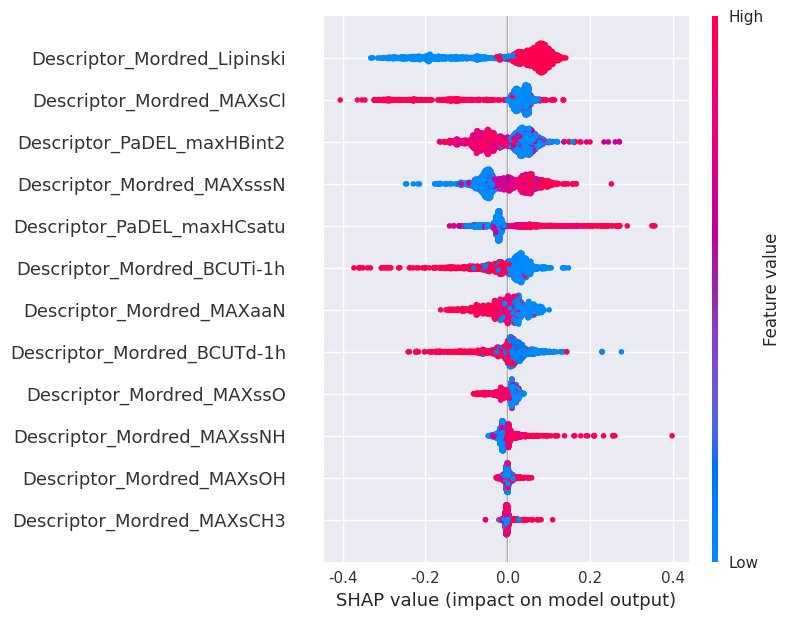

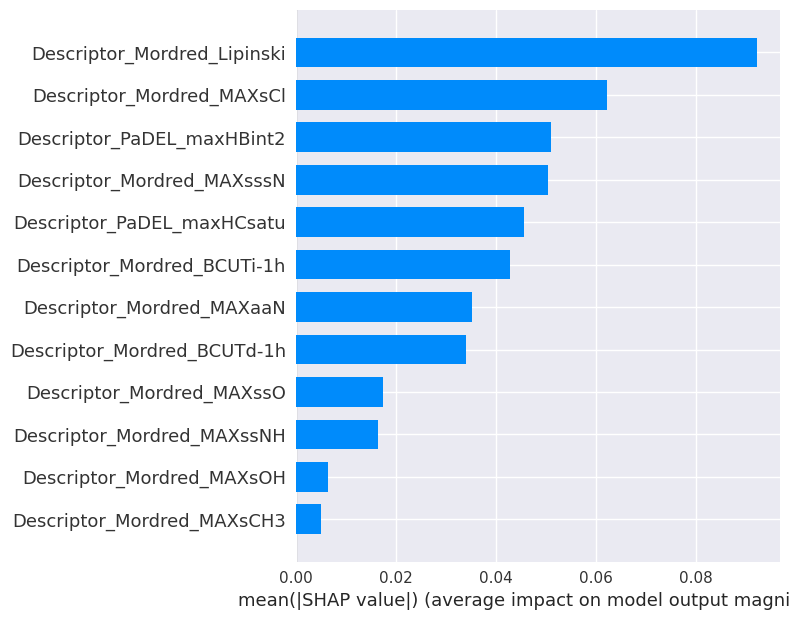

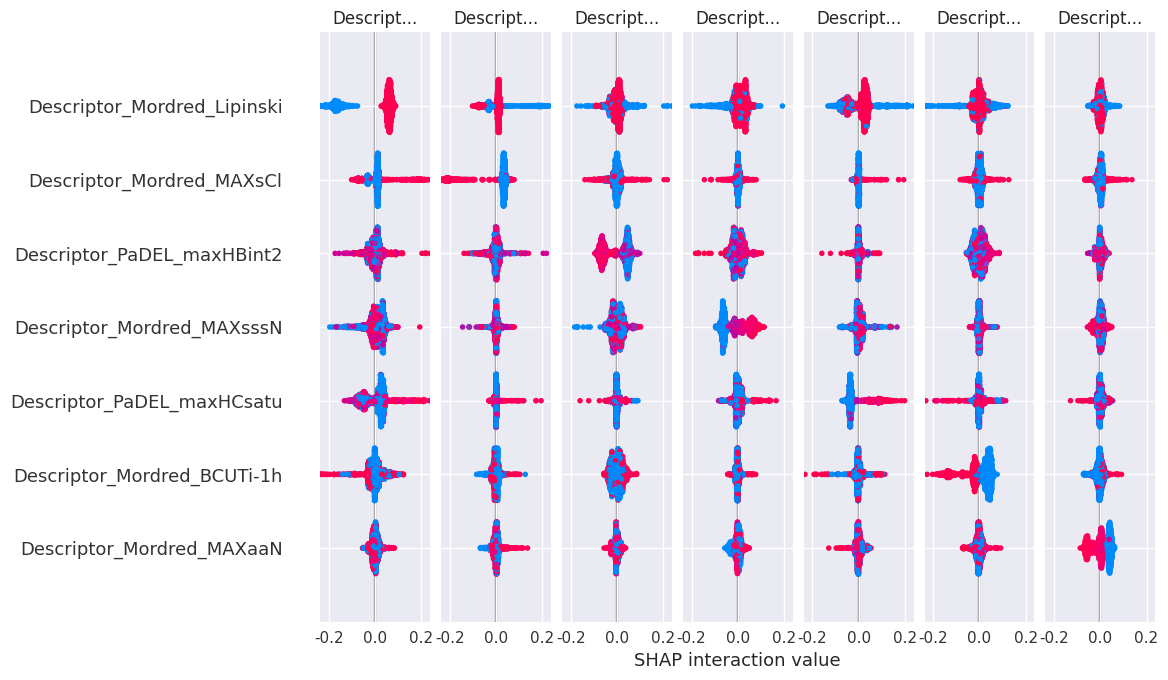

type: Could not find feature named: Descriptor_PaDEL_CrippenLogP

In [10]:
import shap
import xgboost

shap.initjs()  # notebook环境下，加载用于可视化的JS代码
X,y = dataset.X,dataset.y
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

#--------Explainer---------
#在SHAP中进行模型解释需要先创建一个explainer，SHAP支持很多类型的explainer(例如deep, gradient, kernel, linear, tree, sampling)
explainer = shap.TreeExplainer(model)
X=dataset.X
shap_values = explainer.shap_values(X)  # 传入特征矩阵X，计算SHAP值


#---------Local Interper---------
#Local可解释性提供了预测的细节，侧重于解释单个预测是如何生成的。它可以帮助决策者信任模型，并且解释各个特征是如何影响模型单次的决策。

#可视化单个prediction的解释   如果不想用JS,传入matplotlib=True
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

#基本值(base_value)是我们传入数据集上模型预测值的均值，可以通过自己计算来验证：y_base = explainer.expected_value
y_base = explainer.expected_value
pred = model.predict(xgboost.DMatrix(X))
print(y_base == pred.mean())

#对多个样本进行可视化解释
shap.force_plot(explainer.expected_value, shap_values, X)


#--------Global Interper------------
#Global可解释性：寻求理解模型的overall structure(总体结构)。

#summary plot为每个样本绘制其每个特征的SHAP值。
shap.summary_plot(shap_values, X)

#---------Feature Importance-----------
shap.summary_plot(shap_values, X, plot_type="bar")

#-----------interaction value---------------
shap_interaction_values = explainer.shap_interaction_values(X)
shap.summary_plot(shap_interaction_values, X)

#-------------dependence_plot----------------
shap.dependence_plot("Descriptor_PaDEL_CrippenLogP", shap_values, X)

# https://zhuanlan.zhihu.com/p/64799119
cols=["Descriptor_PaDEL_CrippenLogP"]
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(data[cols])
shap.summary_plot(shap_interaction_values, data[cols], max_display=4)

#描绘两个变量交互下变量对目标值的影响
shap.dependence_plot('potential', shap_values, data[cols], interaction_index='international_reputation', show=False)




In [59]:
importances = model.model.get_booster().get_score(importance_type='gain')

# 将Cover重要性值保存为dataframe
df = pd.DataFrame({'feature_name': list(importances.keys()), 'importance': list(importances.values())})
df = df.sort_values('importance', ascending=False)
df

,feature_name,importance
138,f142,15.076212
85,f89,7.315628
63,f65,4.375074
77,f79,4.156306
6,f8,3.819637
...,...,...
7,f9,0.243475
73,f75,0.174786
75,f77,0.168543
67,f69,0.150210


In [54]:
len(importances)

153

In [61]:
importances = model.model.get_booster().get_score(importance_type='cover')

df = pd.DataFrame({'feature_name': list(importances.keys()), 'importance': list(importances.values())})
df = df.sort_values('importance', ascending=False)
df

,feature_name,importance
138,f142,1060.086914
6,f8,536.200012
143,f147,405.882355
85,f89,396.000000
63,f65,394.055542
...,...,...
67,f69,23.000000
100,f104,21.250000
95,f99,20.600000
18,f20,20.600000


In [60]:
importances = model.model.get_booster().get_score(importance_type='weight')

# 将Cover重要性值保存为dataframe
df = pd.DataFrame({'feature_name': list(importances.keys()), 'importance': list(importances.values())})
df = df.sort_values('importance', ascending=False)
df

,feature_name,importance
0,f0,62.0
7,f9,48.0
4,f4,45.0
11,f13,45.0
38,f40,45.0
...,...,...
96,f100,2.0
150,f154,2.0
67,f69,2.0
145,f149,1.0


In [58]:
importances.keys()


dict_keys(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f83', 'f84', 'f85', 'f86', 'f87', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140

In [47]:

print(df_feature.head(30))

                                feature_name  importance  feature_source  \
142               Descriptor_PaDEL_maxHBint2    0.082842           PaDEL   
89                   Descriptor_PaDEL_AATS5s    0.040198           PaDEL   
65              Descriptor_Mordred_ETA_dBeta    0.024040         Mordred   
79                   Descriptor_PaDEL_AATS2v    0.022838           PaDEL   
8    Descriptor_FingerprintSet_MorganFP_1064    0.020988  FingerprintSet   
147          Descriptor_PaDEL_ETA_dEpsilon_B    0.020102           PaDEL   
80                   Descriptor_PaDEL_AATS3v    0.019135           PaDEL   
60             Descriptor_Mordred_AETA_eta_R    0.018106         Mordred   
136                  Descriptor_PaDEL_nsssCH    0.014758           PaDEL   
143                 Descriptor_PaDEL_maxHsOH    0.013985           PaDEL   
146                  Descriptor_PaDEL_MAXDN2    0.013861           PaDEL   
154                 Descriptor_PaDEL_MDEO-11    0.011944           PaDEL   
58          

In [38]:
import shap
# model是在第1节中训练的模型
explainer = shap.TreeExplainer(model.model)
shap_values = explainer.shap_values(data[cols])
print(shap_values.shape)
j = 30
player_explainer = pd.DataFrame()
player_explainer['feature'] = cols
player_explainer['feature_value'] = data[cols].iloc[j].values
player_explainer['shap_value'] = shap_values[j]
player_explainer
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[j], data[cols].iloc[j])
shap.summary_plot(shap_values, data[cols])
shap.summary_plot(shap_values, data[cols], plot_type="bar")
shap.dependence_plot('age', shap_values, data[cols], interaction_index=None, show=False)

shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(data[cols])
shap.summary_plot(shap_interaction_values, data[cols], max_display=4)

shap.dependence_plot('potential', shap_values, data[cols], interaction_index='international_reputation', show=False)



NameError: name 'data' is not defined

[0.00428992 0.00750599 0.00298878 0.00443031 0.00290508 0.00642245
 0.         0.         0.02098837 0.00133786 0.00188528 0.00342244
 0.00232776 0.00534216 0.0036293  0.00274695 0.0045719  0.00416797
 0.00195635 0.00606907 0.00201375 0.00179964 0.00340528 0.00508064
 0.00387526 0.00565584 0.00568774 0.00358154 0.00368044 0.00256588
 0.00825174 0.00761706 0.00359694 0.00267069 0.002903   0.00496762
 0.00790278 0.00414849 0.00443143 0.00551294 0.00382853 0.00525864
 0.00739572 0.00505385 0.01035781 0.00607893 0.00425641 0.00507114
 0.00453449 0.00286992 0.00395031 0.00308691 0.00612287 0.00354628
 0.00309452 0.00689977 0.0043376  0.00995392 0.01119891 0.00418034
 0.01810649 0.01064985 0.00446061 0.00295554 0.00185179 0.02404041
 0.00631289 0.00339862 0.00853699 0.00082538 0.00582918 0.00242134
 0.00791761 0.00362188 0.00320596 0.00096042 0.00355024 0.00092612
 0.00933356 0.02283831 0.01913535 0.00209217 0.         0.01041003
 0.00766517 0.0087848  0.0035469  0.00565766 0.         0.0401

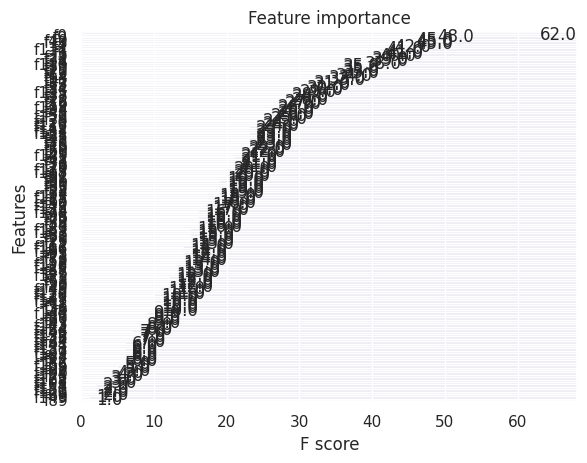

In [34]:
from xgboost import XGBClassifier
from matplotlib import pyplot
 
from xgboost import plot_importance

print(model.model.feature_importances_)
# plot feature importance
 
plot_importance(model.model)
pyplot.show()


In [ ]:
#  ModelName        R2      RMSE  Set
# 0      XGBR  0.187541  0.324978   cv
# 1      XGBR  0.306079  0.322338  ind

## GradientBoostingRegressor

2023-07-14 15:26:04 | interfaces.py | MainProcess | MainThread | interfaces.readParams:80 - INFO -loading model parameters from file: ./models/GBM/GBM_params.json
[I 2023-07-14 15:26:05,022] A new study created in memory with name: no-name-56e948dd-9400-413c-9f05-b4c78d4f3bc0
2023-07-14 15:26:05 | models.py | MainProcess | MainThread | models.__init__:78 - INFO -parameters: None
2023-07-14 15:26:05 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.__init__:71 - WARNING -At the moment n_jobs>1 not available for bayes optimization, n_jobs set to 1.
2023-07-14 15:26:05 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.optimize:90 - INFO -Bayesian optimization can take a while for some hyperparameter combinations
2023-07-14 15:26:05 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.optimize:96 - INFO -Bayesian optimization started: 2023-07-14 15:26:05
2023-07-14 15:26:05 | models.py | MainProces

  ModelName        R2      RMSE       MAE  Set
0       GBM  0.387322  0.556648  0.450178   cv
1       GBM  0.356057  0.575366  0.471628  ind
['SVM', 'XGB', 'GBM']
[[0.2885951050908141, 0.6047547493075813, 0.4702508568725863], [0.41999157810217524, 0.5460570430253283, 0.428767373708061], [0.35605732575423, 0.5753663602796093, 0.47162768670629224]]
[[0.32883853354175185, 0.5826105167180472, 0.45759731771968915], [0.4186578114852908, 0.5422264930658972, 0.4200347934633298], [0.38732218617698067, 0.5566483033531149, 0.45017838314125663]]
  ModelName        R2      RMSE       MAE  Set
0       SVM  0.328839  0.582611  0.457597   cv
1       SVM  0.288595  0.604755  0.470251  ind
0       XGB  0.418658  0.542226  0.420035   cv
1       XGB  0.419992  0.546057  0.428767  ind
0       GBM  0.387322  0.556648  0.450178   cv
1       GBM  0.356057  0.575366  0.471628  ind


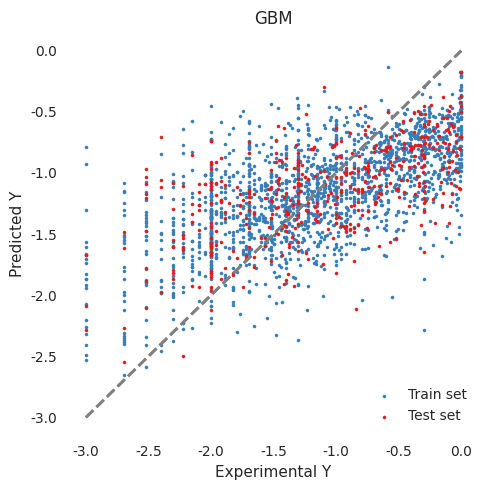

In [9]:
from qsprpred.models.models import QSPRsklearn
from sklearn.cross_decomposition import PLSRegression
 
import numbers
import os
import shutil
from os.path import exists


import numpy as np
import pandas as pd
import torch
from parameterized import parameterized

from qsprpred.models.interfaces import QSPRModel
from qsprpred.models.models import  QSPRsklearn
 
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from torch.utils.data import DataLoader, TensorDataset
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMRegressor
model = QSPRsklearn(base_dir = '.', data=dataset, alg = GradientBoostingRegressor, name='GBM')

# return ['explained_variance', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error',
#             'neg_root_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error',
#             'r2', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'neg_mean_absolute_percentage_error',
#             'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_scor']

# We will first optimize the hyperparameters (n_components and scale) through bayes optimization
# the best hyperparameter combination will be saved in PLS_REG_GABAAalpha_params.json
search_space_bs = {"n_estimators": ["int", 10, 300],
        "max_depth": ["int", 2, 10],
        "min_samples_leaf": ["int", 1, 25],
        "max_features": ["int", 1, 100], 
        "min_samples_split": ["int", 2, 12] }
bayesoptimizer = OptunaOptimization(scoring = model.scoreFunc, param_grid=search_space_bs,
                                    n_trials=20, n_jobs=4)
best_params = bayesoptimizer.optimize(model)

#Then we will evaluate the performance of the best model using the independent test set
_ = model.evaluate()

# Finally, we need to fit the model on the complete dataset if we want to use it further
# model is saved under qsprmodels/PLS_REG_GABAAalpha.pkg
model.fit()
from qsprpred.plotting.regression import CorrelationPlot

plt = CorrelationPlot([model])
axes, summary = plt.make(save=False)
axes[0]
 
print(summary)
if(df_metric.shape[0]==0):
    df_metric=summary
else:
    df_metric=df_metric.append(summary)
model_names.append(summary.iloc[0,0])
print(model_names)
test_metric_results.append(summary.iloc[1,1:4].to_list())
valid_metric_results.append(summary.iloc[0,1:4].to_list())
print(test_metric_results)
print(valid_metric_results)
print(df_metric.head(10))
gbr_model=model

In [16]:
import xgboost as xgb
import pandas as pd
import numpy as np
#特征解释
padel_param_desc_cn={
    "maxHBint2": "最大氢键相互作用能",
    "AATS5s": "平均相对成环原子类型5的局部自由度比值",
    "AATS2v": "平均相对成环原子类型2的绝对电荷",
    "ETA_dEpsilon_B": "电子极化能的平均值与标准差之比",
    "AATS3v": "平均相对成环原子类型3的绝对电荷",
    "nsssCH": "非等效单质子芳香碳原子的数目",
    "maxHsOH": "最大氢键供体原子数目",
    "MAXDN2": "最大氮原子的质子受体数目",
    "MDEO-11": "平均距离等价性数目",
    "SpMin1_Bhe": "最小边界分子表面电荷的一阶矩",
    "AATS1p": "平均相对成环原子类型1的偏极性",
    "ATSC0s": "相对成环原子的零阶Schiultz电荷",
    "nBase": "碱性中心原子的数目",
    "ETA_dBeta": "电荷-电荷相互作用能的平均值与标准差之比",
    "SpMin1_Bhi": "最小边界分子表面电荷的一阶矩",
    "AATS1v": "平均相对成环原子类型1的绝对电荷",
    "maxssO": "最大的单质子硫代氧原子数目",
    "AATS0i": "平均相对成环原子类型0的一阶矩",
    "SpMin7_Bhs": "最小边界分子表面电荷的七阶矩",
    "SpMax2_Bhs": "最大边界分子表面电荷的二阶矩",
    "VE2_Dzv": "二阶电子亲和势的绝对值",
    "ETA_EtaP": "极化率的平均值与标准差之比",
    "AATS2p": "平均相对成环原子类型2的偏极性",
    "AATSC5s": "平均相对成环原子类型5的Schiultz电荷",
    "ETA_dBetaP": "电荷-偏极性相互作用能的平均值与标准差之比",
    "XLogP": "分子的LogP值",
    "VE3_Dzv": "三阶电子亲和势的绝对值",
    "GATS2e": "二阶Geary自相关描述符的平均值",
    "SpMin2_Bhe": "最小边界分子表面电荷的二阶矩",
    "Mi": "分子的相对分子质量",
    "GATS3c": "三阶Geary自相关描述符的平均值",
    "GATS5c": "五阶Geary自相关描述符的平均值",
    "maxHBd": "最大氢键受体原子数目",
    "ATSC1e": "相对成环原子的一阶Schiultz电荷",
    "MATS5e": "五阶Moran自相关描述符的平均值",
    "AATS2i": "平均相对成环原子类型2的一阶矩",
    "MAXDN": "最大氮原子的质子供体数目",
    "ETA_BetaP_ns": "非同构分子的电荷-偏极性相互作用能的平均值与标准差之比",
    "SpMin1_Bhs": "最小边界分子表面电荷的一阶矩",
    "VE2_Dzi": "二阶电子亲和势的平均值",
    "VE1_Dzp": "一阶电子亲和势的正值",
    "GATS7c": "七阶Geary自相关描述符的平均值",
    "MATS3c": "三阶Moran自相关描述符的平均值",
    "minHBa": "最小氢键受体原子数目",
    "ATSC7e": "相对成环原子的七阶Schiultz电荷",
    "VE1_Dzv": "一阶电子亲和势的绝对值",
    "VE3_Dzs": "三阶电子亲和势的正值",
    "GATS2i": "二阶Geary自相关描述符的一阶矩",
    "ATSC6c": "相对成环原子的六阶Schiultz电荷",
    "BCUTc-1l": "Burden聚合度描述符的最后一项",
    "SpMax1_Bhv": "最大边界分子表面电荷的一阶矩",
    "ATSC7c": "相对成环原子的七阶Schiultz电荷",
    "AATSC4c": "平均相对成环原子类型4的Schiultz电荷",
    "ETA_BetaP": "电荷-偏极性相互作用能的平均值与标准差之比",
    "MATS4c": "四阶Moran自相关描述符的平均值",
    "ATSC6e": "相对成环原子的六阶Schiultz电荷",
    "SHBint6": "最小氢键供体原子数目与最大氢键受体原子数目之和的一阶矩",
    "ATSC5s": "相对成环原子的五阶Schiultz电荷",
    "ALogP": "分子的ALogP值",
    "AATS1i": "平均相对成环原子类型1的一阶矩",
    "ATSC6s": "相对成环原子的六阶Schiultz电荷",
    "ATSC4v": "相对成环原子的四阶Schiultz电荷",
    "CrippenLogP": "分子的Crippen LogP值",
    "SHBint2": "最小氢键供体原子数目与最大氢键受体原子数目之和的一阶矩",
    "AATSC1i": "平均相对成环原子类型1的Schiultz电荷",
    "Mv": "分子的相对体积",
    "ATSC3c": "相对成环原子的三阶Schiultz电荷",
    "CIC2": "分子的一级离心矩",
    "SpMax1_Bhe": "最大边界分子表面电荷的一阶矩",
    "ATSC5e": "相对成环原子的五阶Schiultz电荷",
    "minHBint2": "最小氢键供体原子数目与最大氢键受体原子数目之和的一阶矩",
    "ATSC1i": "相对成环原子的一阶Schiultz电荷",
    "GATS1e": "一阶Geary自相关描述符的平均值",
    "SpMax1_Bhi": "最大边界分子表面电荷的一阶矩",
    "AATS4v": "平均相对成环原子类型4的绝对电荷",
    "piPC4": "分子的piPC4值",
    "MATS1i": "一阶Moran自相关描述符的平均值",
    "AATS0v": "平均相对成环原子类型0的绝对电荷",
    "AATSC2s": "平均相对成环原子类型2的Schiultz电荷",
    "AATS4s": "平均相对成环原子类型4的局部自由度比值",
    "AATS5v": "平均相对成环原子类型5的绝对电荷"
}
padel_param_desc={
    "maxHBint2": "Maximum hydrogen bond interaction energy",
    "AATS5s": "Average atomic van der Waals surface area of type 5 substituents",
    "AATS2v": "Average atomic Sanderson electronegativity of type 2 substituents",
    "ETA_dEpsilon_B": "Rescaled dipole moment",
    "AATS3v": "Average atomic Sanderson electronegativity of type 3 substituents",
    "nsssCH": "Number of secondary aliphatic carbon atoms",
    "maxHsOH": "Maximum hydrogen bond donor strength",
    "MAXDN2": "Maximum atomic electronegativity",
    "MDEO-11": "Molecular dipole moment",
    "SpMin1_Bhe": "Smallest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 4 substituents",
    "AATS1p": "Average atomic polarizability of type 1 substituents",
    "ATSC0s": "Average topological charge index of order 0 weighted by atomic Sanderson electronegativity of type 4 substituents",
    "nBase": "Number of nitrogen and oxygen atoms",
    "ETA_dBeta": "Rescaled dipole moment",
    "SpMin1_Bhi": "Smallest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 2 substituents",
    "AATS1v": "Average atomic Sanderson electronegativity of type 1 substituents",
    "maxssO": "Maximum atomic Sanderson electronegativity of type 2 substituents",
    "AATS0i": "Average atomic information content of type 0 substituents",
    "SpMin7_Bhs": "Smallest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 4 substituents",
    "SpMax2_Bhs": "Largest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 4 substituents",
    "VE2_Dzv": "E-state value of atomic van der Waals volume of type 2 substituents",
    "ETA_EtaP": "Rescaled dipole moment",
    "AATS2p": "Average atomic polarizability of type 2 substituents",
    "AATSC5s": "Average atom-type electrotopological state index of order 5 weighted by atomic Sanderson electronegativity of type 4 substituents",
    "ETA_dBetaP": "Rescaled dipole moment",
    "XLogP": "Calculated octanol/water partition coefficient",
    "VE3_Dzv": "E-state value of atomic van der Waals volume of type 3 substituents",
    "GATS2e": "Geary autocorrelation of lag 2 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "SpMin2_Bhe": "Smallest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 4 substituents",
    "Mi": "Molecular refractivity",
    "GATS3c": "Geary autocorrelation of lag 3 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "GATS5c": "Geary autocorrelation of lag 5 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "maxHBd": "Maximum hydrogen bond acceptor strength",
    "ATSC1e": "Average topological charge index of order 1 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "MATS5e": "Moran autocorrelation of lag 5 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "AATS2i": "Average atomic information content of type 2 substituents",
    "MAXDN": "Maximum atomic electronegativity",
    "ETA_BetaP_ns": "Rescaled dipole moment",
    "SpMin1_Bhs": "Smallest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 4 substituents",
    "VE2_Dzi": "E-state value of atomic Sanderson polarizability of type 2 substituents",
    "VE1_Dzp": "E-state value of atomic Sanderson polarizability of type 1 substituents",
    "GATS7c": "Geary autocorrelation of lag 7 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "MATS3c": "Moran autocorrelation of lag 3 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "minHBa": "Minimum hydrogen bond acceptor strength",
    "ATSC7e": "Average topological charge index of order 7 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "VE1_Dzv": "E-state value of atomic van der Waals volume of type 1 substituents",
    "VE3_Dzs": "E-state value of atomic Sanderson polarizability of type 3 substituents",
    "GATS2i": "Geary autocorrelation of lag 2 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "ATSC6c": "Average topological charge index of order 6 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "BCUTc-1l": "Burden eigenvalues weighted by atomic Sanderson electronegativity of type 4 substituents",
    "SpMax1_Bhv": "Largest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 1 substituents",
    "ATSC7c": "Average topological charge index of order 7 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "AATSC4c": "Average atom-type electrotopological state index of order 4 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "ETA_BetaP": "Rescaled dipole moment",
    "MATS4c": "Moran autocorrelation of lag 4 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "ATSC6e": "Average topological charge index of order 6 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "SHBint6": "Sum of hydrogen bond acceptor and donor strengths",
    "ATSC5s": "Average topological charge index of order 5 weighted by atomic Sanderson electronegativity of type 4 substituents",
    "ALogP": "Calculated logarithm of the partition coefficient",
    "AATS1i": "Average atomic information content of type 1 substituents",
    "ATSC6s": "Average topological charge index of order 6 weighted by atomic Sanderson electronegativity of type 4 substituents",
    "ATSC4v": "Average topological charge index of order 4 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "CrippenLogP": "Calculated logarithm of the partition coefficient",
    "SHBint2": "Sum of hydrogen bond acceptor and donor strengths",
    "AATSC1i": "Average atom-type electrotopological state index of order 1 weighted by atomic Sanderson electronegativity of type 1 substituents",
    "Mv": "Molecular volume",
    "ATSC3c": "Average topological charge index of order 3 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "CIC2": "Sum of atomic Sanderson electronegativity of type 2 substituents",
    "SpMax1_Bhe": "Largest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 4 substituents",
    "ATSC5e": "Average topological charge index of order 5 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "minHBint2": "Minimum hydrogen bond interaction energy",
    "ATSC1i": "Average topological charge index of order 1 weighted by atomic Sanderson electronegativity of type 1 substituents",
    "GATS1e": "Geary autocorrelation of lag 1 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "SpMax1_Bhi": "Largest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 2 substituents",
    "AATS4v": "Average atomic Sanderson electronegativity of type 4 substituents",
    "piPC4": "Fourth component of the principal moment of inertia tensor",
    "MATS1i": "Moran autocorrelation of lag 1 weighted by atomic Sanderson electronegativity of type 1 substituents",
    "AATS0v": "Average atomic Sanderson electronegativity of type 0 substituents",
    "AATSC2s": "Average atom-type electrotopological state index of order 2 weighted by atomic Sanderson electronegativity of type 4 substituents",
    "AATS4s": "Average atomic Sanderson electronegativity of type 4 substituents",
    "AATS5v": "Average atomic Sanderson electronegativity of type 5 substituents"
}

# {
#   "maxHBint2": "最大氢键相互作用2",
#   "AATS5s": "原子类型平均距离5s",
#   "AATS2v": "原子类型平均距离2v",
#   "ETA_dEpsilon_B": "电子态密度属性",
#   "AATS3v": "原子类型平均距离3v",
#   "nsssCH": "三重键上的sp^3杂化碳原子数量",
#   "maxHsOH": "最大质子化羟基数量",
#   "MAXDN2": "最大二级氮原子数量",
#   "MDEO-11": "11级分子距离边缘",
#   "SpMin1_Bhe": "最小分子距离1_Bhe",
#   "AATS1p": "原子类型平均距离1p",
#   "ATSC0s": "原子类型距离和0s",
#   "nBase": "碱性氮原子数量",
#   "ETA_dBeta": "贝塔距离属性",
#   "SpMin1_Bhi": "最小分子距离1_Bhi",
#   "AATS1v": "原子类型平均距离1v",
#   "maxssO": "最大双键氧原子数量",
#   "AATS0i": "原子类型平均距离0i",
#   "SpMin7_Bhs": "最小分子距离7_Bhs",
#   "SpMax2_Bhs": "最大分子距离2_Bhs",
#   "VE2_Dzv": "二阶距离电荷指数2_Dzv",
#   "ETA_EtaP": "整体分子极性",
#   "AATS2p": "原子类型平均距离2p",
#   "AATSC5s": "原子类型距离和5s",
#   "ETA_dBetaP": "贝塔距离属性P",
#   "XLogP": "XLogP描述符",
#   "VE3_Dzv": "三阶距离电荷指数3_Dzv",
#   "GATS2e": "几何平均距离2e",
#   "SpMin2_Bhe": "最小分子距离2_Bhe",
#   "Mi": "分子信息",
#   "GATS3c": "几何平均距离3c",
#   "GATS5c": "几何平均距离5c",
#   "maxHBd": "最大氢键供体",
#   "ATSC1e": "原子类型距离和1e",
#   "MATS5e": "平均距离5e",
#   "AATS2i": "原子类型平均距离2i",
#   "MAXDN": "最大氮原子数量",
#   "ETA_BetaP_ns": "非极性贝塔距离属性",
#   "SpMin1_Bhs": "最小分子距离1_Bhs",
#   "VE2_Dzi": "二阶距离电荷指数2_Dzi",
#   "VE1_Dzp": "一阶距离电荷指数1_Dzp",
#   "GATS7c": "几何平均距离7c",
#   "MATS3c": "平均距离3c",
#   "minHBa": "最小氢键受体",
#   "ATSC7e": "原子类型距离和7e",
#   "VE1_Dzv": "一阶距离电荷指数1_Dzv",
#   "VE3_Dzs": "三阶距离电荷指数3_Dzs",
#   "GATS2i": "几何平均距离2i",
#   "ATSC6c": "原子类型距离和6c",
#   "BCUTc-1l": "BCUT描述符-1l",
#   "SpMax1_Bhv": "最大分子距离1_Bhv",
#   "ATSC7c": "原子类型距离和7c",
#   "AATSC4c": "原子类型距离和4c",
#   "ETA_BetaP": "贝塔距离属性",
#   "MATS4c": "平均距离4c",
#   "ATSC6e": "原子类型距离和6e",
#   "SHBint6": "氢键相互作用6",
#   "ATSC5s": "原子类型距离和5s",
#   "ALogP": "ALogP描述符",
#   "AATS1i": "原子类型平均距离1i",
#   "ATSC6s": "原子类型距离和6s",
#   "ATSC4v": "原子类型距离和4v",
#   "CrippenLogP": "CrippenLogP描述符",
#   "SHBint2": "氢键相互作用2",
#   "AATSC1i": "原子类型距离和1i",
#   "Mv": "分子体积",
#   "ATSC3c": "原子类型距离和3c",
#   "CIC2": "连续信息指数2",
#   "SpMax1_Bhe": "最大分子距离1_Bhe",
#   "ATSC5e": "原子类型距离和5e",
#   "minHBint2": "最小氢键相互作用2",
#   "ATSC1i": "原子类型距离和1i",
#   "GATS1e": "几何平均距离1e",
#   "SpMax1_Bhi": "最大分子距离1_Bhi",
#   "AATS4v": "原子类型平均距离4v",
#   "piPC4": "pi电子偏极化4",
#   "MATS1i": "平均距离1i"
# }
# {
#     'AtomCount': '原子数',
#     'BalabanJ': 'Balaban J指数',
#     'BertzCT': 'Bertz CT指数',
#     'Chi0': 'Chi0',
#     'Chi0n': 'Chi0n',
#     'Chi0v': 'Chi0v',
#     'Chi1': 'Chi1',
#     'Chi1n': 'Chi1n',
#     'Chi1v': 'Chi1v',
#     'Chi2n': 'Chi2n',
#     'Chi2v': 'Chi2v',
#     'Chi3n': 'Chi3n',
#     'Chi3v': 'Chi3v',
#     'Chi4n': 'Chi4n',
#     'Chi4v': 'Chi4v',
#     'EState_VSA1': 'EState_VSA1',
#     'EState_VSA10': 'EState_VSA10',
#     'EState_VSA11': 'EState_VSA11',
#     'EState_VSA2': 'EState_VSA2',
#     'EState_VSA3': 'EState_VSA3',
#     'EState_VSA4': 'EState_VSA4',
#     'EState_VSA5': 'EState_VSA5',
#     'EState_VSA6': 'EState_VSA6',
#     'EState_VSA7': 'EState_VSA7',
#     'EState_VSA8': 'EState_VSA8',
#     'EState_VSA9': 'EState_VSA9',
#     'ExactMolWt': '分子量',
#     'FpDensityMorgan1': 'FpDensityMorgan1',
#     'FpDensityMorgan2': 'FpDensityMorgan2',
#     'FpDensityMorgan3': 'FpDensityMorgan3',
#     'HeavyAtomCount': '重原子数',
#     'Ipc': 'Ipc',
#     'Kappa1': 'Kappa1',
#     'Kappa2': 'Kappa2',
#     'Kappa3': 'Kappa3',
#     'LabuteASA': 'LabuteASA',
#     'MaxAbsEStateIndex': 'MaxAbsEStateIndex',
#     'MaxEStateIndex': 'MaxEStateIndex',
#     'MinAbsEStateIndex': 'MinAbsEStateIndex',
#     'MinEStateIndex': 'MinEStateIndex',
#     'MolLogP': 'MolLogP',
#     'MolMR': 'MolMR',
#     'MolSurfaceArea': 'MolSurfaceArea',
#     'NumAliphaticCarbocycles': 'AliphaticCarbocycles数',
#     'NumAliphaticHeterocycles': 'AliphaticHeterocycles数',
#     'NumAliphaticRings': 'Aliphatic环数',
#     'NumAromaticCarbocycles': 'AromaticCarbocycles数',
#     'NumAromaticHeterocycles': 'AromaticHeterocycles数',
#     'NumAromaticRings': 'Aromatic环数',
#     'NumHAcceptors': '氢键受体数',
#     'NumHDonors': '氢键供体数',
#     'NumHeteroatoms': '杂原子数',
#     'NumRotatableBonds': '可旋转键数',
#     'NumSaturatedCarbocycles': 'SaturatedCarbocycles数',
#     'NumSaturatedHeterocycles': 'SaturatedHeterocycles数',
#     'NumSaturatedRings': 'Saturated环数',
#     'PEOE_VSA1': 'PEOE_VSA1',
#     'PEOE_VSA10': 'PEOE_VSA10',
#     'PEOE_VSA11': 'PEOE_VSA11',
#     'PEOE_VSA12': 'PEOE_VSA12',
#     'PEOE_VSA13': 'PEOE_VSA13',
#     'PEOE_VSA14': 'PEOE_VSA14',
#     'PEOE_VSA2': 'PEOE_VSA2',
#     'PEOE_VSA3': 'PEOE_VSA3',
#     'PEOE_VSA4': 'PEOE_VSA4',
#     'PEOE_VSA5': 'PEOE_VSA5',
#     'PEOE_VSA6': 'PEOE_VSA6',
#     'PEOE_VSA7': 'PEOE_VSA7',
#     'PEOE_VSA8': 'PEOE_VSA8',
#     'PEOE_VSA9': 'PEOE_VSA9',
#     'RingCount': '环数',
#     'SMR_VSA1': 'SMR_VSA1',
#     'SMR_VSA10': 'SMR_VSA10',
#     'SMR_VSA2': 'SMR_VSA2',
#     'SMR_VSA3': 'SMR_VSA3',
#     'SMR_VSA4': 'SMR_VSA4',
#     'SMR_VSA5': 'SMR_VSA5',
#     'SMR_VSA6': 'SMR_VSA6',
#     'SMR_VSA7': 'SMR_VSA7',
#     'SMR_VSA8': 'SMR_VSA8',
#     'SMR_VSA9': 'SMR_VSA9',
#     'SlogP_VSA1': 'SlogP_VSA1',
#     'SlogP_VSA10': 'SlogP_VSA10',
#     'SlogP_VSA11': 'SlogP_VSA11',
#     'SlogP_VSA12': 'SlogP_VSA12',
#     'SlogP_VSA2': 'SlogP_VSA2',
#     'SlogP_VSA3': 'SlogP_VSA3',
#     'SlogP_VSA4': 'SlogP_VSA4',
#     'SlogP_VSA5': 'SlogP_VSA5',
#     'SlogP_VSA6': 'SlogP_VSA6',
#     'SlogP_VSA7': 'SlogP_VSA7',
#     'SlogP_VSA8': 'SlogP_VSA8',
#     'SlogP_VSA9': 'SlogP_VSA9',
#     'TPSA': 'TPSA',
#     'VSA_EState1': 'VSA_EState1',
#     'VSA_EState10': 'VSA_EState10',
#     'VSA_EState2': 'VSA_EState2',
#     'VSA_EState3': 'VSA_EState3',
#     'VSA_EState4': 'VSA_EState4',
#     'VSA_EState5': 'VSA_EState5',
#     'VSA_EState6': 'VSA_EState6',
#     'VSA_EState7': 'VSA_EState7',
#     'VSA_EState8': 'VSA_EState8',
#     'VSA_EState9': 'VSA_EState9',
#     'fr_Al_COO': 'fr_Al_COO',
#     'fr_Al_OH': 'fr_Al_OH',
#     'fr_Al_OH_noTert': 'fr_Al_OH_noTert',
#     'fr_ArN': 'fr_ArN',
#     'fr_Ar_COO': 'fr_Ar_COO',
#     'fr_Ar_N': 'fr_Ar_N',
#     'fr_Ar_NH': 'fr_Ar_NH',
#     'fr_Ar_OH': 'fr_Ar_OH',
#     'fr_COO': 'fr_COO',
#     'fr_COO2': 'fr_COO2',
#     'fr_C_O': 'fr_C_O',
#     'fr_C_O_noCOO': 'fr_C_O_noCOO',
#     'fr_C_S': 'fr_C_S',
#     'fr_HOCCN': 'fr_HOCCN',
#     'fr_Imine': 'fr_Imine',
#     'fr_NH0': 'fr_NH0',
#     'fr_NH1': 'fr_NH1',
#     'fr_NH2': 'fr_NH2',
#     'fr_N_O': 'fr_N_O',
#     'fr_Ndealkylation1': 'fr_Ndealkylation1',
#     'fr_Ndealkylation2': 'fr_Ndealkylation2',
#     'fr_Nhpyrrole': 'fr_Nhpyrrole',
#     'fr_SH': 'fr_SH',
#     'fr_aldehyde': 'fr_aldehyde',
#     'fr_alkyl_carbamate': 'fr_alkyl_carbamate',
#     'fr_alkyl_halide': 'fr_alkyl_halide',
#     'fr_allylic_oxid': 'fr_allylic_oxid',
#     'fr_amide': 'fr_amide',
#     'fr_amidine': 'fr_amidine',
#     'fr_aniline': 'fr_aniline',
#     'fr_aryl_methyl': 'fr_aryl_methyl',
#     'fr_azide': 'fr_azide',
#     'fr_azo': 'fr_azo',
#     'fr_barbitur': 'fr_barbitur',
#     'fr_benzene': 'fr_benzene',
#     'fr_benzodiazepine': 'fr_benzodiazepine',
#     'fr_bicyclic': 'fr_bicyclic',
#     'fr_diazo': 'fr_diazo',
#     'fr_dihydropyridine': 'fr_dihydropyridine',
#     'fr_epoxide': 'fr_epoxide',
#     'fr_ester': 'fr_ester',
#     'fr_ether': 'fr_ether',
#     'fr_furan': 'fr_furan',
#     'fr_guanido': 'fr_guanido',
#     'fr_halogen': 'fr_halogen',
#     'fr_hdrzine': 'fr_hdrzine',
#     'fr_hdrzone': 'fr_hdrzone',
#     'fr_imidazole': 'fr_imidazole',
#     'fr_imide': 'fr_imide',
#     'fr_isocyan': 'fr_isocyan',
#     'fr_isothiocyan': 'fr_isothiocyan',
#     'fr_ketone': 'fr_ketone',
#     'fr_ketone_Topliss': 'fr_ketone_Topliss',
#     'fr_lactam': 'fr_lactam',
#     'fr_lactone': 'fr_lactone',
#     'fr_methoxy': 'fr_methoxy',
#     'fr_morpholine': 'fr_morpholine',
#     'fr_nitrile': 'fr_nitrile',
#     'fr_nitro': 'fr_nitro',
#     'fr_nitro_arom': 'fr_nitro_arom',
#     'fr_nitro_arom_nonortho': 'fr_nitro_arom_nonortho',
#     'fr_nitroso': 'fr_nitroso',
#     'fr_oxazole': 'fr_oxazole',
#     'fr_oxime': 'fr_oxime',
#     'fr_para_hydroxylation': 'fr_para_hydroxylation',
#     'fr_phenol': 'fr_phenol',
#     'fr_phenol_noOrthoHbond': 'fr_phenol_noOrthoHbond',
#     'fr_phos_acid': 'fr_phos_acid',
#     'fr_phos_ester': 'fr_phos_ester',
#     'fr_piperdine': 'fr_piperdine',
#     'fr_piperzine': 'fr_piperzine',
#     'fr_priamide': 'fr_priamide',
#     'fr_prisulfonamd': 'fr_prisulfonamd',
#     'fr_pyridine': 'fr_pyridine',
#     'fr_quatN': 'fr_quatN',
#     'fr_sulfide': 'fr_sulfide',
#     'fr_sulfonamd': 'fr_sulfonamd',
#     'fr_sulfone': 'fr_sulfone',
#     'fr_term_acetylene': 'fr_term_acetylene',
#     'fr_tetrazole': 'fr_tetrazole',
#     'fr_thiazole': 'fr_thiazole',
#     'fr_thiocyan': 'fr_thiocyan',
#     'fr_thiophene': 'fr_thiophene',
#     'fr_unbrch_alkane': 'fr_unbrch_alkane',
#     'fr_urea': 'fr_urea',
#        "n_atoms": "分子中原子的数量",
#     "n_bonds": "分子中键的数量",
#     "n_rings": "分子中环的数量",
#     "n_aromatic_rings": "分子中芳香环的数量",
#     "n_aromatic_atoms": "分子中芳香原子的数量",
#     "n_rotatable_bonds": "分子中可旋转键的数量",
#     "n_HBA": "氢键受体原子的数量",
#     "n_HBD": "氢键供体原子的数量",
#     "n_hetero_atoms": "杂质原子的数量",
#     "n_heavy_atoms": "重原子的数量",
#     "n_amide_bonds": "酰胺键的数量",
#     "n_esters": "酯的数量",
#     "n_carbonyl_groups": "羰基的数量",
#     "n_sulfonamides": "磺酰胺的数量",
#     "n_phosphonates": "磷酸酯的数量",
#     "n_halides": "卤素的数量",
#     "n_cyano_groups": "氰基的数量",
#     "n_nitro_groups": "硝基的数量",
#     "n_alkyl_halides": "卤代烷基的数量",
#     "n_alkyl_nitrates": "硝酸烷基的数量",
#     "n_alkyl_cyanides": "氰代烷基的数量",
#     "n_alkyl_esters": "酯代烷基的数量",
#     "n_alkyl_amides": "酰胺代烷基的数量",
#     "n_alkyl_phosphonates": "磷酸酯代烷基的数量",
#     "n_alkyl_sulfonamides": "磺酰胺代烷基的数量",
#     "n_aliphatic_rings": "脂环的数量",
#     "n_saturated_rings": "饱和环的数量",
#     "n_unsaturated_rings": "不饱和环的数量",
#     "n_atoms_stereo_centers": "原子立体中心的数量",
#     "n_atoms_unspecified_stereo_centers": "未指定原子立体中心的数量",
#     "n_bonds_stereo_centers": "键立体中心的数量",
#     "n_bonds_unspecified_stereo_centers": "未指定键立体中心的数量",
#     "molecular_weight": "分子量",
#     "XLogP": "分子的XLogP值，表示分子的疏水性",
#     "topological_polar_surface_area": "拓扑极性表面积",
#     "complexity": "分子的复杂性",
#     "formal_charge": "分子的正式电荷"
# }
mordred_param_desc_cn={
    "ETA_dBeta": "中心原子与其两个相邻原子的电负性差值",
    "AETA_eta_R": "中心原子的共振电荷",
    "AETA_beta_ns": "与中心原子相邻的非氢原子数目",
    "ETA_eta_B": "中心原子的键级",
    "BCUTp-1l": "长度为1的路径1的BCUT描述符",
    "AETA_beta": "与中心原子相邻的原子数目",
    "MDEO-12": "距离加权离心率指数的第12个矩",
    "GATS1s": "一阶图/电荷加权自相关描述符，以Sanderson电负性加权",
    "mZagreb1": "第一个修改的Zagreb指数",
    "GATS5are": "第五阶图/电荷加权自相关描述符，以原子极化率加权",
    "GATS2s": "二阶图/电荷加权自相关描述符，以Sanderson电负性加权",
    "BCUTs-1h": "高度为1的阴影1的BCUT描述符",
    "MINdssC": "分子中两个原子之间的最小距离",
    "AETA_dBeta": "中心原子与其两个相邻原子的电负性差值",
    "MAXaasC": "中心原子的最大原子表面积",
    "BCUTi-1h": "高度为1的信息阴影1的BCUT描述符",
    "ATSC2s": "以2为滞后的第二个原子中心对称性描述符",
    "AMID_h": "分子的原子质量的调和平均数",
    "MATS5dv": "距离加权平均拓扑电荷指数的第5个矩",
    "AATSC5s": "以5为滞后的第五个原子中心对称性描述符",
    "BCUTdv-1h": "高度为1的距离向量1的BCUT描述符",
    "AATS4s": "以Sanderson电负性原子类型为基础的第四个原子类型E-state描述符",
    "BCUTd-1l": "长度为1的距离1的BCUT描述符",
    "AATSC2s": "以Sanderson电负性原子类型为基础的第二个原子类型E-state描述符",
    "AXp-0dv": "以范德华体积为基础的第零个原子中心距离加权描述符",
    "BCUTse-1h": "高度为1的阴影边缘1的BCUT描述符",
    "GATS5pe": "以Petitjean形状指数加权的第五阶图/电荷加权自相关描述符",
    "AATS5pe": "以Petitjean极化率原子类型为基础的第五个原子类型E-state描述符",
    "AXp-5dv": "以范德华体积为基础的第五个原子中心距离加权描述符",
    "AETA_eta_BR": "以键级加权的中心原子共振电荷",
    "BCUTc-1l": "长度为1的电荷1的BCUT描述符",
    "ETA_shape_y": "中心原子的形状指数",
    "Xp-0dv": "以Sanderson电负性为基础的第零个原子中心距离加权描述符",
    "AETA_eta": "以与中心原子相邻的原子数目加权的中心原子共振电荷",
    "AATS5i": "以I-state为基础的第五个原子类型E-state描述符",
    "GATS6are": "以原子极化率加权的第六阶图/电荷加权自相关描述符",
    "MAXsCH3": "甲基基团的最大原子表面积",
    "AATSC4s": "以4为滞后的第四个原子中心对称性描述符",
    "BCUTdv-1l": "长度为1的距离向量1的BCUT描述符",
    "GATS5c": "以碳类型加权的第五阶图/电荷加权自相关描述符",
    "AATS5s": "以Sanderson电负性原子类型为基础的第五个原子类型E-state描述符",
    "GATS4s": "以Sanderson电负性加权的第四阶图/电荷加权自相关描述符",
    "MATS5se": "以Sanderson电负性加权的距离加权平均拓扑电荷指数的第5个矩",
    "MAXssO": "氧原子的最大原子表面积",
    "VE3_A": "第三阶价键连接性指数",
    "AATSC5dv": "以距离向量为基础的第五个原子中心对称性描述符",
    "MDEO-11": "距离加权离心率指数的第11个矩",
    "MINaaCH": "碳-氢键的最小原子对齐指数",
    "MAXaaCH": "碳-氢键的最大原子对齐指数",
    "ETA_epsilon_5": "电子拓扑状态指数的第5个矩",
    "GATS6s": "以Sanderson电负性加权的第六阶图/电荷加权自相关描述符",
    "AXp-6dv": "以范德华体积为基础的第六个原子中心距离加权描述符",
    "AATS5v": "以V-state为基础的第五个原子类型E-state描述符",
    "GATS5s": "以Sanderson电负性加权的第五阶图/电荷加权自相关描述符",
    "GATS6dv": "以范德华体积加权的第六阶图/电荷加权自相关描述符",
    "AMID_O": "分子中氧原子的原子质量的调和平均数",
    "AATS5d": "以Sanderson偶极矩为基础的第五个原子类型E-state描述符",
    "ATSC3s": "以3为滞后的第三个原子中心对称性描述符",
    "ATSC0s": "以0为滞后的第零个原子中心对称性描述符",
    "VE1_A": "第一阶价键连接性指数",
    "ETA_dEpsilon_B": "中心原子与其两个相邻原子的极化率差值",
    "ATSC5s": "以5为滞后的第五个原子中心对称性描述符",
    "SpMAD_A": "分子的原子质量与分子平均原子质量之差的绝对值之和",
    "MDEO-22": "距离加权离心率指数的第22个矩"
}
mordred_param_desc={
"ETA_dBeta": "The difference between the atomic electronegativity of the two atoms bonded to the central atom",
"AETA_eta_R": "The resonance charge of the central atom",
"AETA_beta_ns": "The number of non-hydrogen atoms bonded to the central atom",
"ETA_eta_B": "The bond order of the central atom",
"BCUTp-1l": "The BCUT descriptor for path 1 of length 1",
"AETA_beta": "The number of atoms bonded to the central atom",
"MDEO-12": "The 12th moment of the distance-weighted eccentricity index",
"GATS1s": "The 1st graph/charge weighted autocorrelation descriptor for lag 1, weighted by Sanderson electronegativities",
"mZagreb1": "The first modified Zagreb index",
"GATS5are": "The 5th graph/charge weighted autocorrelation descriptor for lag 5, weighted by atomic polarizabilities",
"GATS2s": "The 2nd graph/charge weighted autocorrelation descriptor for lag 2, weighted by Sanderson electronegativities",
"BCUTs-1h": "The BCUT descriptor for shadow 1 of height 1",
"MINdssC": "The minimum distance between two atoms in the molecule",
"AETA_dBeta": "The difference between the atomic electronegativity of the two atoms bonded to the central atom",
"MAXaasC": "The maximum atomic surface area of the central atom",
"BCUTi-1h": "The BCUT descriptor for information shadow 1 of height 1",
"ATSC2s": "The 2nd atom-centered symmetry descriptor for lag 2",
"AMID_h": "The harmonic mean of the atomic masses of the molecule",
"MATS5dv": "The 5th moment of the distance-weighted mean topological charge index",
"AATSC5s": "The 5th atom-centered symmetry descriptor for lag 5",
"BCUTdv-1h": "The BCUT descriptor for distance vector 1 of height 1",
"AATS4s": "The 4th atom-type E-state descriptor for the Sanderson electronegativity atom type",
"BCUTd-1l": "The BCUT descriptor for distance 1 of length 1",
"AATSC2s": "The 2nd atom-type E-state descriptor for the Sanderson electronegativity atom type",
"AXp-0dv": "The 0th atom-centered distance-weighted descriptor for the van der Waals volume",
"BCUTse-1h": "The BCUT descriptor for shadow edge 1 of height 1",
"GATS5pe": "The 5th graph/charge weighted autocorrelation descriptor for lag 5, weighted by Petitjean shape indices",
"AATS5pe": "The 5th atom-type E-state descriptor for the Petitjean polarizability atom type",
"AXp-5dv": "The 5th atom-centered distance-weighted descriptor for the van der Waals volume",
"AETA_eta_BR": "The resonance charge of the central atom weighted by the bond order",
"BCUTc-1l": "The BCUT descriptor for charge 1 of length 1",
"ETA_shape_y": "The shape index of the central atom",
"Xp-0dv": "The 0th atom-centered distance-weighted descriptor for the Sanderson electronegativity",
"AETA_eta": "The resonance charge of the central atom weighted by the number of atoms bonded to it",
"AATS5i": "The 5th atom-type E-state descriptor for the I-state",
"GATS6are": "The 6th graph/charge weighted autocorrelation descriptor for lag 6, weighted by atomic polarizabilities",
"MAXsCH3": "The maximum atomic surface area of the methyl group",
"AATSC4s": "The 4th atom-centered symmetry descriptor for lag 4",
"BCUTdv-1l": "The BCUT descriptor for distance vector 1 of length 1",
"GATS5c": "The 5th graph/charge weighted autocorrelation descriptor for lag 5, weighted by carbon types",
"AATS5s": "The 5th atom-type E-state descriptor for the Sanderson electronegativity atom type",
"GATS4s": "The 4th graph/charge weighted autocorrelation descriptor for lag 4, weighted by Sanderson electronegativities",
"MATS5se": "The 5th moment of the distance-weighted mean topological charge index, weighted by Sanderson electronegativities",
"MAXssO": "The maximum atomic surface area of the oxygen atom",
"VE3_A": "The third order valence connectivity index",
"AATSC5dv": "The 5th atom-centered symmetry descriptor for the distance vector",
"MDEO-11": "The 11th moment of the distance-weighted eccentricity index",
"MINaaCH": "The minimum atomic alignment index for carbon-hydrogen bonds",
"MAXaaCH": "The maximum atomic alignment index for carbon-hydrogen bonds",
"ETA_epsilon_5": "The 5th moment of the electrotopological state index",
"GATS6s": "The 6th graph/charge weighted autocorrelation descriptor for lag 6, weighted by Sanderson electronegativities",
"AXp-6dv": "The 6th atom-centered distance-weighted descriptor for the van der Waals volume",
"AATS5v": "The 5th atom-type E-state descriptor for the V-state",
"GATS5s": "The 5th graph/charge weighted autocorrelation descriptor for lag 5, weighted by Sanderson electronegativities",
"GATS6dv": "The 6th graph/charge weighted autocorrelation descriptor for lag 6, weighted by van der Waals volumes",
"AMID_O": "The harmonic mean of the atomic masses of the oxygen atoms in the molecule",
"AATS5d": "The 5th atom-type E-state descriptor for the Sanderson dipole moment",
"ATSC3s": "The 3rd atom-centered symmetry descriptor for lag 3",
"ATSC0s": "The 0th atom-centered symmetry descriptor for lag 0",
"VE1_A": "The first order valence connectivity index",
"ETA_dEpsilon_B": "The difference between the atomic polarizability of the two atoms bonded to the central atom",
"ATSC5s": "The 5th atom-centered symmetry descriptor for lag 5",
"SpMAD_A": "The sum of absolute differences between the atomic masses of the molecule and the average atomic mass of the molecule",
"MDEO-22": "The 22nd moment of the distance-weighted eccentricity index"
}
# {
#     "MolecularWeight": "分子量，表示分子中所有原子质量之和",
#     "ChemicalFormula": "化学式，表示分子中各种原子的数量和种类",
#     "NumBonds": "键数，表示分子中化学键的数量",
#     "NumRings": "环数，表示分子中环状结构的数量",
#     "NumAtoms": "原子数，表示分子中原子的数量",
#     "ElectronAffinity": "电子亲和能，表示分子吸收一个电子的能力",
#     "IonizationEnergy": "离子化能，表示从分子中移除一个电子所需的能量",
#     "Polarizability": "极化率，表示分子对电场的响应程度",
#     "Chirality": "手性中心数量，表示分子中手性中心的数量",
#     "WienerIndex": "Wiener指数，表示分子图中所有原子对之间距离的总和",
#     "BalabanIndex": "Balaban指数，表示分子拓扑结构的复杂程度",
#     "ZagrebIndex": "Zagreb指数，表示分子图的拓扑描述符",
#     "MolecularVolume": "分子体积，表示分子所占据的空间大小",
#     "SurfaceArea": "表面积，表示分子表面的总面积",
#     "ShapeIndex": "形状指数，表示分子形状的度量",
#     "Eccentricity": "离心率，表示分子形状的离心程度",
#     "PartialCharges": "部分原子电荷，表示分子中各个原子的电荷分布",
#     "DipoleMoment": "总偶极矩，表示分子的电荷分布不均匀程度",
#     "AverageChargePolarizability": "平均电荷极化率，表示分子对电场的平均响应程度",
#     "MolecularHydrophobicity": "分子疏水性，表示分子整体的疏水性",
#     "SurfaceHydrophobicity": "分子表面疏水性，表示分子表面的疏水性",
#     "AtomHydrophobicity": "原子疏水性，表示分子中各个原子的疏水性",
#     "MACCSKeys": "MACCS键，表示分子的二进制指纹，用于分子相似性和聚类",
#     "MorganFingerprint": "Morgan指纹，表示分子的二进制指纹，用于分子相似性和聚类",
#     "RDKitFingerprint": "RDKit指纹，表示分子的二进制指纹，用于分子相似性和聚类",
#     "DrugSimilarity": "药物相似性，表示分子与已知药物的相似程度",
#     "DrugRuleCompliance": "药物规则符合性，表示分子是否符合药物的一般性质",
#     "DrugTargetPrediction": "药物靶点预测，表示分子可能作用的生物靶点"
# }
rdkit_param_desc={}
mold2_param_desc={}
fingerprintset_param_desc={}
rdkit_param_desc_cn={}
mold2_param_desc_cn={}
fingerprintset_param_desc_cn={}

feature_type_dict={"PaDEL":padel_param_desc,
"Mordred":mordred_param_desc,
"RDkit":rdkit_param_desc,
"FingerprintSet":fingerprintset_param_desc,
"Mold2":mold2_param_desc}
feature_type_dict_cn={"PaDEL":padel_param_desc_cn,
"Mordred":mordred_param_desc_cn,
"RDkit":rdkit_param_desc_cn,
"FingerprintSet":fingerprintset_param_desc_cn,
"Mold2":mold2_param_desc_cn}
def get_feature_desc(df,feature_type):
    df.loc[df.feature_source==feature_type,'feature_desc']=df.loc[df.feature_source==feature_type,'feature_short_name'].apply(lambda x:feature_type_dict[feature_type][x] if x in feature_type_dict[feature_type].keys() else "--")
    df.loc[df.feature_source==feature_type,'feature_desc_cn']=df.loc[df.feature_source==feature_type,'feature_short_name'].apply(lambda x:feature_type_dict_cn[feature_type][x] if x in feature_type_dict[feature_type].keys() else "--")
    return df
feature_type_list=["PaDEL","Mordred","RDkit","FingerprintSet","Mold2"]
def get_all_desc(df,feature_type_list):
    df["feature_source"]=df['feature_name'].apply(lambda x: split_descriptor(x,1))

    df["feature_short_name"]=df['feature_name'].apply(lambda x: split_descriptor(x,2))
    df["feature_full_name"]=df['feature_name'].apply(lambda x: x.replace('Descriptor_', ''))
    df_result=df
    for ft in feature_type_list:
        df_result=get_feature_desc(df_result,ft)
        # print(df_result)
    return df_result
# df_result=get_all_desc(df_feature,feature_type_list)
# df_result
writer = pd.ExcelWriter("data/feature_importance_cl_%s.xlsx"%data_str)
import matplotlib.pyplot as plt; plt.style.use('seaborn')
cols=dataset.featureNames
plt.figure(figsize=(15, 5))
plt.bar(range(len(cols)), model.estimator.feature_importances_)
plt.xticks(range(len(cols)), cols, rotation=-45, fontsize=14)
plt.title('Feature importance', fontsize=14)
plt.show()
field_list=dataset.getProperties()
df_all_field= pd.DataFrame({'feature_name': field_list})
df_all_field=get_all_desc(df_all_field,feature_type_list)
df_all_field.to_excel(writer, sheet_name='all_feature')
df_ft_count=df_all_field["feature_source"].value_counts().reset_index().sort_values(by='feature_source', ascending=False)
print(df_ft_count.columns)
df_ft_count=df_ft_count.rename(columns={'index':"feature_source", 'feature_source':"feature_cnt"})
print(df_ft_count.head(10))
df_ft_count.to_excel(writer, sheet_name='all_feature_source_count')
df_feature = pd.DataFrame({'feature_name': dataset.X.columns, 'importance': model.model.feature_importances_})
df_feature = df_feature.sort_values('importance', ascending=False)

now_time = datetime.datetime.now()
data_str = now_time.strftime('%Y_%m_%d_%H')
feature_list=dataset.X.columns
# feature_list=["Descriptor_PaDEL_WTPT","Descriptor_PaDEL_WPATH"	,"Descriptor_RDkit_MaxAbsEStateIndex","Descriptor_Mordred_Mor01v"]

print(df_feature)
def split_descriptor(x,index=0):
    if "Descriptor" in x:
        if index<=1:
            return x.split("_")[index]
        elif index==2:
            return "_".join(x.split("_")[2:])
    else:
        return None


df_feature=get_all_desc(df_feature,feature_type_list)
df_feature.to_csv("data/feature_importance_%s.csv"%data_str)
df_feature.to_excel(writer, sheet_name='feature_importance')
print(df_feature.head(10))
df_ft_count=df_feature["feature_source"].value_counts().reset_index().sort_values(by='feature_source', ascending=False)
print(df_ft_count.columns)
df_ft_count=df_ft_count.rename(columns={'index':"feature_source", 'feature_source':"feature_cnt"})
print(df_ft_count.head(10))
df_ft_count.to_csv("data/feature_source_count_%s.csv"%data_str)

df_ft_count.to_excel(writer, sheet_name='feature_source_count')
print(df_feature.head(10))
feature_method=["weight","gain","cover"]
for fm in feature_method:
    importances = model.model.get_booster().get_score(importance_type=fm)
    # 将Cover重要性值保存为dataframe
    df = pd.DataFrame({'feature': list(importances.keys()), 'importance': list(importances.values())})
    df['feature_index']=df['feature'].apply(lambda x: int(x.replace("f","")))
    df['feature_name']= df['feature_index'].apply(lambda x: dataset.X.columns[x])
    df['importance_type']=fm
    df = df.sort_values('importance', ascending=False)
    print(df.head(10))
    df=get_all_desc(df,feature_type_list)
    df.to_excel(writer, sheet_name='feature_%s'%fm)
writer.save()
logger.info("save at :%s"%"data/feature_importance_%s.xlsx"%data_str)

type: 'STFullyConnected' object has no attribute 'feature_importances_'

<Figure size 1500x500 with 0 Axes>

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
#特征解释
#   "maxHBint2": "最大氢键相互作用2",
#   "AATS5s": "原子类型平均距离5s",
#   "AATS2v": "原子类型平均距离2v",
#   "ETA_dEpsilon_B": "电子态密度属性",
#   "AATS3v": "原子类型平均距离3v",
#   "nsssCH": "三重键上的sp^3杂化碳原子数量",
#   "maxHsOH": "最大质子化羟基数量",
#   "MAXDN2": "最大二级氮原子数量",
#   "MDEO-11": "11级分子距离边缘",
#   "SpMin1_Bhe": "最小分子距离1_Bhe",
#   "AATS1p": "原子类型平均距离1p",

padel_param_desc_cn={
    "maxHBint2": "最大氢键相互作用能",
    "AATS5s": "平均相对成环原子类型5的局部自由度比值",
    "AATS2v": "平均相对成环原子类型2的绝对电荷",
    "ETA_dEpsilon_B": "电子极化能的平均值与标准差之比",
    "AATS3v": "平均相对成环原子类型3的绝对电荷",
    "nsssCH": "非等效单质子芳香碳原子的数目",
    "maxHsOH": "最大氢键供体原子数目",
    "MAXDN2": "最大氮原子的质子受体数目",
    "MDEO-11": "平均距离等价性数目",
    "SpMin1_Bhe": "最小边界分子表面电荷的一阶矩",
    "AATS1p": "平均相对成环原子类型1的偏极性",
    "ATSC0s": "相对成环原子的零阶Schiultz电荷",
    "nBase": "碱性中心原子的数目",
    "ETA_dBeta": "电荷-电荷相互作用能的平均值与标准差之比",
    "SpMin1_Bhi": "最小边界分子表面电荷的一阶矩",
    "AATS1v": "平均相对成环原子类型1的绝对电荷",
    "maxssO": "最大的单质子硫代氧原子数目",
    "AATS0i": "平均相对成环原子类型0的一阶矩",
    "SpMin7_Bhs": "最小边界分子表面电荷的七阶矩",
    "SpMax2_Bhs": "最大边界分子表面电荷的二阶矩",
    "VE2_Dzv": "二阶电子亲和势的绝对值",
    "ETA_EtaP": "极化率的平均值与标准差之比",
    "AATS2p": "平均相对成环原子类型2的偏极性",
    "AATSC5s": "平均相对成环原子类型5的Schiultz电荷",
    "ETA_dBetaP": "电荷-偏极性相互作用能的平均值与标准差之比",
    "XLogP": "分子的LogP值",
    "VE3_Dzv": "三阶电子亲和势的绝对值",
    "GATS2e": "二阶Geary自相关描述符的平均值",
    "SpMin2_Bhe": "最小边界分子表面电荷的二阶矩",
    "Mi": "分子的相对分子质量",
    "GATS3c": "三阶Geary自相关描述符的平均值",
    "GATS5c": "五阶Geary自相关描述符的平均值",
    "maxHBd": "最大氢键受体原子数目",
    "ATSC1e": "相对成环原子的一阶Schiultz电荷",
    "MATS5e": "五阶Moran自相关描述符的平均值",
    "AATS2i": "平均相对成环原子类型2的一阶矩",
    "MAXDN": "最大氮原子的质子供体数目",
    "ETA_BetaP_ns": "非同构分子的电荷-偏极性相互作用能的平均值与标准差之比",
    "SpMin1_Bhs": "最小边界分子表面电荷的一阶矩",
    "VE2_Dzi": "二阶电子亲和势的平均值",
    "VE1_Dzp": "一阶电子亲和势的正值",
    "GATS7c": "七阶Geary自相关描述符的平均值",
    "MATS3c": "三阶Moran自相关描述符的平均值",
    "minHBa": "最小氢键受体原子数目",
    "ATSC7e": "相对成环原子的七阶Schiultz电荷",
    "VE1_Dzv": "一阶电子亲和势的绝对值",
    "VE3_Dzs": "三阶电子亲和势的正值",
    "GATS2i": "二阶Geary自相关描述符的一阶矩",
    "ATSC6c": "相对成环原子的六阶Schiultz电荷",
    "BCUTc-1l": "Burden聚合度描述符的最后一项",
    "SpMax1_Bhv": "最大边界分子表面电荷的一阶矩",
    "ATSC7c": "相对成环原子的七阶Schiultz电荷",
    "AATSC4c": "平均相对成环原子类型4的Schiultz电荷",
    "ETA_BetaP": "电荷-偏极性相互作用能的平均值与标准差之比",
    "MATS4c": "四阶Moran自相关描述符的平均值",
    "ATSC6e": "相对成环原子的六阶Schiultz电荷",
    "SHBint6": "最小氢键供体原子数目与最大氢键受体原子数目之和的一阶矩",
    "ATSC5s": "相对成环原子的五阶Schiultz电荷",
    "ALogP": "分子的ALogP值",
    "AATS1i": "平均相对成环原子类型1的一阶矩",
    "ATSC6s": "相对成环原子的六阶Schiultz电荷",
    "ATSC4v": "相对成环原子的四阶Schiultz电荷",
    "CrippenLogP": "分子的Crippen LogP值",
    "SHBint2": "最小氢键供体原子数目与最大氢键受体原子数目之和的一阶矩",
    "AATSC1i": "平均相对成环原子类型1的Schiultz电荷",
    "Mv": "分子的相对体积",
    "ATSC3c": "相对成环原子的三阶Schiultz电荷",
    "CIC2": "分子的一级离心矩",
    "SpMax1_Bhe": "最大边界分子表面电荷的一阶矩",
    "ATSC5e": "相对成环原子的五阶Schiultz电荷",
    "minHBint2": "最小氢键供体原子数目与最大氢键受体原子数目之和的一阶矩",
    "ATSC1i": "相对成环原子的一阶Schiultz电荷",
    "GATS1e": "一阶Geary自相关描述符的平均值",
    "SpMax1_Bhi": "最大边界分子表面电荷的一阶矩",
    "AATS4v": "平均相对成环原子类型4的绝对电荷",
    "piPC4": "分子的piPC4值",
    "MATS1i": "一阶Moran自相关描述符的平均值",
    "AATS0v": "平均相对成环原子类型0的绝对电荷",
    "AATSC2s": "平均相对成环原子类型2的Schiultz电荷",
    "AATS4s": "平均相对成环原子类型4的局部自由度比值",
    "AATS5v": "平均相对成环原子类型5的绝对电荷"
}
padel_param_desc={
    "maxHBint2": "Maximum hydrogen bond interaction energy",
    "AATS5s": "Average atomic van der Waals surface area of type 5 substituents",
    "AATS2v": "Average atomic Sanderson electronegativity of type 2 substituents",
    "ETA_dEpsilon_B": "Rescaled dipole moment",
    "AATS3v": "Average atomic Sanderson electronegativity of type 3 substituents",
    "nsssCH": "Number of secondary aliphatic carbon atoms",
    "maxHsOH": "Maximum hydrogen bond donor strength",
    "MAXDN2": "Maximum atomic electronegativity",
    "MDEO-11": "Molecular dipole moment",
    "SpMin1_Bhe": "Smallest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 4 substituents",
    "AATS1p": "Average atomic polarizability of type 1 substituents",
    "ATSC0s": "Average topological charge index of order 0 weighted by atomic Sanderson electronegativity of type 4 substituents",
    "nBase": "Number of nitrogen and oxygen atoms",
    "ETA_dBeta": "Rescaled dipole moment",
    "SpMin1_Bhi": "Smallest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 2 substituents",
    "AATS1v": "Average atomic Sanderson electronegativity of type 1 substituents",
    "maxssO": "Maximum atomic Sanderson electronegativity of type 2 substituents",
    "AATS0i": "Average atomic information content of type 0 substituents",
    "SpMin7_Bhs": "Smallest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 4 substituents",
    "SpMax2_Bhs": "Largest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 4 substituents",
    "VE2_Dzv": "E-state value of atomic van der Waals volume of type 2 substituents",
    "ETA_EtaP": "Rescaled dipole moment",
    "AATS2p": "Average atomic polarizability of type 2 substituents",
    "AATSC5s": "Average atom-type electrotopological state index of order 5 weighted by atomic Sanderson electronegativity of type 4 substituents",
    "ETA_dBetaP": "Rescaled dipole moment",
    "XLogP": "Calculated octanol/water partition coefficient",
    "VE3_Dzv": "E-state value of atomic van der Waals volume of type 3 substituents",
    "GATS2e": "Geary autocorrelation of lag 2 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "SpMin2_Bhe": "Smallest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 4 substituents",
    "Mi": "Molecular refractivity",
    "GATS3c": "Geary autocorrelation of lag 3 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "GATS5c": "Geary autocorrelation of lag 5 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "maxHBd": "Maximum hydrogen bond acceptor strength",
    "ATSC1e": "Average topological charge index of order 1 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "MATS5e": "Moran autocorrelation of lag 5 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "AATS2i": "Average atomic information content of type 2 substituents",
    "MAXDN": "Maximum atomic electronegativity",
    "ETA_BetaP_ns": "Rescaled dipole moment",
    "SpMin1_Bhs": "Smallest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 4 substituents",
    "VE2_Dzi": "E-state value of atomic Sanderson polarizability of type 2 substituents",
    "VE1_Dzp": "E-state value of atomic Sanderson polarizability of type 1 substituents",
    "GATS7c": "Geary autocorrelation of lag 7 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "MATS3c": "Moran autocorrelation of lag 3 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "minHBa": "Minimum hydrogen bond acceptor strength",
    "ATSC7e": "Average topological charge index of order 7 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "VE1_Dzv": "E-state value of atomic van der Waals volume of type 1 substituents",
    "VE3_Dzs": "E-state value of atomic Sanderson polarizability of type 3 substituents",
    "GATS2i": "Geary autocorrelation of lag 2 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "ATSC6c": "Average topological charge index of order 6 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "BCUTc-1l": "Burden eigenvalues weighted by atomic Sanderson electronegativity of type 4 substituents",
    "SpMax1_Bhv": "Largest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 1 substituents",
    "ATSC7c": "Average topological charge index of order 7 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "AATSC4c": "Average atom-type electrotopological state index of order 4 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "ETA_BetaP": "Rescaled dipole moment",
    "MATS4c": "Moran autocorrelation of lag 4 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "ATSC6e": "Average topological charge index of order 6 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "SHBint6": "Sum of hydrogen bond acceptor and donor strengths",
    "ATSC5s": "Average topological charge index of order 5 weighted by atomic Sanderson electronegativity of type 4 substituents",
    "ALogP": "Calculated logarithm of the partition coefficient",
    "AATS1i": "Average atomic information content of type 1 substituents",
    "ATSC6s": "Average topological charge index of order 6 weighted by atomic Sanderson electronegativity of type 4 substituents",
    "ATSC4v": "Average topological charge index of order 4 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "CrippenLogP": "Calculated logarithm of the partition coefficient",
    "SHBint2": "Sum of hydrogen bond acceptor and donor strengths",
    "AATSC1i": "Average atom-type electrotopological state index of order 1 weighted by atomic Sanderson electronegativity of type 1 substituents",
    "Mv": "Molecular volume",
    "ATSC3c": "Average topological charge index of order 3 weighted by atomic Sanderson electronegativity of type 3 substituents",
    "CIC2": "Sum of atomic Sanderson electronegativity of type 2 substituents",
    "SpMax1_Bhe": "Largest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 4 substituents",
    "ATSC5e": "Average topological charge index of order 5 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "minHBint2": "Minimum hydrogen bond interaction energy",
    "ATSC1i": "Average topological charge index of order 1 weighted by atomic Sanderson electronegativity of type 1 substituents",
    "GATS1e": "Geary autocorrelation of lag 1 weighted by atomic Sanderson electronegativity of type 2 substituents",
    "SpMax1_Bhi": "Largest eigenvalue of Burden matrix weighted by atomic Sanderson electronegativity of type 2 substituents",
    "AATS4v": "Average atomic Sanderson electronegativity of type 4 substituents",
    "piPC4": "Fourth component of the principal moment of inertia tensor",
    "MATS1i": "Moran autocorrelation of lag 1 weighted by atomic Sanderson electronegativity of type 1 substituents",
    "AATS0v": "Average atomic Sanderson electronegativity of type 0 substituents",
    "AATSC2s": "Average atom-type electrotopological state index of order 2 weighted by atomic Sanderson electronegativity of type 4 substituents",
    "AATS4s": "Average atomic Sanderson electronegativity of type 4 substituents",
    "AATS5v": "Average atomic Sanderson electronegativity of type 5 substituents"
}

# {
#   "maxHBint2": "最大氢键相互作用2",
#   "AATS5s": "原子类型平均距离5s",
#   "AATS2v": "原子类型平均距离2v",
#   "ETA_dEpsilon_B": "电子态密度属性",
#   "AATS3v": "原子类型平均距离3v",
#   "nsssCH": "三重键上的sp^3杂化碳原子数量",
#   "maxHsOH": "最大质子化羟基数量",
#   "MAXDN2": "最大二级氮原子数量",
#   "MDEO-11": "11级分子距离边缘",
#   "SpMin1_Bhe": "最小分子距离1_Bhe",
#   "AATS1p": "原子类型平均距离1p",
#   "ATSC0s": "原子类型距离和0s",
#   "nBase": "碱性氮原子数量",
#   "ETA_dBeta": "贝塔距离属性",
#   "SpMin1_Bhi": "最小分子距离1_Bhi",
#   "AATS1v": "原子类型平均距离1v",
#   "maxssO": "最大双键氧原子数量",
#   "AATS0i": "原子类型平均距离0i",
#   "SpMin7_Bhs": "最小分子距离7_Bhs",
#   "SpMax2_Bhs": "最大分子距离2_Bhs",
#   "VE2_Dzv": "二阶距离电荷指数2_Dzv",
#   "ETA_EtaP": "整体分子极性",
#   "AATS2p": "原子类型平均距离2p",
#   "AATSC5s": "原子类型距离和5s",
#   "ETA_dBetaP": "贝塔距离属性P",
#   "XLogP": "XLogP描述符",
#   "VE3_Dzv": "三阶距离电荷指数3_Dzv",
#   "GATS2e": "几何平均距离2e",
#   "SpMin2_Bhe": "最小分子距离2_Bhe",
#   "Mi": "分子信息",
#   "GATS3c": "几何平均距离3c",
#   "GATS5c": "几何平均距离5c",
#   "maxHBd": "最大氢键供体",
#   "ATSC1e": "原子类型距离和1e",
#   "MATS5e": "平均距离5e",
#   "AATS2i": "原子类型平均距离2i",
#   "MAXDN": "最大氮原子数量",
#   "ETA_BetaP_ns": "非极性贝塔距离属性",
#   "SpMin1_Bhs": "最小分子距离1_Bhs",
#   "VE2_Dzi": "二阶距离电荷指数2_Dzi",
#   "VE1_Dzp": "一阶距离电荷指数1_Dzp",
#   "GATS7c": "几何平均距离7c",
#   "MATS3c": "平均距离3c",
#   "minHBa": "最小氢键受体",
#   "ATSC7e": "原子类型距离和7e",
#   "VE1_Dzv": "一阶距离电荷指数1_Dzv",
#   "VE3_Dzs": "三阶距离电荷指数3_Dzs",
#   "GATS2i": "几何平均距离2i",
#   "ATSC6c": "原子类型距离和6c",
#   "BCUTc-1l": "BCUT描述符-1l",
#   "SpMax1_Bhv": "最大分子距离1_Bhv",
#   "ATSC7c": "原子类型距离和7c",
#   "AATSC4c": "原子类型距离和4c",
#   "ETA_BetaP": "贝塔距离属性",
#   "MATS4c": "平均距离4c",
#   "ATSC6e": "原子类型距离和6e",
#   "SHBint6": "氢键相互作用6",
#   "ATSC5s": "原子类型距离和5s",
#   "ALogP": "ALogP描述符",
#   "AATS1i": "原子类型平均距离1i",
#   "ATSC6s": "原子类型距离和6s",
#   "ATSC4v": "原子类型距离和4v",
#   "CrippenLogP": "CrippenLogP描述符",
#   "SHBint2": "氢键相互作用2",
#   "AATSC1i": "原子类型距离和1i",
#   "Mv": "分子体积",
#   "ATSC3c": "原子类型距离和3c",
#   "CIC2": "连续信息指数2",
#   "SpMax1_Bhe": "最大分子距离1_Bhe",
#   "ATSC5e": "原子类型距离和5e",
#   "minHBint2": "最小氢键相互作用2",
#   "ATSC1i": "原子类型距离和1i",
#   "GATS1e": "几何平均距离1e",
#   "SpMax1_Bhi": "最大分子距离1_Bhi",
#   "AATS4v": "原子类型平均距离4v",
#   "piPC4": "pi电子偏极化4",
#   "MATS1i": "平均距离1i"
# }
# {
#     'AtomCount': '原子数',
#     'BalabanJ': 'Balaban J指数',
#     'BertzCT': 'Bertz CT指数',
#     'Chi0': 'Chi0',
#     'Chi0n': 'Chi0n',
#     'Chi0v': 'Chi0v',
#     'Chi1': 'Chi1',
#     'Chi1n': 'Chi1n',
#     'Chi1v': 'Chi1v',
#     'Chi2n': 'Chi2n',
#     'Chi2v': 'Chi2v',
#     'Chi3n': 'Chi3n',
#     'Chi3v': 'Chi3v',
#     'Chi4n': 'Chi4n',
#     'Chi4v': 'Chi4v',
#     'EState_VSA1': 'EState_VSA1',
#     'EState_VSA10': 'EState_VSA10',
#     'EState_VSA11': 'EState_VSA11',
#     'EState_VSA2': 'EState_VSA2',
#     'EState_VSA3': 'EState_VSA3',
#     'EState_VSA4': 'EState_VSA4',
#     'EState_VSA5': 'EState_VSA5',
#     'EState_VSA6': 'EState_VSA6',
#     'EState_VSA7': 'EState_VSA7',
#     'EState_VSA8': 'EState_VSA8',
#     'EState_VSA9': 'EState_VSA9',
#     'ExactMolWt': '分子量',
#     'FpDensityMorgan1': 'FpDensityMorgan1',
#     'FpDensityMorgan2': 'FpDensityMorgan2',
#     'FpDensityMorgan3': 'FpDensityMorgan3',
#     'HeavyAtomCount': '重原子数',
#     'Ipc': 'Ipc',
#     'Kappa1': 'Kappa1',
#     'Kappa2': 'Kappa2',
#     'Kappa3': 'Kappa3',
#     'LabuteASA': 'LabuteASA',
#     'MaxAbsEStateIndex': 'MaxAbsEStateIndex',
#     'MaxEStateIndex': 'MaxEStateIndex',
#     'MinAbsEStateIndex': 'MinAbsEStateIndex',
#     'MinEStateIndex': 'MinEStateIndex',
#     'MolLogP': 'MolLogP',
#     'MolMR': 'MolMR',
#     'MolSurfaceArea': 'MolSurfaceArea',
#     'NumAliphaticCarbocycles': 'AliphaticCarbocycles数',
#     'NumAliphaticHeterocycles': 'AliphaticHeterocycles数',
#     'NumAliphaticRings': 'Aliphatic环数',
#     'NumAromaticCarbocycles': 'AromaticCarbocycles数',
#     'NumAromaticHeterocycles': 'AromaticHeterocycles数',
#     'NumAromaticRings': 'Aromatic环数',
#     'NumHAcceptors': '氢键受体数',
#     'NumHDonors': '氢键供体数',
#     'NumHeteroatoms': '杂原子数',
#     'NumRotatableBonds': '可旋转键数',
#     'NumSaturatedCarbocycles': 'SaturatedCarbocycles数',
#     'NumSaturatedHeterocycles': 'SaturatedHeterocycles数',
#     'NumSaturatedRings': 'Saturated环数',
#     'PEOE_VSA1': 'PEOE_VSA1',
#     'PEOE_VSA10': 'PEOE_VSA10',
#     'PEOE_VSA11': 'PEOE_VSA11',
#     'PEOE_VSA12': 'PEOE_VSA12',
#     'PEOE_VSA13': 'PEOE_VSA13',
#     'PEOE_VSA14': 'PEOE_VSA14',
#     'PEOE_VSA2': 'PEOE_VSA2',
#     'PEOE_VSA3': 'PEOE_VSA3',
#     'PEOE_VSA4': 'PEOE_VSA4',
#     'PEOE_VSA5': 'PEOE_VSA5',
#     'PEOE_VSA6': 'PEOE_VSA6',
#     'PEOE_VSA7': 'PEOE_VSA7',
#     'PEOE_VSA8': 'PEOE_VSA8',
#     'PEOE_VSA9': 'PEOE_VSA9',
#     'RingCount': '环数',
#     'SMR_VSA1': 'SMR_VSA1',
#     'SMR_VSA10': 'SMR_VSA10',
#     'SMR_VSA2': 'SMR_VSA2',
#     'SMR_VSA3': 'SMR_VSA3',
#     'SMR_VSA4': 'SMR_VSA4',
#     'SMR_VSA5': 'SMR_VSA5',
#     'SMR_VSA6': 'SMR_VSA6',
#     'SMR_VSA7': 'SMR_VSA7',
#     'SMR_VSA8': 'SMR_VSA8',
#     'SMR_VSA9': 'SMR_VSA9',
#     'SlogP_VSA1': 'SlogP_VSA1',
#     'SlogP_VSA10': 'SlogP_VSA10',
#     'SlogP_VSA11': 'SlogP_VSA11',
#     'SlogP_VSA12': 'SlogP_VSA12',
#     'SlogP_VSA2': 'SlogP_VSA2',
#     'SlogP_VSA3': 'SlogP_VSA3',
#     'SlogP_VSA4': 'SlogP_VSA4',
#     'SlogP_VSA5': 'SlogP_VSA5',
#     'SlogP_VSA6': 'SlogP_VSA6',
#     'SlogP_VSA7': 'SlogP_VSA7',
#     'SlogP_VSA8': 'SlogP_VSA8',
#     'SlogP_VSA9': 'SlogP_VSA9',
#     'TPSA': 'TPSA',
#     'VSA_EState1': 'VSA_EState1',
#     'VSA_EState10': 'VSA_EState10',
#     'VSA_EState2': 'VSA_EState2',
#     'VSA_EState3': 'VSA_EState3',
#     'VSA_EState4': 'VSA_EState4',
#     'VSA_EState5': 'VSA_EState5',
#     'VSA_EState6': 'VSA_EState6',
#     'VSA_EState7': 'VSA_EState7',
#     'VSA_EState8': 'VSA_EState8',
#     'VSA_EState9': 'VSA_EState9',
#     'fr_Al_COO': 'fr_Al_COO',
#     'fr_Al_OH': 'fr_Al_OH',
#     'fr_Al_OH_noTert': 'fr_Al_OH_noTert',
#     'fr_ArN': 'fr_ArN',
#     'fr_Ar_COO': 'fr_Ar_COO',
#     'fr_Ar_N': 'fr_Ar_N',
#     'fr_Ar_NH': 'fr_Ar_NH',
#     'fr_Ar_OH': 'fr_Ar_OH',
#     'fr_COO': 'fr_COO',
#     'fr_COO2': 'fr_COO2',
#     'fr_C_O': 'fr_C_O',
#     'fr_C_O_noCOO': 'fr_C_O_noCOO',
#     'fr_C_S': 'fr_C_S',
#     'fr_HOCCN': 'fr_HOCCN',
#     'fr_Imine': 'fr_Imine',
#     'fr_NH0': 'fr_NH0',
#     'fr_NH1': 'fr_NH1',
#     'fr_NH2': 'fr_NH2',
#     'fr_N_O': 'fr_N_O',
#     'fr_Ndealkylation1': 'fr_Ndealkylation1',
#     'fr_Ndealkylation2': 'fr_Ndealkylation2',
#     'fr_Nhpyrrole': 'fr_Nhpyrrole',
#     'fr_SH': 'fr_SH',
#     'fr_aldehyde': 'fr_aldehyde',
#     'fr_alkyl_carbamate': 'fr_alkyl_carbamate',
#     'fr_alkyl_halide': 'fr_alkyl_halide',
#     'fr_allylic_oxid': 'fr_allylic_oxid',
#     'fr_amide': 'fr_amide',
#     'fr_amidine': 'fr_amidine',
#     'fr_aniline': 'fr_aniline',
#     'fr_aryl_methyl': 'fr_aryl_methyl',
#     'fr_azide': 'fr_azide',
#     'fr_azo': 'fr_azo',
#     'fr_barbitur': 'fr_barbitur',
#     'fr_benzene': 'fr_benzene',
#     'fr_benzodiazepine': 'fr_benzodiazepine',
#     'fr_bicyclic': 'fr_bicyclic',
#     'fr_diazo': 'fr_diazo',
#     'fr_dihydropyridine': 'fr_dihydropyridine',
#     'fr_epoxide': 'fr_epoxide',
#     'fr_ester': 'fr_ester',
#     'fr_ether': 'fr_ether',
#     'fr_furan': 'fr_furan',
#     'fr_guanido': 'fr_guanido',
#     'fr_halogen': 'fr_halogen',
#     'fr_hdrzine': 'fr_hdrzine',
#     'fr_hdrzone': 'fr_hdrzone',
#     'fr_imidazole': 'fr_imidazole',
#     'fr_imide': 'fr_imide',
#     'fr_isocyan': 'fr_isocyan',
#     'fr_isothiocyan': 'fr_isothiocyan',
#     'fr_ketone': 'fr_ketone',
#     'fr_ketone_Topliss': 'fr_ketone_Topliss',
#     'fr_lactam': 'fr_lactam',
#     'fr_lactone': 'fr_lactone',
#     'fr_methoxy': 'fr_methoxy',
#     'fr_morpholine': 'fr_morpholine',
#     'fr_nitrile': 'fr_nitrile',
#     'fr_nitro': 'fr_nitro',
#     'fr_nitro_arom': 'fr_nitro_arom',
#     'fr_nitro_arom_nonortho': 'fr_nitro_arom_nonortho',
#     'fr_nitroso': 'fr_nitroso',
#     'fr_oxazole': 'fr_oxazole',
#     'fr_oxime': 'fr_oxime',
#     'fr_para_hydroxylation': 'fr_para_hydroxylation',
#     'fr_phenol': 'fr_phenol',
#     'fr_phenol_noOrthoHbond': 'fr_phenol_noOrthoHbond',
#     'fr_phos_acid': 'fr_phos_acid',
#     'fr_phos_ester': 'fr_phos_ester',
#     'fr_piperdine': 'fr_piperdine',
#     'fr_piperzine': 'fr_piperzine',
#     'fr_priamide': 'fr_priamide',
#     'fr_prisulfonamd': 'fr_prisulfonamd',
#     'fr_pyridine': 'fr_pyridine',
#     'fr_quatN': 'fr_quatN',
#     'fr_sulfide': 'fr_sulfide',
#     'fr_sulfonamd': 'fr_sulfonamd',
#     'fr_sulfone': 'fr_sulfone',
#     'fr_term_acetylene': 'fr_term_acetylene',
#     'fr_tetrazole': 'fr_tetrazole',
#     'fr_thiazole': 'fr_thiazole',
#     'fr_thiocyan': 'fr_thiocyan',
#     'fr_thiophene': 'fr_thiophene',
#     'fr_unbrch_alkane': 'fr_unbrch_alkane',
#     'fr_urea': 'fr_urea',
#        "n_atoms": "分子中原子的数量",
#     "n_bonds": "分子中键的数量",
#     "n_rings": "分子中环的数量",
#     "n_aromatic_rings": "分子中芳香环的数量",
#     "n_aromatic_atoms": "分子中芳香原子的数量",
#     "n_rotatable_bonds": "分子中可旋转键的数量",
#     "n_HBA": "氢键受体原子的数量",
#     "n_HBD": "氢键供体原子的数量",
#     "n_hetero_atoms": "杂质原子的数量",
#     "n_heavy_atoms": "重原子的数量",
#     "n_amide_bonds": "酰胺键的数量",
#     "n_esters": "酯的数量",
#     "n_carbonyl_groups": "羰基的数量",
#     "n_sulfonamides": "磺酰胺的数量",
#     "n_phosphonates": "磷酸酯的数量",
#     "n_halides": "卤素的数量",
#     "n_cyano_groups": "氰基的数量",
#     "n_nitro_groups": "硝基的数量",
#     "n_alkyl_halides": "卤代烷基的数量",
#     "n_alkyl_nitrates": "硝酸烷基的数量",
#     "n_alkyl_cyanides": "氰代烷基的数量",
#     "n_alkyl_esters": "酯代烷基的数量",
#     "n_alkyl_amides": "酰胺代烷基的数量",
#     "n_alkyl_phosphonates": "磷酸酯代烷基的数量",
#     "n_alkyl_sulfonamides": "磺酰胺代烷基的数量",
#     "n_aliphatic_rings": "脂环的数量",
#     "n_saturated_rings": "饱和环的数量",
#     "n_unsaturated_rings": "不饱和环的数量",
#     "n_atoms_stereo_centers": "原子立体中心的数量",
#     "n_atoms_unspecified_stereo_centers": "未指定原子立体中心的数量",
#     "n_bonds_stereo_centers": "键立体中心的数量",
#     "n_bonds_unspecified_stereo_centers": "未指定键立体中心的数量",
#     "molecular_weight": "分子量",
#     "XLogP": "分子的XLogP值，表示分子的疏水性",
#     "topological_polar_surface_area": "拓扑极性表面积",
#     "complexity": "分子的复杂性",
#     "formal_charge": "分子的正式电荷"
# }
mordred_param_desc_cn={
    "ETA_dBeta": "中心原子与其两个相邻原子的电负性差值",
    "AETA_eta_R": "中心原子的共振电荷",
    "AETA_beta_ns": "与中心原子相邻的非氢原子数目",
    "ETA_eta_B": "中心原子的键级",
    "BCUTp-1l": "长度为1的路径1的BCUT描述符",
    "AETA_beta": "与中心原子相邻的原子数目",
    "MDEO-12": "距离加权离心率指数的第12个矩",
    "GATS1s": "一阶图/电荷加权自相关描述符，以Sanderson电负性加权",
    "mZagreb1": "第一个修改的Zagreb指数",
    "GATS5are": "第五阶图/电荷加权自相关描述符，以原子极化率加权",
    "GATS2s": "二阶图/电荷加权自相关描述符，以Sanderson电负性加权",
    "BCUTs-1h": "高度为1的阴影1的BCUT描述符",
    "MINdssC": "分子中两个原子之间的最小距离",
    "AETA_dBeta": "中心原子与其两个相邻原子的电负性差值",
    "MAXaasC": "中心原子的最大原子表面积",
    "BCUTi-1h": "高度为1的信息阴影1的BCUT描述符",
    "ATSC2s": "以2为滞后的第二个原子中心对称性描述符",
    "AMID_h": "分子的原子质量的调和平均数",
    "MATS5dv": "距离加权平均拓扑电荷指数的第5个矩",
    "AATSC5s": "以5为滞后的第五个原子中心对称性描述符",
    "BCUTdv-1h": "高度为1的距离向量1的BCUT描述符",
    "AATS4s": "以Sanderson电负性原子类型为基础的第四个原子类型E-state描述符",
    "BCUTd-1l": "长度为1的距离1的BCUT描述符",
    "AATSC2s": "以Sanderson电负性原子类型为基础的第二个原子类型E-state描述符",
    "AXp-0dv": "以范德华体积为基础的第零个原子中心距离加权描述符",
    "BCUTse-1h": "高度为1的阴影边缘1的BCUT描述符",
    "GATS5pe": "以Petitjean形状指数加权的第五阶图/电荷加权自相关描述符",
    "AATS5pe": "以Petitjean极化率原子类型为基础的第五个原子类型E-state描述符",
    "AXp-5dv": "以范德华体积为基础的第五个原子中心距离加权描述符",
    "AETA_eta_BR": "以键级加权的中心原子共振电荷",
    "BCUTc-1l": "长度为1的电荷1的BCUT描述符",
    "ETA_shape_y": "中心原子的形状指数",
    "Xp-0dv": "以Sanderson电负性为基础的第零个原子中心距离加权描述符",
    "AETA_eta": "以与中心原子相邻的原子数目加权的中心原子共振电荷",
    "AATS5i": "以I-state为基础的第五个原子类型E-state描述符",
    "GATS6are": "以原子极化率加权的第六阶图/电荷加权自相关描述符",
    "MAXsCH3": "甲基基团的最大原子表面积",
    "AATSC4s": "以4为滞后的第四个原子中心对称性描述符",
    "BCUTdv-1l": "长度为1的距离向量1的BCUT描述符",
    "GATS5c": "以碳类型加权的第五阶图/电荷加权自相关描述符",
    "AATS5s": "以Sanderson电负性原子类型为基础的第五个原子类型E-state描述符",
    "GATS4s": "以Sanderson电负性加权的第四阶图/电荷加权自相关描述符",
    "MATS5se": "以Sanderson电负性加权的距离加权平均拓扑电荷指数的第5个矩",
    "MAXssO": "氧原子的最大原子表面积",
    "VE3_A": "第三阶价键连接性指数",
    "AATSC5dv": "以距离向量为基础的第五个原子中心对称性描述符",
    "MDEO-11": "距离加权离心率指数的第11个矩",
    "MINaaCH": "碳-氢键的最小原子对齐指数",
    "MAXaaCH": "碳-氢键的最大原子对齐指数",
    "ETA_epsilon_5": "电子拓扑状态指数的第5个矩",
    "GATS6s": "以Sanderson电负性加权的第六阶图/电荷加权自相关描述符",
    "AXp-6dv": "以范德华体积为基础的第六个原子中心距离加权描述符",
    "AATS5v": "以V-state为基础的第五个原子类型E-state描述符",
    "GATS5s": "以Sanderson电负性加权的第五阶图/电荷加权自相关描述符",
    "GATS6dv": "以范德华体积加权的第六阶图/电荷加权自相关描述符",
    "AMID_O": "分子中氧原子的原子质量的调和平均数",
    "AATS5d": "以Sanderson偶极矩为基础的第五个原子类型E-state描述符",
    "ATSC3s": "以3为滞后的第三个原子中心对称性描述符",
    "ATSC0s": "以0为滞后的第零个原子中心对称性描述符",
    "VE1_A": "第一阶价键连接性指数",
    "ETA_dEpsilon_B": "中心原子与其两个相邻原子的极化率差值",
    "ATSC5s": "以5为滞后的第五个原子中心对称性描述符",
    "SpMAD_A": "分子的原子质量与分子平均原子质量之差的绝对值之和",
    "MDEO-22": "距离加权离心率指数的第22个矩"
}
mordred_param_desc={
"ETA_dBeta": "The difference between the atomic electronegativity of the two atoms bonded to the central atom",
"AETA_eta_R": "The resonance charge of the central atom",
"AETA_beta_ns": "The number of non-hydrogen atoms bonded to the central atom",
"ETA_eta_B": "The bond order of the central atom",
"BCUTp-1l": "The BCUT descriptor for path 1 of length 1",
"AETA_beta": "The number of atoms bonded to the central atom",
"MDEO-12": "The 12th moment of the distance-weighted eccentricity index",
"GATS1s": "The 1st graph/charge weighted autocorrelation descriptor for lag 1, weighted by Sanderson electronegativities",
"mZagreb1": "The first modified Zagreb index",
"GATS5are": "The 5th graph/charge weighted autocorrelation descriptor for lag 5, weighted by atomic polarizabilities",
"GATS2s": "The 2nd graph/charge weighted autocorrelation descriptor for lag 2, weighted by Sanderson electronegativities",
"BCUTs-1h": "The BCUT descriptor for shadow 1 of height 1",
"MINdssC": "The minimum distance between two atoms in the molecule",
"AETA_dBeta": "The difference between the atomic electronegativity of the two atoms bonded to the central atom",
"MAXaasC": "The maximum atomic surface area of the central atom",
"BCUTi-1h": "The BCUT descriptor for information shadow 1 of height 1",
"ATSC2s": "The 2nd atom-centered symmetry descriptor for lag 2",
"AMID_h": "The harmonic mean of the atomic masses of the molecule",
"MATS5dv": "The 5th moment of the distance-weighted mean topological charge index",
"AATSC5s": "The 5th atom-centered symmetry descriptor for lag 5",
"BCUTdv-1h": "The BCUT descriptor for distance vector 1 of height 1",
"AATS4s": "The 4th atom-type E-state descriptor for the Sanderson electronegativity atom type",
"BCUTd-1l": "The BCUT descriptor for distance 1 of length 1",
"AATSC2s": "The 2nd atom-type E-state descriptor for the Sanderson electronegativity atom type",
"AXp-0dv": "The 0th atom-centered distance-weighted descriptor for the van der Waals volume",
"BCUTse-1h": "The BCUT descriptor for shadow edge 1 of height 1",
"GATS5pe": "The 5th graph/charge weighted autocorrelation descriptor for lag 5, weighted by Petitjean shape indices",
"AATS5pe": "The 5th atom-type E-state descriptor for the Petitjean polarizability atom type",
"AXp-5dv": "The 5th atom-centered distance-weighted descriptor for the van der Waals volume",
"AETA_eta_BR": "The resonance charge of the central atom weighted by the bond order",
"BCUTc-1l": "The BCUT descriptor for charge 1 of length 1",
"ETA_shape_y": "The shape index of the central atom",
"Xp-0dv": "The 0th atom-centered distance-weighted descriptor for the Sanderson electronegativity",
"AETA_eta": "The resonance charge of the central atom weighted by the number of atoms bonded to it",
"AATS5i": "The 5th atom-type E-state descriptor for the I-state",
"GATS6are": "The 6th graph/charge weighted autocorrelation descriptor for lag 6, weighted by atomic polarizabilities",
"MAXsCH3": "The maximum atomic surface area of the methyl group",
"AATSC4s": "The 4th atom-centered symmetry descriptor for lag 4",
"BCUTdv-1l": "The BCUT descriptor for distance vector 1 of length 1",
"GATS5c": "The 5th graph/charge weighted autocorrelation descriptor for lag 5, weighted by carbon types",
"AATS5s": "The 5th atom-type E-state descriptor for the Sanderson electronegativity atom type",
"GATS4s": "The 4th graph/charge weighted autocorrelation descriptor for lag 4, weighted by Sanderson electronegativities",
"MATS5se": "The 5th moment of the distance-weighted mean topological charge index, weighted by Sanderson electronegativities",
"MAXssO": "The maximum atomic surface area of the oxygen atom",
"VE3_A": "The third order valence connectivity index",
"AATSC5dv": "The 5th atom-centered symmetry descriptor for the distance vector",
"MDEO-11": "The 11th moment of the distance-weighted eccentricity index",
"MINaaCH": "The minimum atomic alignment index for carbon-hydrogen bonds",
"MAXaaCH": "The maximum atomic alignment index for carbon-hydrogen bonds",
"ETA_epsilon_5": "The 5th moment of the electrotopological state index",
"GATS6s": "The 6th graph/charge weighted autocorrelation descriptor for lag 6, weighted by Sanderson electronegativities",
"AXp-6dv": "The 6th atom-centered distance-weighted descriptor for the van der Waals volume",
"AATS5v": "The 5th atom-type E-state descriptor for the V-state",
"GATS5s": "The 5th graph/charge weighted autocorrelation descriptor for lag 5, weighted by Sanderson electronegativities",
"GATS6dv": "The 6th graph/charge weighted autocorrelation descriptor for lag 6, weighted by van der Waals volumes",
"AMID_O": "The harmonic mean of the atomic masses of the oxygen atoms in the molecule",
"AATS5d": "The 5th atom-type E-state descriptor for the Sanderson dipole moment",
"ATSC3s": "The 3rd atom-centered symmetry descriptor for lag 3",
"ATSC0s": "The 0th atom-centered symmetry descriptor for lag 0",
"VE1_A": "The first order valence connectivity index",
"ETA_dEpsilon_B": "The difference between the atomic polarizability of the two atoms bonded to the central atom",
"ATSC5s": "The 5th atom-centered symmetry descriptor for lag 5",
"SpMAD_A": "The sum of absolute differences between the atomic masses of the molecule and the average atomic mass of the molecule",
"MDEO-22": "The 22nd moment of the distance-weighted eccentricity index"
}
# {
#     "MolecularWeight": "分子量，表示分子中所有原子质量之和",
#     "ChemicalFormula": "化学式，表示分子中各种原子的数量和种类",
#     "NumBonds": "键数，表示分子中化学键的数量",
#     "NumRings": "环数，表示分子中环状结构的数量",
#     "NumAtoms": "原子数，表示分子中原子的数量",
#     "ElectronAffinity": "电子亲和能，表示分子吸收一个电子的能力",
#     "IonizationEnergy": "离子化能，表示从分子中移除一个电子所需的能量",
#     "Polarizability": "极化率，表示分子对电场的响应程度",
#     "Chirality": "手性中心数量，表示分子中手性中心的数量",
#     "WienerIndex": "Wiener指数，表示分子图中所有原子对之间距离的总和",
#     "BalabanIndex": "Balaban指数，表示分子拓扑结构的复杂程度",
#     "ZagrebIndex": "Zagreb指数，表示分子图的拓扑描述符",
#     "MolecularVolume": "分子体积，表示分子所占据的空间大小",
#     "SurfaceArea": "表面积，表示分子表面的总面积",
#     "ShapeIndex": "形状指数，表示分子形状的度量",
#     "Eccentricity": "离心率，表示分子形状的离心程度",
#     "PartialCharges": "部分原子电荷，表示分子中各个原子的电荷分布",
#     "DipoleMoment": "总偶极矩，表示分子的电荷分布不均匀程度",
#     "AverageChargePolarizability": "平均电荷极化率，表示分子对电场的平均响应程度",
#     "MolecularHydrophobicity": "分子疏水性，表示分子整体的疏水性",
#     "SurfaceHydrophobicity": "分子表面疏水性，表示分子表面的疏水性",
#     "AtomHydrophobicity": "原子疏水性，表示分子中各个原子的疏水性",
#     "MACCSKeys": "MACCS键，表示分子的二进制指纹，用于分子相似性和聚类",
#     "MorganFingerprint": "Morgan指纹，表示分子的二进制指纹，用于分子相似性和聚类",
#     "RDKitFingerprint": "RDKit指纹，表示分子的二进制指纹，用于分子相似性和聚类",
#     "DrugSimilarity": "药物相似性，表示分子与已知药物的相似程度",
#     "DrugRuleCompliance": "药物规则符合性，表示分子是否符合药物的一般性质",
#     "DrugTargetPrediction": "药物靶点预测，表示分子可能作用的生物靶点"
# }
rdkit_param_desc={}
mold2_param_desc={}
fingerprintset_param_desc={}
rdkit_param_desc_cn={}
mold2_param_desc_cn={}
fingerprintset_param_desc_cn={}

feature_type_dict={"PaDEL":padel_param_desc,
"Mordred":mordred_param_desc,
"RDkit":rdkit_param_desc,
"FingerprintSet":fingerprintset_param_desc,
"Mold2":mold2_param_desc}
feature_type_dict_cn={"PaDEL":padel_param_desc_cn,
"Mordred":mordred_param_desc_cn,
"RDkit":rdkit_param_desc_cn,
"FingerprintSet":fingerprintset_param_desc_cn,
"Mold2":mold2_param_desc_cn}
def get_feature_desc(df,feature_type):
    df.loc[df.feature_source==feature_type,'feature_desc']=df.loc[df.feature_source==feature_type,'feature_short_name'].apply(lambda x:feature_type_dict[feature_type][x] if x in feature_type_dict[feature_type].keys() else "--")
    df.loc[df.feature_source==feature_type,'feature_desc_cn']=df.loc[df.feature_source==feature_type,'feature_short_name'].apply(lambda x:feature_type_dict_cn[feature_type][x] if x in feature_type_dict[feature_type].keys() else "--")
    return df
feature_type_list=["PaDEL","Mordred","RDkit","FingerprintSet","Mold2"]
def get_all_desc(df,feature_type_list):
    df["feature_source"]=df['feature_name'].apply(lambda x: split_descriptor(x,1))

    df["feature_short_name"]=df['feature_name'].apply(lambda x: split_descriptor(x,2))
    df["feature_full_name"]=df['feature_name'].apply(lambda x: x.replace('Descriptor_', ''))
    df_result=df
    for ft in feature_type_list:
        df_result=get_feature_desc(df_result,ft)
        # print(df_result)
    return df_result
# df_result=get_all_desc(df_feature,feature_type_list)
# df_result
writer = pd.ExcelWriter("data/feature_importance_cl_%s.xlsx"%data_str)
import matplotlib.pyplot as plt; plt.style.use('seaborn')
cols=dataset.featureNames
plt.figure(figsize=(15, 5))
plt.bar(range(len(cols)), model.model.feature_importances_)
plt.xticks(range(len(cols)), cols, rotation=-45, fontsize=14)
plt.title('Feature importance', fontsize=14)
plt.show()
field_list=dataset.getProperties()
df_all_field= pd.DataFrame({'feature_name': field_list})
df_all_field=get_all_desc(df_all_field,feature_type_list)
df_all_field.to_excel(writer, sheet_name='all_feature')
df_ft_count=df_all_field["feature_source"].value_counts().reset_index().sort_values(by='feature_source', ascending=False)
print(df_ft_count.columns)
df_ft_count=df_ft_count.rename(columns={'index':"feature_source", 'feature_source':"feature_cnt"})
print(df_ft_count.head(10))
df_ft_count.to_excel(writer, sheet_name='all_feature_source_count')
df_feature = pd.DataFrame({'feature_name': dataset.X.columns, 'importance': model.model.feature_importances_})
df_feature = df_feature.sort_values('importance', ascending=False)

now_time = datetime.datetime.now()
data_str = now_time.strftime('%Y_%m_%d_%H')
feature_list=dataset.X.columns
# feature_list=["Descriptor_PaDEL_WTPT","Descriptor_PaDEL_WPATH"	,"Descriptor_RDkit_MaxAbsEStateIndex","Descriptor_Mordred_Mor01v"]

print(df_feature)
def split_descriptor(x,index=0):
    if "Descriptor" in x:
        if index<=1:
            return x.split("_")[index]
        elif index==2:
            return "_".join(x.split("_")[2:])
    else:
        return None


df_feature=get_all_desc(df_feature,feature_type_list)
df_feature.to_csv("data/feature_importance_%s.csv"%data_str)
df_feature.to_excel(writer, sheet_name='feature_importance')
print(df_feature.head(10))
df_ft_count=df_feature["feature_source"].value_counts().reset_index().sort_values(by='feature_source', ascending=False)
print(df_ft_count.columns)
df_ft_count=df_ft_count.rename(columns={'index':"feature_source", 'feature_source':"feature_cnt"})
print(df_ft_count.head(10))
df_ft_count.to_csv("data/feature_source_count_%s.csv"%data_str)

df_ft_count.to_excel(writer, sheet_name='feature_source_count')
print(df_feature.head(10))
feature_method=["weight","gain","cover"]
for fm in feature_method:
    importances = model.model.get_booster().get_score(importance_type=fm)
    # 将Cover重要性值保存为dataframe
    df = pd.DataFrame({'feature': list(importances.keys()), 'importance': list(importances.values())})
    df['feature_index']=df['feature'].apply(lambda x: int(x.replace("f","")))
    df['feature_name']= df['feature_index'].apply(lambda x: dataset.X.columns[x])
    df['importance_type']=fm
    df = df.sort_values('importance', ascending=False)
    print(df.head(10))
    df=get_all_desc(df,feature_type_list)
    df.to_excel(writer, sheet_name='feature_%s'%fm)
writer.save()
logger.info("save at :%s"%"data/feature_importance_%s.xlsx"%data_str)

In [ ]:
# MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=500)},

## MLPC

[I 2023-07-14 13:12:03,072] A new study created in memory with name: no-name-ae4c2ef2-ba5a-4372-8378-586479a83f64
2023-07-14 13:12:03 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.__init__:71 - WARNING -At the moment n_jobs>1 not available for bayes optimization, n_jobs set to 1.
2023-07-14 13:12:03 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.optimize:90 - INFO -Bayesian optimization can take a while for some hyperparameter combinations
2023-07-14 13:12:03 | hyperparam_optimization.py | MainProcess | MainThread | hyperparam_optimization.optimize:96 - INFO -Bayesian optimization started: 2023-07-14 13:12:03
2023-07-14 13:12:05 | models.py | MainProcess | MainThread | models.evaluate:323 - INFO -cross validation fold 0: last save epoch 0
2023-07-14 13:12:06 | models.py | MainProcess | MainThread | models.evaluate:323 - INFO -cross validation fold 1: last save epoch 0
2023-07-14 13:12:06 | models.py | MainProcess | 

  ModelName        R2      RMSE       MAE  Set
0       DNN  0.664316  0.408442  0.317201   cv
1       DNN  0.418818  0.566736  0.473241  ind
['RF', 'XGB', 'GBM', 'DNN']
[[0.651868769569778, 0.43862802656863986, 0.34298085821493013], [0.6500308468923082, 0.43978434796524607, 0.33374352285206976], [0.6188075250466256, 0.4589834697420334, 0.3651776263352198], [0.418818121278001, 0.5667361526948965, 0.4732407162091503]]
[[0.6205585565694207, 0.4342476990125283, 0.33829348948219556], [0.6112448991850084, 0.43954484826262213, 0.33264988768031567], [0.6085571369217164, 0.4410616863887198, 0.34447836447611313], [0.6643164527491638, 0.4084417910452007, 0.3172009503908765]]
  ModelName        R2      RMSE       MAE  Set
0        RF  0.620559  0.434248  0.338293   cv
1        RF  0.651869  0.438628  0.342981  ind
0       XGB  0.611245  0.439545  0.332650   cv
1       XGB  0.650031  0.439784  0.333744  ind
0       GBM  0.608557  0.441062  0.344478   cv
1       GBM  0.618808  0.458983  0.365178  in

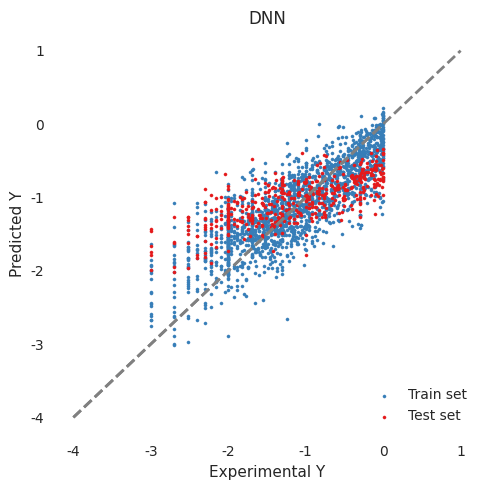

In [29]:
from qsprpred.models.models import QSPRsklearn
from sklearn.cross_decomposition import PLSRegression
 
import numbers
import os
import shutil
from os.path import exists


import numpy as np
import pandas as pd
import torch
from parameterized import parameterized

from qsprpred.models.hyperparam_optimization import GridSearchOptimization, OptunaOptimization
from qsprpred.models.models import QSPRModel, QSPRsklearn
from qsprpred.deep.models.models import QSPRDNN

from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from torch.utils.data import DataLoader, TensorDataset
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMRegressor
# model = QSPRsklearn(base_dir = '.', data=dataset, alg = GradientBoostingRegressor(), name='GBDTR')
model=QSPRDNN(
            base_dir='.',
            # alg=MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=500),
    # alg=STFullyConnected(),
            autoload=False,
            data=dataset,
            name="DNN",
            # parameters=parameters,
            gpus='1',
      # task= ModelTasks.REGRESSION,
            patience=3,
            tol=0.02
        )
 # model = alg(
 #            n_dim=no_features,
 #            neurons_h1=2000,
 #            neurons_hx=500,
 #            extra_layer=True,
 #            is_reg=is_reg
 #        )
# return ['explained_variance', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error',
#             'neg_root_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error',
#             'r2', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'neg_mean_absolute_percentage_error',
#             'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_scor']

# We will first optimize the hyperparameters (n_components and scale) through bayes optimization
# the best hyperparameter combination will be saved in PLS_REG_GABAAalpha_params.json
search_space_bs = {"lr": ["uniform", 1e-6, 1e-2],
        "neurons_h1" : ["int", 200, 4000],
        "neurons_hx" : ["int", 200, 2000],
        # "extra_layer": ["categorical", [true, false]],
        "dropout_frac": ["uniform", 0.2, 0.9]}
bayesoptimizer = OptunaOptimization(scoring = model.scoreFunc, param_grid=search_space_bs,
                                    n_trials=20, n_jobs=4)
best_params = bayesoptimizer.optimize(model)
#Then we will evaluate the performance of the best model using the independent test set
_ = model.evaluate()

# Finally, we need to fit the model on the complete dataset if we want to use it further
# model is saved under qsprmodels/PLS_REG_GABAAalpha.pkg
model.fit()
from qsprpred.plotting.regression import CorrelationPlot

plt = CorrelationPlot([model])
axes, summary = plt.make(save=False)
axes[0]
 
print(summary)
if(df_metric.shape[0]==0):
    df_metric=summary
else:
    df_metric=df_metric.append(summary)
model_names.append(summary.iloc[0,0])
print(model_names)
test_metric_results.append(summary.iloc[1,1:4].to_list())
valid_metric_results.append(summary.iloc[0,1:4].to_list())
print(test_metric_results)
print(valid_metric_results)
print(df_metric.head(10))
mlp_model=model

# MULTITASK

In [ ]:
model_names=[]
metric_results=[]
train_metric_results=[]
test_metric_results=[]
valid_metric_results=[]
df_metric=pd.DataFrame()
from qsprpred.models.models import QSPRsklearn
from sklearn.cross_decomposition import PLSRegression
 
import numbers
import os
import shutil
from os.path import exists


import numpy as np
import pandas as pd
import torch
from parameterized import parameterized

from qsprpred.models.interfaces import QSPRModel
from qsprpred.models.models import  QSPRsklearn
 
from qsprpred.models.tasks import ModelTasks
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
 
# fname = f'{os.getcwd()}/test_files/search_space.json'
# mname = themodel.name.split("_")[0]
# grid_params = themodel.__class__.loadParamsGrid(fname, "bayes", mname)
# search_space_bs = grid_params[grid_params[:, 0] == mname, 1][0]
model = QSPRsklearn(base_dir = '.', data=dataset, alg = SVR, name='SVM')
search_space_bs ={"kernel": ["rbf", "sigmoid","poly"], "C": [0.001,1000]}
bayesoptimizer = OptunaOptimization(scoring = model.scoreFunc, param_grid=search_space_bs,
                                    n_trials=20, n_jobs=4)
best_params = bayesoptimizer.optimize(model)
_ = model.evaluate()

# Finally, we need to fit the model on the complete dataset if we want to use it further
# model is saved under qsprmodels/PLS_REG_GABAAalpha.pkg
model.fit()

from qsprpred.plotting.regression import CorrelationPlot

plt = CorrelationPlot([model])
axes, summary = plt.make(save=False)
axes[0]
print(summary)
if(df_metric.shape[0]==0):
    df_metric=summary
else:
    df_metric=df_metric.append(summary)
model_names.append(summary.iloc[0,0])
print(model_names)
test_metric_results.append(summary.iloc[1,1:4].to_list())
valid_metric_results.append(summary.iloc[0,1:4].to_list())
print(test_metric_results)
print(valid_metric_results)
print(df_metric.head(10))
svr_model=model


In [ ]:
#   ModelName        R2      RMSE  Set
# 0     GBDTR  0.188234  0.324839   cv
# 1     GBDTR  0.249387  0.335247  ind

# 模型对比

In [ ]:
 # plot_comparison(names, results, c)

In [18]:
print(model_names)
print(test_metric_results)

['SVM', 'RF', 'XGB', 'GBM', 'XGB', 'GBM', 'SVM', 'SVM']
[[0.3465518502918641, 0.5216694697105319, 0.37865938511419134], [0.28705053170656125, 0.5449030379289875, 0.4064715189666736], [0.28141114983148663, 0.5470538660921787, 0.40196449202054174], [0.3245941353885161, 0.5303618393448749, 0.38818822511245166], [0.2843856779513694, 0.545920454031532, 0.4070782806541184], [0.3176356826697887, 0.5330868978433725, 0.38648475137298705], [0.3465518502918641, 0.5216694697105319, 0.37865938511419134], [0.3465518502918641, 0.5216694697105319, 0.37865938511419134]]


  ModelName        R2      RMSE       MAE  Set
0       SVM  0.366797  0.513029  0.373875   cv
1       SVM  0.250380  0.541881  0.405226  ind
2        RF  0.620559  0.434248  0.338293   cv
3        RF  0.651869  0.438628  0.342981  ind
4       XGB  0.611245  0.439545  0.332650   cv
5       XGB  0.650031  0.439784  0.333744  ind
6       GBM  0.608557  0.441062  0.344478   cv
7       GBM  0.618808  0.458983  0.365178  ind
['RF', 'XGB', 'GBM', 'DNN', 'SVM']


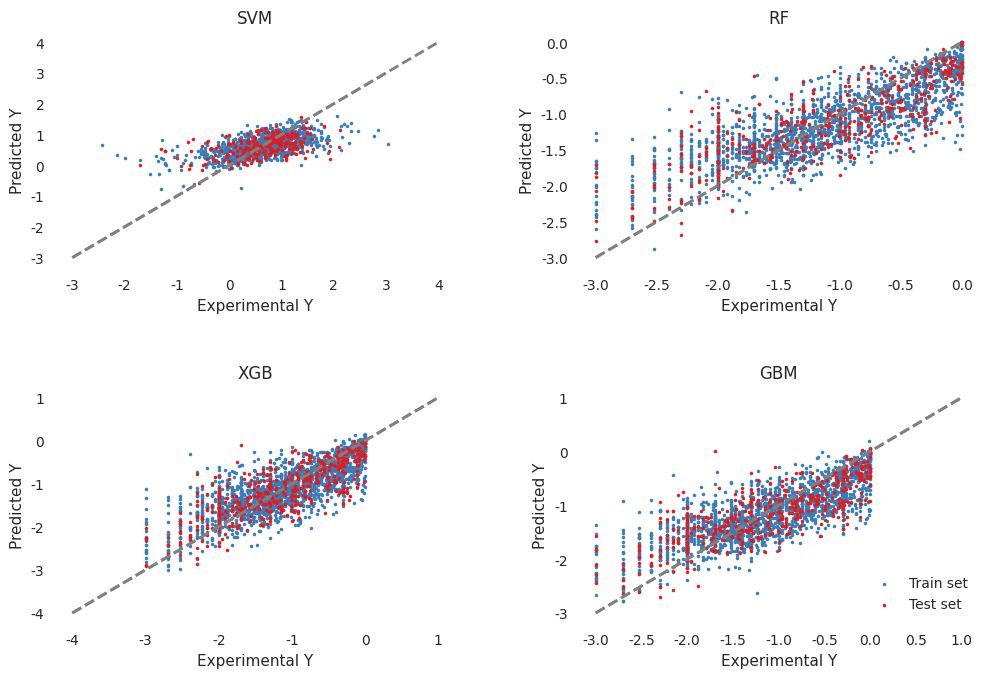

In [30]:
from qsprpred.plotting.regression import CorrelationPlot
plt = CorrelationPlot([svr_model,rfr_model,xgbr_model,gbr_model])
axes, summary = plt.make(save=True)
axes[0]
print(summary)
if(df_metric.shape[0]==0):
    df_metric=summary
else:
    df_metric=df_metric.append(summary)
model_names.append(summary.iloc[0,0])
print(model_names)
test_metric_results.append(summary.iloc[1,1:4].to_list())
valid_metric_results.append(summary.iloc[0,1:4].to_list())
# print(test_metric_results)
# print(valid_metric_results)
# print(df_metric.head(10))

2023-07-14 13:13:42 | 173877655.py | MainProcess | MainThread | 173877655.<cell line: 1>:1 - INFO -valid model compair


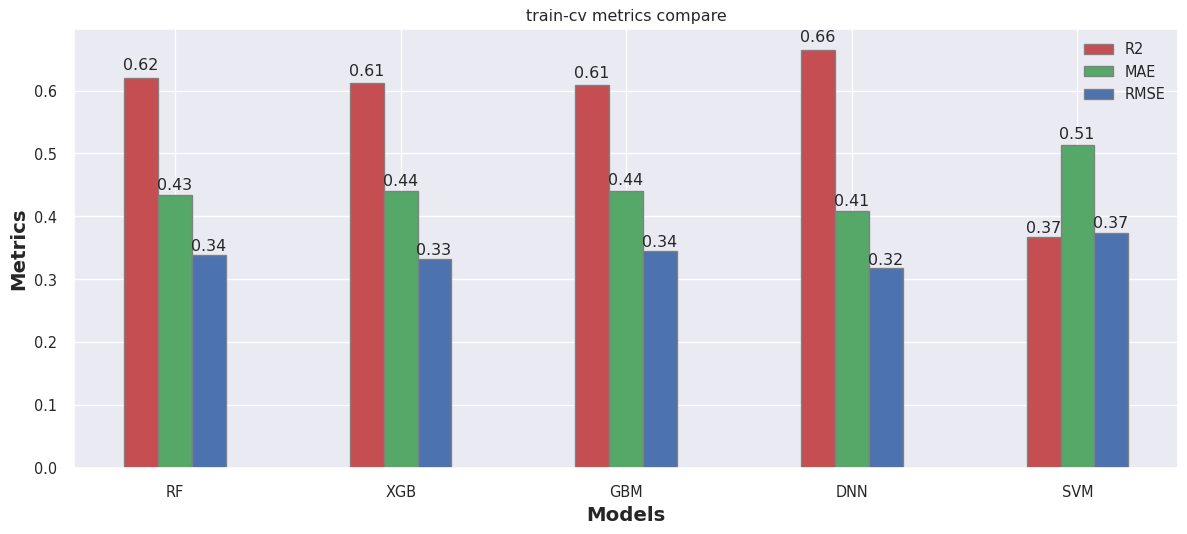

2023-07-14 13:13:42 | 173877655.py | MainProcess | MainThread | 173877655.<cell line: 3>:3 - INFO -test model compair


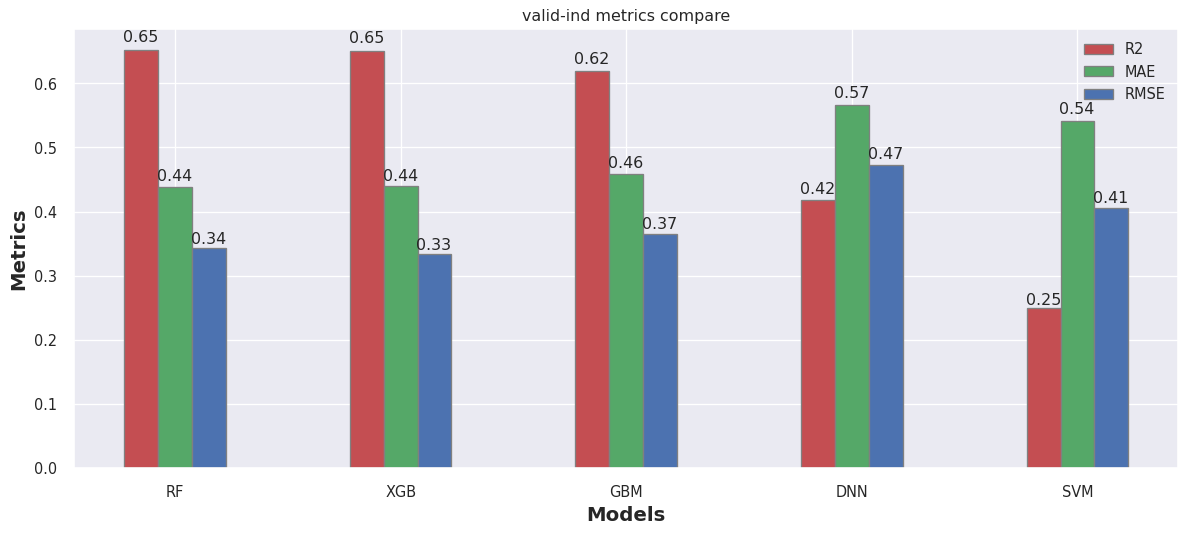

  ModelName        R2      RMSE       MAE  Set
0        RF  0.620559  0.434248  0.338293   cv
1        RF  0.651869  0.438628  0.342981  ind
0       XGB  0.611245  0.439545  0.332650   cv
1       XGB  0.650031  0.439784  0.333744  ind
0       GBM  0.608557  0.441062  0.344478   cv
1       GBM  0.618808  0.458983  0.365178  ind
0       DNN  0.664316  0.408442  0.317201   cv
1       DNN  0.418818  0.566736  0.473241  ind
0       SVM  0.366797  0.513029  0.373875   cv
1       SVM  0.250380  0.541881  0.405226  ind


In [31]:

logger.info("valid model compair")
plot_comparison(model_names, valid_metric_results, c=False,title="train-cv metrics compare")
logger.info("test model compair")
plot_comparison(model_names, test_metric_results, c=False,title="valid-ind metrics compare")
print(df_metric.head(10))
now_time = datetime.datetime.now()
data_str = now_time.strftime('%Y_%m_%d_%H')
valid_metric_results_df=pd.DataFrame(valid_metric_results)
valid_metric_results_df.to_csv("valid_metric_results_"+data_str+".csv")
test_metric_results_df=pd.DataFrame(test_metric_results)
test_metric_results_df.to_csv("test_metric_results_"+data_str+".csv")

# 特征统计

In [15]:
now_time = datetime.datetime.now()
data_str = now_time.strftime('%Y_%m_%d_%H')
feature_list=dataset.X.columns
# feature_list=["Descriptor_PaDEL_WTPT","Descriptor_PaDEL_WPATH"	,"Descriptor_RDkit_MaxAbsEStateIndex","Descriptor_Mordred_Mor01v"]
df_feature=pd.DataFrame(feature_list,columns=["feature_name"])
print(df_feature)
def split_descriptor(x,index=0):
    if "Descriptor" in x:
        if index<=1:
            return x.split("_")[index]
        elif index==2:
            return "_".join(x.split("_")[2:])
    else:
        return None
df_feature["feature_source"]=df_feature['feature_name'].apply(lambda x: split_descriptor(x,1))

df_feature["feature_short_name"]=df_feature['feature_name'].apply(lambda x: split_descriptor(x,2))
df_feature["feature_full_name"]=df_feature['feature_name'].apply(lambda x: x.replace('Descriptor_', ''))

df_feature.to_csv("result/feature_list_%s.csv"%data_str)
print(df_feature.head(10))
df_ft_count=df_feature["feature_source"].value_counts().reset_index().sort_values(by='feature_source', ascending=False)
print(df_ft_count.columns)
df_ft_count=df_ft_count.rename(columns={'index':"feature_source", 'feature_source':"feature_cnt"})
print(df_ft_count.head(10))
df_ft_count.to_csv("result/feature_source_count_%s.csv"%data_str)

                    feature_name
0           Descriptor_RDkit_qed
1  Descriptor_RDkit_FractionCSP3
2     Descriptor_Mordred_MAXsCH3
3     Descriptor_Mordred_MAXaaCH
4     Descriptor_Mordred_MAXssNH
5      Descriptor_Mordred_MAXsOH
6       Descriptor_Mordred_MAXdO
7      Descriptor_Mordred_MAXssO
                    feature_name feature_source feature_short_name   feature_full_name
0           Descriptor_RDkit_qed          RDkit                qed           RDkit_qed
1  Descriptor_RDkit_FractionCSP3          RDkit       FractionCSP3  RDkit_FractionCSP3
2     Descriptor_Mordred_MAXsCH3        Mordred            MAXsCH3     Mordred_MAXsCH3
3     Descriptor_Mordred_MAXaaCH        Mordred            MAXaaCH     Mordred_MAXaaCH
4     Descriptor_Mordred_MAXssNH        Mordred            MAXssNH     Mordred_MAXssNH
5      Descriptor_Mordred_MAXsOH        Mordred             MAXsOH      Mordred_MAXsOH
6       Descriptor_Mordred_MAXdO        Mordred              MAXdO       Mordred_MAXdO
7      

# 所有特征统计

In [48]:
print(dataset.df.columns)
print(dataset.df.shape)
print(dataset.X.columns)
print(dataset.X.shape)
now_time = datetime.datetime.now()
data_str = now_time.strftime('%Y_%m_%d_%H')
feature_list=dataset.df.columns
# feature_list=["Descriptor_PaDEL_WTPT","Descriptor_PaDEL_WPATH"	,"Descriptor_RDkit_MaxAbsEStateIndex","Descriptor_Mordred_Mor01v"]
df_feature=pd.DataFrame(feature_list,columns=["feature_name"])
print(df_feature)
def split_descriptor(x,index=0):
    if "Descriptor" in x:
        if index<=1:
            return x.split("_")[index]
        elif index==2:
            return "_".join(x.split("_")[2:])
    else:
        return None
df_feature["feature_source"]=df_feature['feature_name'].apply(lambda x: split_descriptor(x,1))

df_feature["feature_short_name"]=df_feature['feature_name'].apply(lambda x: split_descriptor(x,2))
df_feature["feature_full_name"]=df_feature['feature_name'].apply(lambda x: x.replace('Descriptor_', ''))

df_feature.to_csv("data/feature_list_all%s.csv"%data_str)
print(df_feature.head(10))
df_ft_count=df_feature["feature_source"].value_counts().reset_index().sort_values(by='feature_source', ascending=False)
print(df_ft_count.columns)
df_ft_count=df_ft_count.rename(columns={'index':"feature_source", 'feature_source':"feature_cnt"})
print(df_ft_count.head(10))
df_ft_count.to_csv("data/feature_source_count_all%s.csv"%data_str)

Index(['SMILES_STANDARD', 'human CL (mL/min/kg)_log10', 'Y',
       'Descriptor_RDkit_MaxEStateIndex', 'Descriptor_RDkit_MinEStateIndex',
       'Descriptor_RDkit_MaxAbsEStateIndex',
       'Descriptor_RDkit_MinAbsEStateIndex', 'Descriptor_RDkit_qed',
       'Descriptor_RDkit_MolWt', 'Descriptor_RDkit_HeavyAtomMolWt',
       ...
       'Descriptor_PaDEL_WTPT-1', 'Descriptor_PaDEL_WTPT-2',
       'Descriptor_PaDEL_WTPT-3', 'Descriptor_PaDEL_WTPT-4',
       'Descriptor_PaDEL_WTPT-5', 'Descriptor_PaDEL_WPATH',
       'Descriptor_PaDEL_WPOL', 'Descriptor_PaDEL_XLogP',
       'Descriptor_PaDEL_Zagreb', 'Split_IsTrain'],
      dtype='object', length=18519)
(1215, 18519)
Index(['Descriptor_RDkit_qed', 'Descriptor_RDkit_BCUT2D_MWLOW',
       'Descriptor_RDkit_BCUT2D_CHGHI', 'Descriptor_RDkit_BCUT2D_CHGLO',
       'Descriptor_RDkit_BCUT2D_LOGPLOW', 'Descriptor_RDkit_BCUT2D_MRLOW',
       'Descriptor_RDkit_FractionCSP3',
       'Descriptor_FingerprintSet_MorganFP_477',
       'Descriptor_Fingerp

# 模型预测

In [ ]:
smils_list[0:10]

In [47]:
import datetime
now_time = datetime.datetime.now()
data_str = now_time.strftime('%Y_%m_%d_%H_%M_%S')
dataset_diar= '/data/project/pbpk/data/'
test_file=dataset_dir+"Molnames_cl_test_82.csv"

test_file=dataset_dir+'caco2_test_set_252.csv'
df_test=pd.read_csv(test_file)
print(df_test.columns)
print(df_test.shape)
smils_list=df_test["SMILES"].tolist()
modle_list=['GBDTR','XGBR','PLS_REG','SVR','RFR']
predictor = QSPRsklearn(name=modle_list[3], base_dir='.')
predict_result=predictor.predictMols(smils_list,n_jobs=20,smiles_standardizer='chembl',fill_value=0)
print(predict_result)
df_test = df_test.assign(pred=predict_result)
print(df_test.head(5))
result_save_file=test_file.replace(".csv","_result_%s.csv"%data_str)
df_test.to_csv(result_save_file)
logger.info("predict on:%s finished,record_num:%s"%(test_file,df_test.shape[0]))

[2023-06-09 15:53:35,424] INFO [interfaces.py pkmodel readParams (193)]: loading model parameters from file: ./qspr/models/SVR/SVR_params.json
[2023-06-09 15:53:35,426] INFO [descriptorsets.py pkmodel __init__ (104)]: get feature of FingerprintSet


Index(['SMILES', 'DOI', 'LABEL', 'caco2_log10'], dtype='object')
(252, 4)


[2023-06-09 15:53:35,709] INFO [descriptorsets.py pkmodel __init__ (104)]: get feature of FingerprintSet
[2023-06-09 15:53:35,714] INFO [descriptorsets.py pkmodel __init__ (104)]: get feature of FingerprintSet
[2023-06-09 15:53:35,715] INFO [descriptorsets.py pkmodel __init__ (104)]: get feature of FingerprintSet
[2023-06-09 15:53:35,719] INFO [descriptorsets.py pkmodel __init__ (104)]: get feature of FingerprintSet
[2023-06-09 15:53:35,720] INFO [descriptorsets.py pkmodel __init__ (104)]: get feature of FingerprintSet
[2023-06-09 15:53:35,721] INFO [descriptorsets.py pkmodel __init__ (104)]: get feature of FingerprintSet
[2023-06-09 15:53:35,722] INFO [descriptorsets.py pkmodel __init__ (104)]: get feature of FingerprintSet
[2023-06-09 15:53:36,534] INFO [models.py pkmodel __init__ (48)]: parameters: {}
[2023-06-09 15:53:36,536] INFO [data.py pkmodel __init__ (126)]: descriptorCalculatorPath:./QSPRsklearn_8776453481181_feature_calculators.json
[2023-06-09 15:53:36,537] INFO [data.py p

Parallel apply in progress for QSPRsklearn_8776453481181.:   0%|          | 0/1 [00:00<?, ?it/s]

[2023-06-09 15:56:57,177] INFO [data.py pkmodel getDescriptorNames (431)]: 1212
[2023-06-09 15:56:57,179] INFO [data.py pkmodel getDescriptorNames (431)]: 1212
[2023-06-09 15:56:57,181] INFO [data.py pkmodel getDescriptorNames (431)]: 1212
[2023-06-09 15:56:57,182] INFO [data.py pkmodel fillMissing (1112)]: 1210
[2023-06-09 15:56:57,182] INFO [data.py pkmodel fillMissing (1113)]: (252, 1212)
[2023-06-09 15:56:57,183] INFO [data.py pkmodel checkNan (1076)]: ---检测df中空值情况---
[2023-06-09 15:56:57,183] INFO [data.py pkmodel checkNan (1077)]: 数据记录数:252
[2023-06-09 15:56:57,184] INFO [data.py pkmodel checkNan (1078)]: 数据记录列数:1212
[2023-06-09 15:56:57,188] INFO [data.py pkmodel checkNan (1081)]: Y                             252
Descriptor_Mordred_AATS8dv      7
Descriptor_Mordred_AATS8d       7
Descriptor_Mordred_AATS8s       7
Descriptor_Mordred_AATS8Z       7
                             ... 
Descriptor_Mordred_MDEN-12    222
Descriptor_Mordred_MDEN-13    223
Descriptor_Mordred_MDEN-22     

TypeError: float() argument must be a string or a real number, not 'QSPRDataset'

In [ ]:
df_test.columns

In [ ]:
def evaluate_result(df_result,target_cols):
    import matplotlib.pyplot as plt
    print(df_result.columns)
    sns.pairplot(df_result[target_cols])
    df_result = df_result.rename(columns={target_cols[0]: 'label',target_cols[1]: 'pred'})
    # print(df_result.columns)
    plt.show()
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    
    # 计算R2值
    r2 = r2_score(df_result['label'], df_result['pred'])
    # 计算MSE值
    mse = mean_squared_error(df_result['label'], df_result['pred'])
    # 计算RMSE值
    rmse = np.sqrt(mse)
    # 计算MAE值
    mae = mean_absolute_error(df_result['label'], df_result['pred'])
    logger.info("预测结果文件:%s---指标: r2:%s  mse:%s rmse:%s mae:%s"%(result_save_file,r2,mse,rmse,mae))
df_result=df_test
target_cols=['Cl(mL/min/kg)_log10', 'pred']
df_result=evaluate_result(df_result,target_cols)



In [ ]:
from qsprpred.models.models import QSPRsklearn

# give path to saved metadata of the model and load it
metadata_path = './qspr/models/PLS_REG/PLS_REG_meta.json'
predictor = QSPRsklearn.fromFile(metadata_path)
 
# predict the mulecules
predictor.predictMols([
    'CC(=C)C1CC2=C(O1)C=CC3=C2OC4COC5=CC(=C(C=C5C4C3=O)OC)OC', # rotenone
    'CCOC(=O)C1=C2CN(C(=O)C3=C(N2C=N1)C=CC(=C3)F)C' # flumazenil
])

In [ ]:
predictor = QSPRsklearn(name='XGBR', base_dir='.')
predictor.predictMols([
    'CC(=C)C1CC2=C(O1)C=CC3=C2OC4COC5=CC(=C(C=C5C4C3=O)OC)OC', # rotenone
    'CCOC(=O)C1=C2CN(C(=O)C3=C(N2C=N1)C=CC(=C3)F)C' # flumazenil
])

# 可解释性分析

In [ ]:
# n_neighbors = 10
# models_relieff, results_relief, num_sel_feat_relief, features_relief = fs_relieff(X_train, y_train, X_val, y_val, X_train_norm, X_val_norm, False, n_neighbors)

In [ ]:
df_data=dataset.df
X_train=dataset.X
y_train=dataset.y
X_val=dataset.X_ind
y_val=dataset.y_ind
X_test=dataset.df
X_train_norm, X_val_norm, X_test_norm = normalize_data(X_train, X_val, X_test)
models, results = models_comparison(X_train, y_train, X_val, y_val, False, True, False, X_train_norm, X_val_norm)

In [ ]:
data_cols=X_train.columns
print(data_cols)
ori_cols=['MW', 'HBA', 'HBD', 'TPSA_NO', 'RotBondCount', 'moka_ionState7.4', 'MoKa.LogP', 'MoKa.LogD7.4']
for fd in data_cols:
    if fd in ori_cols:
        print(fd)

In [ ]:
from qsprpred.models.models import QSPRsklearn

# give path to saved metadata of the model and load it
metadata_path = './qspr/models/PLS_REG/PLS_REG_meta.json'
predictor = QSPRsklearn.fromFile(metadata_path)
predictor
predictor.predictMols([
    'CC(=C)C1CC2=C(O1)C=CC3=C2OC4COC5=CC(=C(C=C5C4C3=O)OC)OC', # rotenone
    'CCOC(=O)C1=C2CN(C(=O)C3=C(N2C=N1)C=CC(=C3)F)C' # flumazenil
])
predictor = QSPRsklearn(name='PLS_REG', base_dir='.')
predictor.predictMols([
    'CC(=C)C1CC2=C(O1)C=CC3=C2OC4COC5=CC(=C(C=C5C4C3=O)OC)OC', # rotenone
    'CCOC(=O)C1=C2CN(C(=O)C3=C(N2C=N1)C=CC(=C3)F)C' # flumazenil
])
